In [ ]:
# chat: https://chat.deepseek.com/a/chat/s/d3558245-2f0b-488f-a2fb-f874378a748e

In [1]:
# Import libraries
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv("cleaned_students_data5.csv")

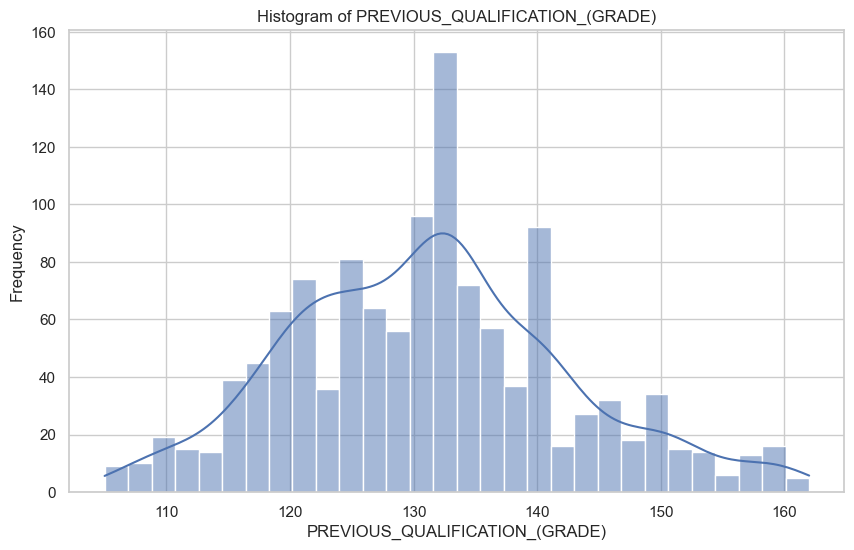

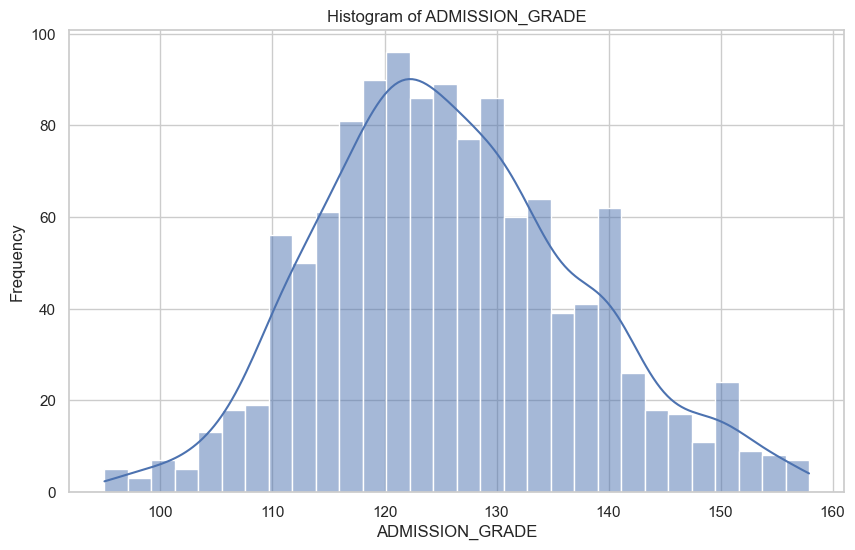

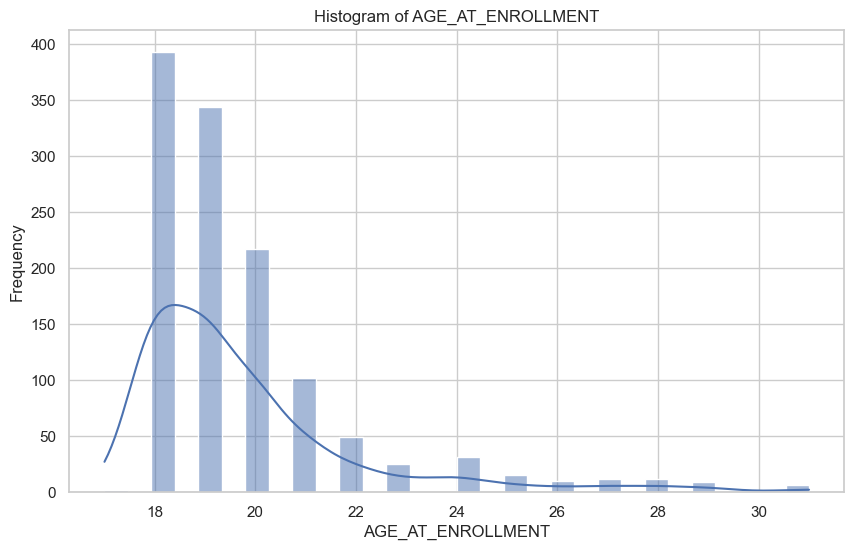

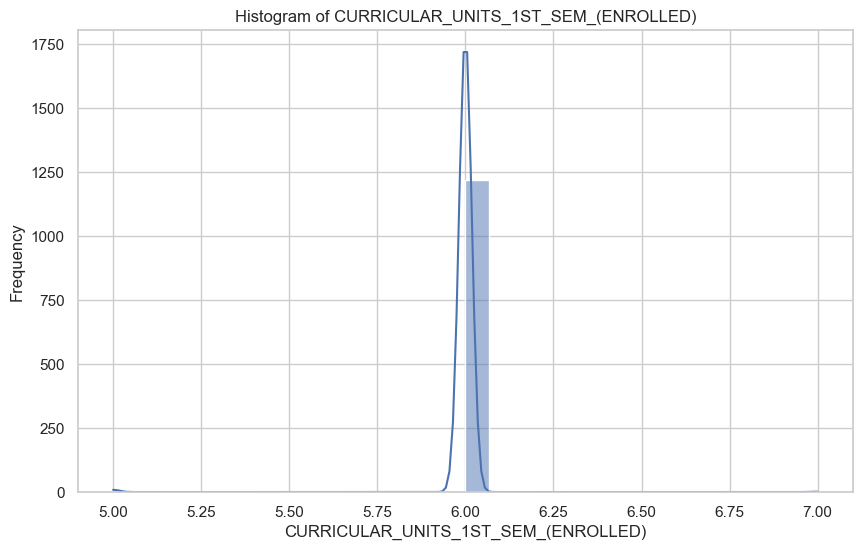

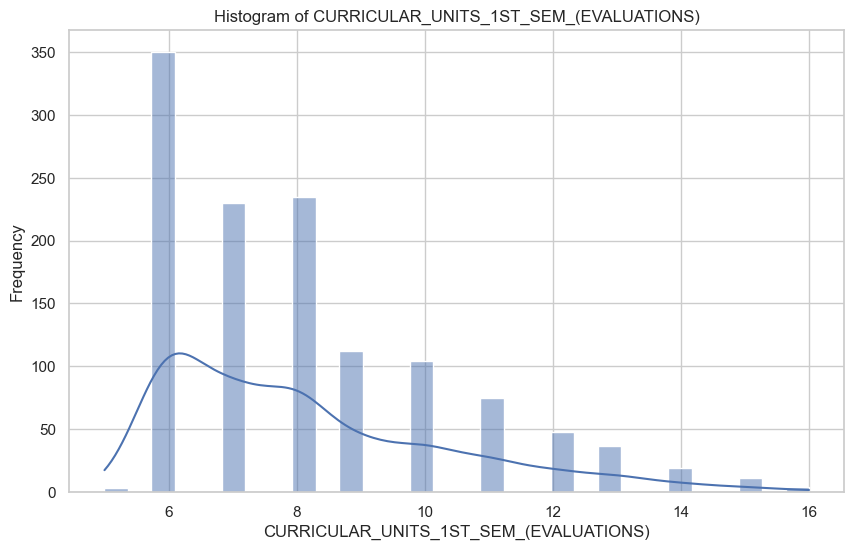

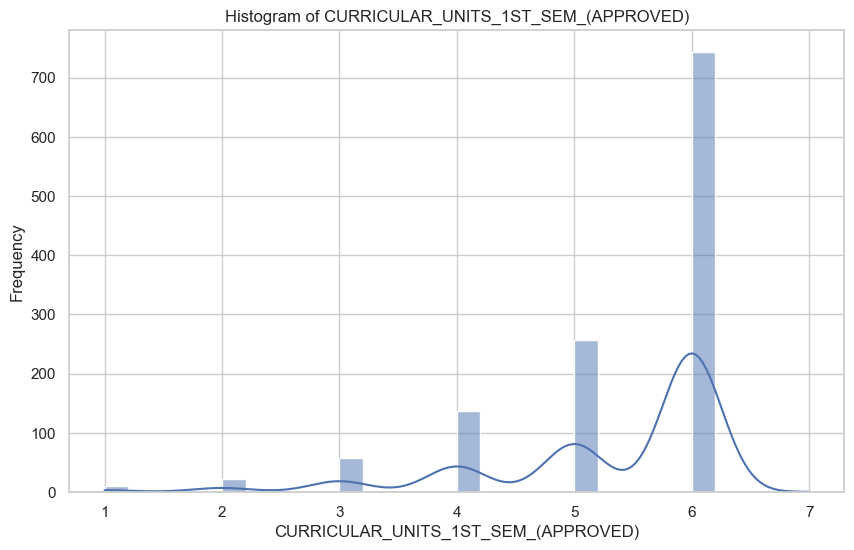

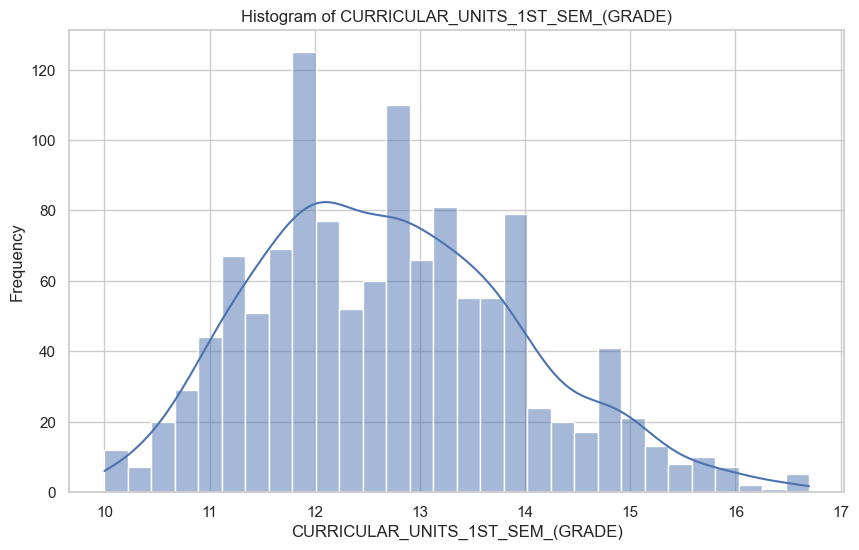

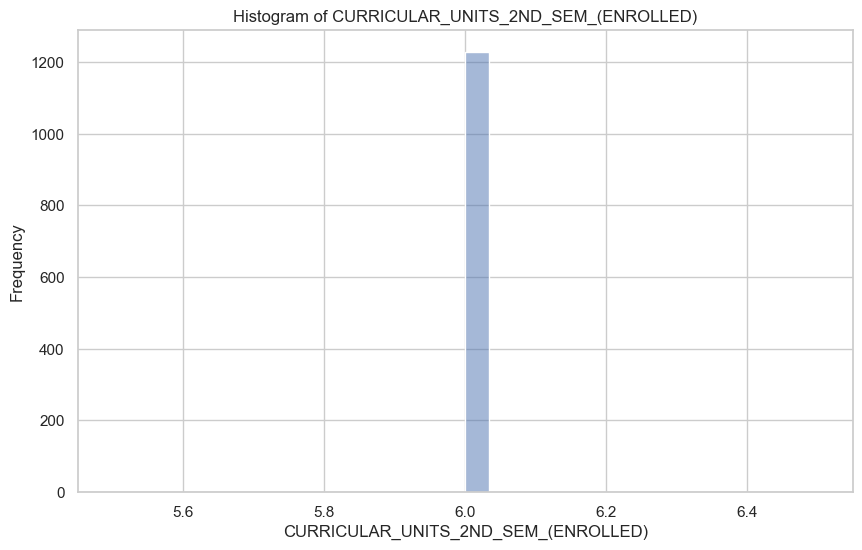

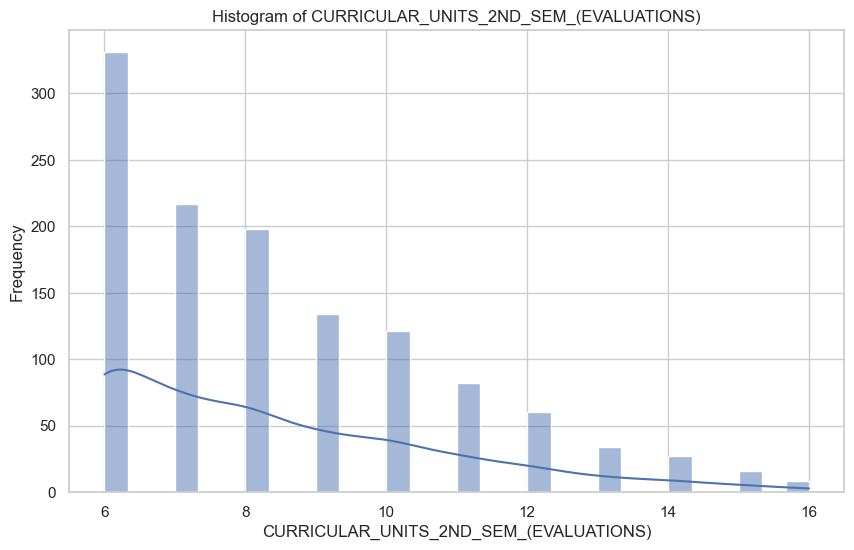

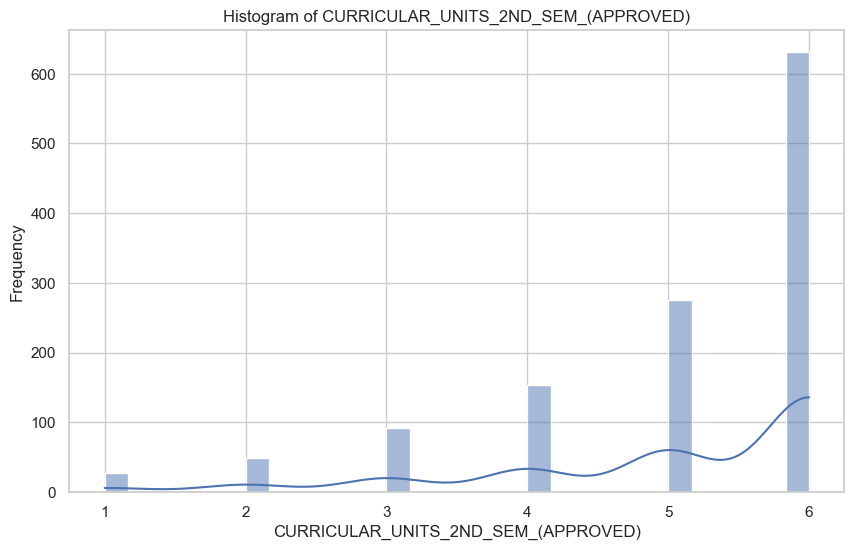

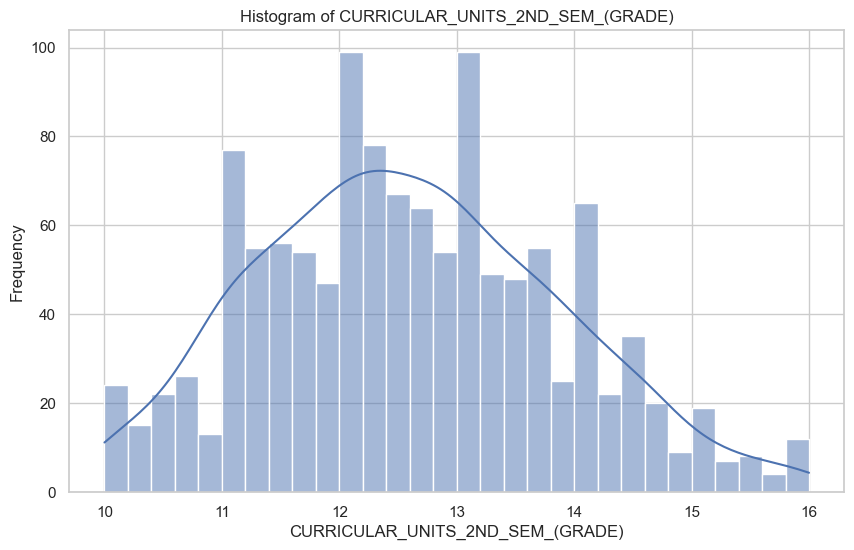

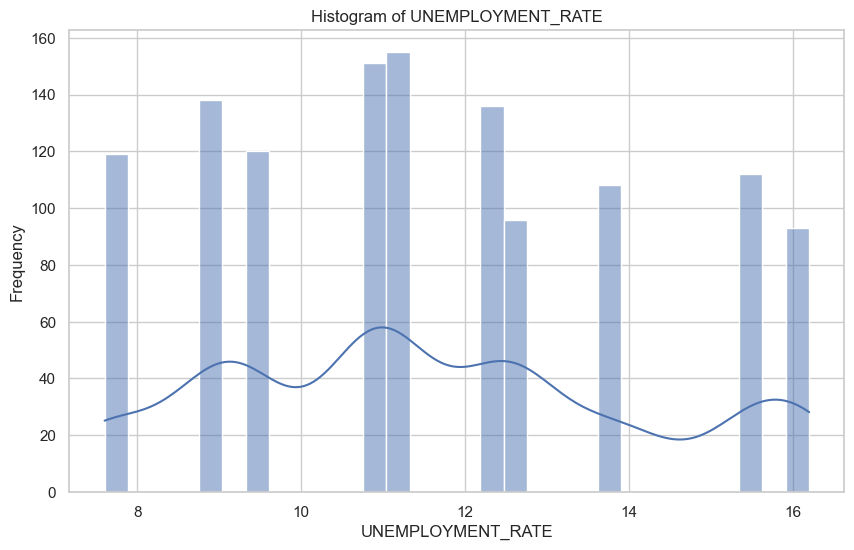

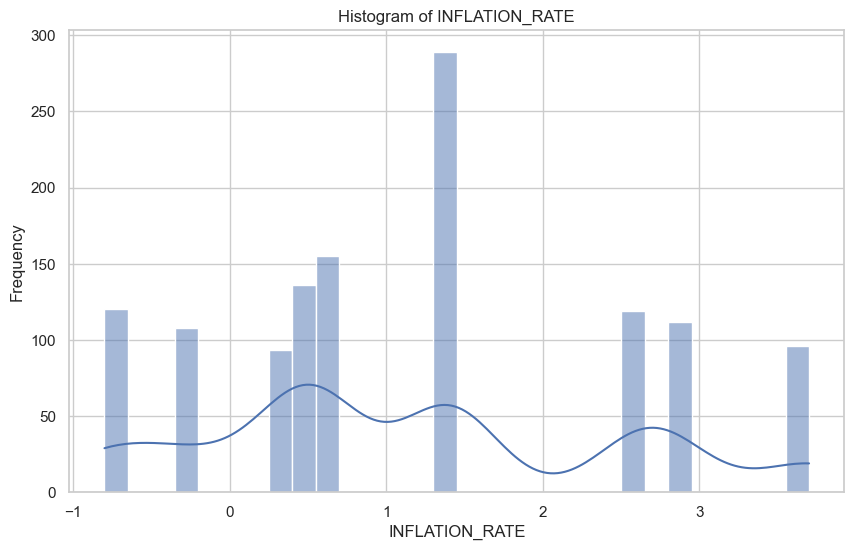

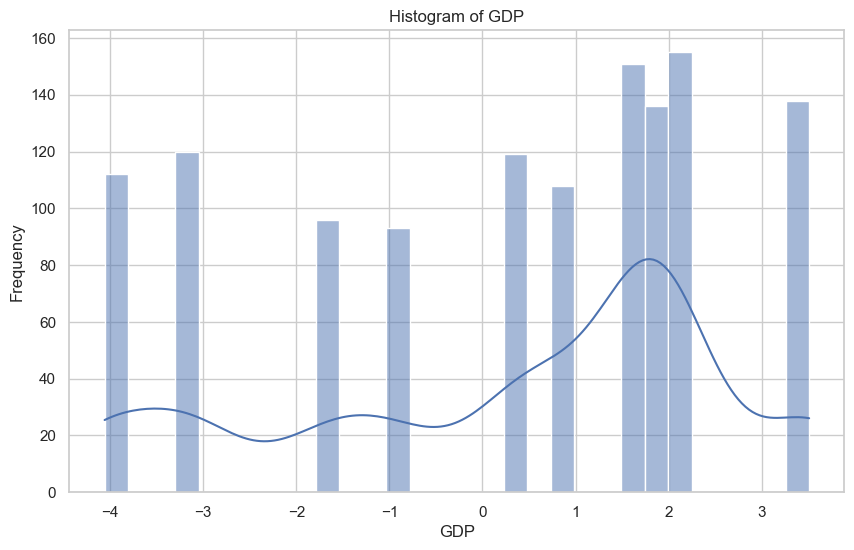

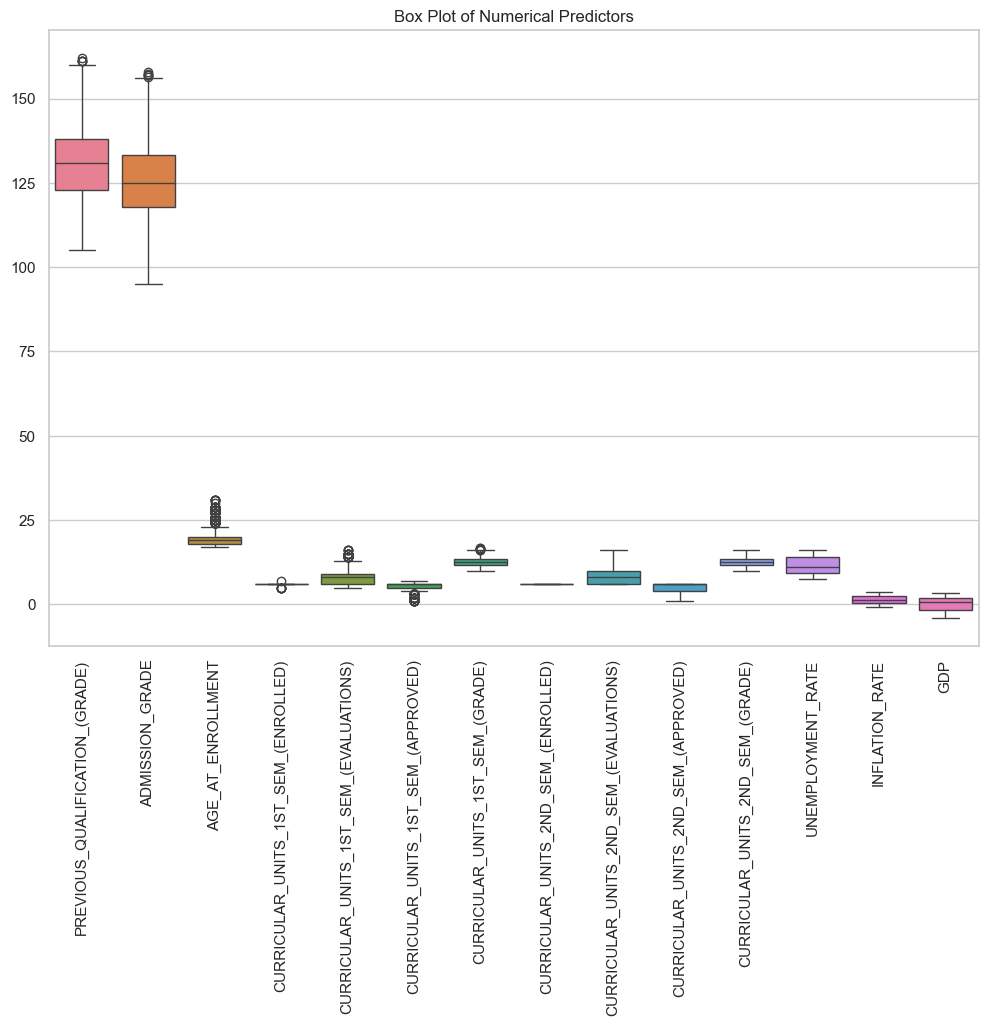

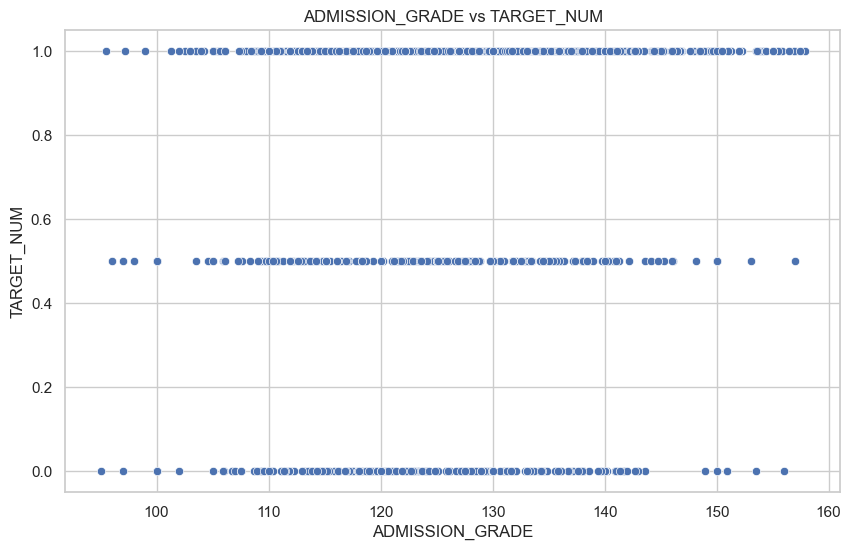

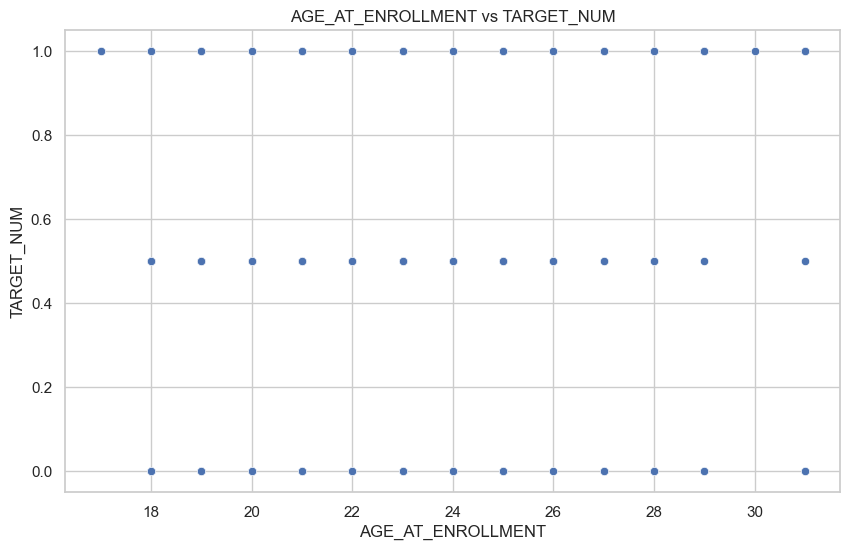

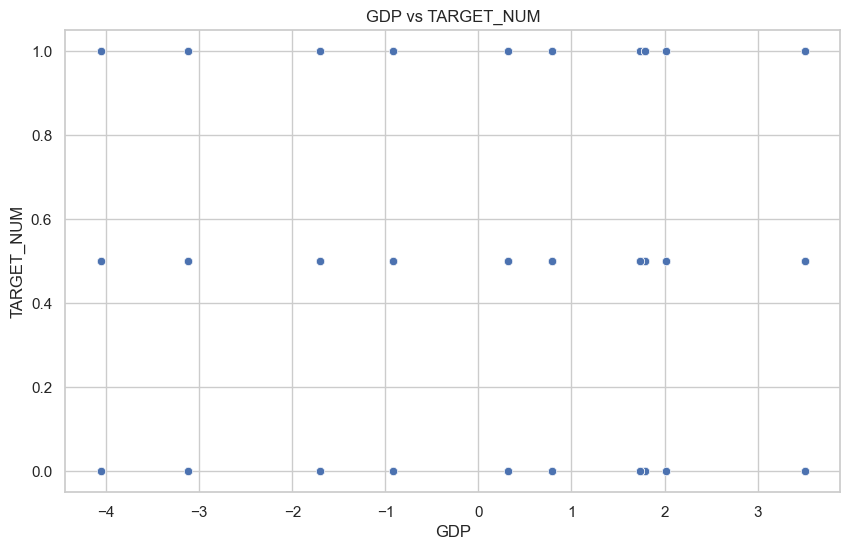

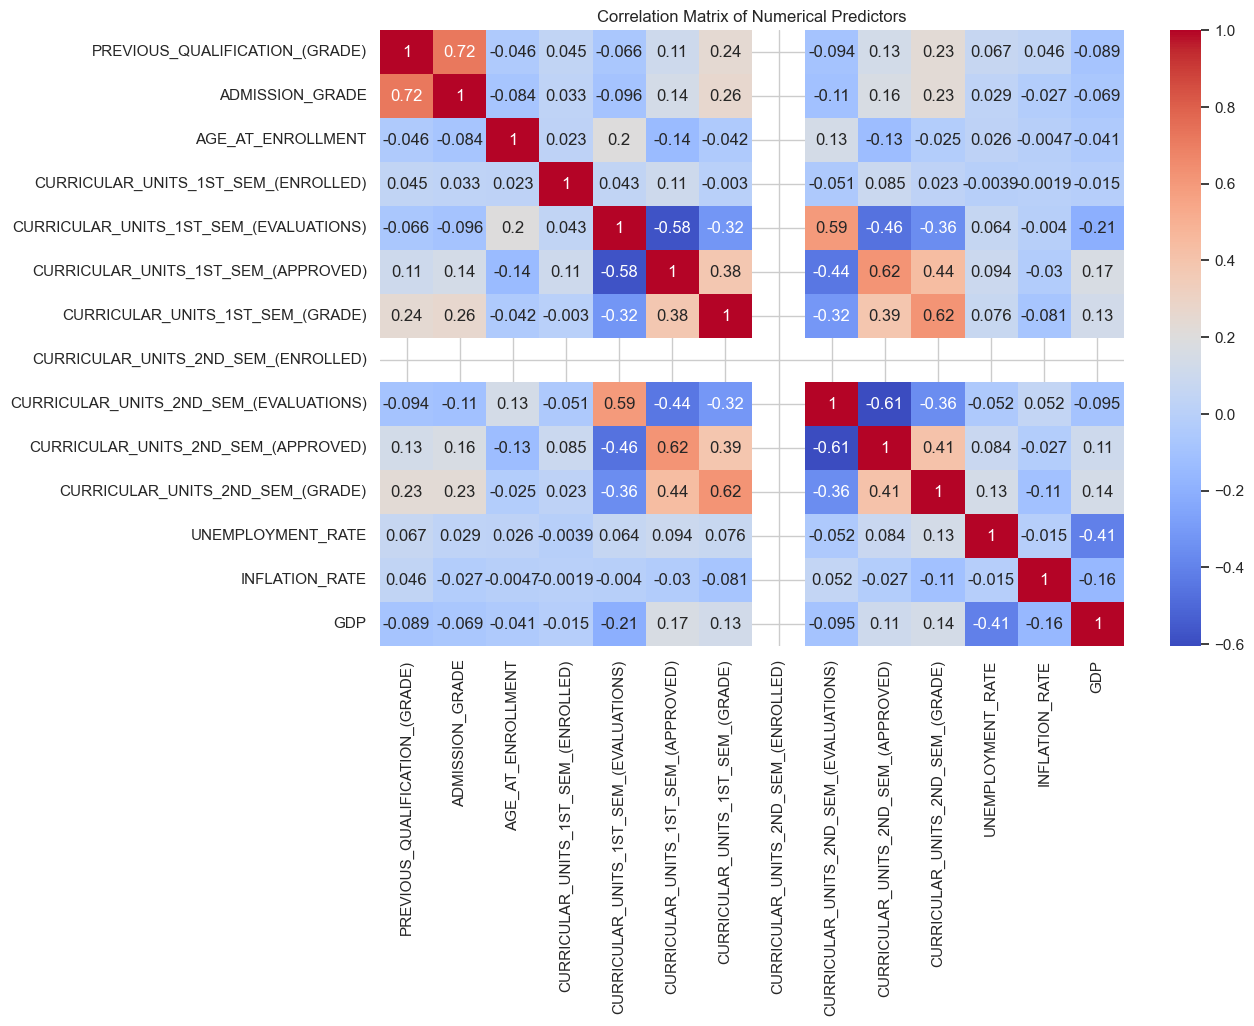

In [30]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Histogram for numerical predictors
for predictor in numerical_predictors:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[predictor], kde=True, bins=30)
    plt.title(f'Histogram of {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('Frequency')
    plt.show()

# Box plot for numerical predictors
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numerical_predictors])
plt.title('Box Plot of Numerical Predictors')
plt.xticks(rotation=90)
plt.show()

# Scatter plot for selected numerical predictors against the target
selected_columns = ['ADMISSION_GRADE', 'AGE_AT_ENROLLMENT', 'GDP']
for column in selected_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=column, y='TARGET_NUM')
    plt.title(f'{column} vs TARGET_NUM')
    plt.xlabel(column)
    plt.ylabel('TARGET_NUM')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data[numerical_predictors].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Predictors')
plt.show()

In [ ]:
# Data Munging

# Data cleaning: Fixes or removes incorrect, incomplete, or duplicate data
# Data transformation: Converts data to fit analytical requirements
# Data structuring: Organizes data into a consistent format
# Data integration: Combines data from multiple sources
# Data validation: Checks data integrity to ensure it meets standards
# Feature engineering: Creates new features from existing data

In [ ]:
# Data Cleaning

# Handle missing values
# Fill missing values with the mean for numerical columns
data[numerical_predictors] = data[numerical_predictors].fillna(data[numerical_predictors].mean())

# Fill missing values with the mode for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column] = data[column].fillna(data[column].mode()[0])

# Remove duplicates
data = data.drop_duplicates()

# Display the first few rows to verify the cleaning
print(data.head())

In [4]:
# Data Transformation

# Log transformation for skewed numerical predictors
log_transformed_data = data.copy()
for predictor in numerical_predictors:
    log_transformed_data[predictor] = np.log1p(data[predictor])

# Display the first few rows to verify the transformation
print(log_transformed_data[numerical_predictors].head())

   PREVIOUS_QUALIFICATION_(GRADE)  ADMISSION_GRADE  AGE_AT_ENROLLMENT  \
0                        5.081404         4.966335           2.995732   
1                        4.812184         4.792479           3.044522   
2                        4.927254         4.869839           3.091042   
3                        4.934474         4.820282           2.944439   
4                        4.941642         4.879767           2.944439   

   CURRICULAR_UNITS_1ST_SEM_(ENROLLED)  \
0                              1.94591   
1                              1.94591   
2                              1.94591   
3                              1.94591   
4                              1.94591   

   CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS)  \
0                                1.945910   
1                                2.197225   
2                                2.197225   
3                                2.302585   
4                                1.945910   

   CURRICULAR_UNITS_1ST_SEM_(APPROVED

c:\Users\aidan_1k98io6\myenv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
# Data Structuring

# Organize data into a consistent format
# Ensure all columns have appropriate data types and handle any inconsistencies

# Convert categorical columns to category type
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].astype('category')

# Ensure numerical columns are of numeric type
data[numerical_predictors] = data[numerical_predictors].apply(pd.to_numeric, errors='coerce')

# Display the data types to verify the structuring
print(data.dtypes)

MARITAL_STATUS                            category
APPLICATION_MODE                          category
APPLICATION_ORDER                         category
COURSE                                    category
DAYTIME/EVENING_ATTENDANCE                category
PREVIOUS_QUALIFICATION                    category
PREVIOUS_QUALIFICATION_(GRADE)             float64
NATIONALITY                               category
MOTHER_QUALIFICATION                      category
FATHER_QUALIFICATION                      category
MOTHER_OCCUPATION                         category
FATHER_OCCUPATION                         category
ADMISSION_GRADE                            float64
DISPLACED                                 category
EDUCATIONAL_SPECIAL_NEEDS                 category
DEBTOR                                    category
TUITION_FEES_UP_TO_DATE                   category
GENDER                                    category
SCHOLARSHIP_HOLDER                        category
AGE_AT_ENROLLMENT              

In [6]:
# Data Validation

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

# Check for data types
data_types = data.dtypes
print("\nData types of each column:")
print(data_types)

# Validate ranges for numerical predictors
for predictor in numerical_predictors:
    min_value = data[predictor].min()
    max_value = data[predictor].max()
    print(f"\nRange of {predictor}: Min = {min_value}, Max = {max_value}")

# Validate categorical columns
for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"\nUnique values in {column}: {unique_values}")

Missing values in each column:
MARITAL_STATUS                            0
APPLICATION_MODE                          0
APPLICATION_ORDER                         0
COURSE                                    0
DAYTIME/EVENING_ATTENDANCE                0
PREVIOUS_QUALIFICATION                    0
PREVIOUS_QUALIFICATION_(GRADE)            0
NATIONALITY                               0
MOTHER_QUALIFICATION                      0
FATHER_QUALIFICATION                      0
MOTHER_OCCUPATION                         1
FATHER_OCCUPATION                         3
ADMISSION_GRADE                           0
DISPLACED                                 0
EDUCATIONAL_SPECIAL_NEEDS                 0
DEBTOR                                    0
TUITION_FEES_UP_TO_DATE                   0
GENDER                                    0
SCHOLARSHIP_HOLDER                        0
AGE_AT_ENROLLMENT                         0
INTERNATIONAL                             0
CURRICULAR_UNITS_1ST_SEM_(ENROLLED)       0
C

In [13]:
# Create a dichotomous variable for AGE_AT_ENROLLMENT
data['AGE_AT_ENROLLMENT_BINARY'] = pd.cut(data['AGE_AT_ENROLLMENT'], bins=[0, 20, np.inf], labels=[0, 1])

# Display the first few rows to verify the new column
print(data[['AGE_AT_ENROLLMENT', 'AGE_AT_ENROLLMENT_BINARY']].head())

   AGE_AT_ENROLLMENT AGE_AT_ENROLLMENT_BINARY
0                 19                        0
1                 20                        0
2                 21                        1
3                 18                        0
4                 18                        0


In [14]:
# Convert categorical variables into dummy/indicator variables
categorical_data = pd.get_dummies(data[categorical_predictors])

# Display the first few rows to verify the new columns
print(categorical_data.head())

   MARITAL_STATUS_divorced  MARITAL_STATUS_married  MARITAL_STATUS_single  \
0                    False                   False                   True   
1                    False                   False                   True   
2                    False                   False                   True   
3                    False                   False                   True   
4                    False                   False                   True   

   MARITAL_STATUS_widower  APPLICATION_MODE_1st phase - general contingent  \
0                   False                                            False   
1                   False                                            False   
2                   False                                             True   
3                   False                                             True   
4                   False                                             True   

   APPLICATION_MODE_1st phase - special contingent (Azores Island)  

In [18]:
# Define the bins and labels for binning
bins = [0, 50, 100, 150, 200]
labels = ['Low', 'Medium', 'High', 'Very High']

# Apply binning to numerical variables
for predictor in numerical_predictors:
    data[f'{predictor}_BINNED'] = pd.cut(data[predictor], bins=bins, labels=labels)

# Display the first few rows to verify the new binned columns
print(data[[f'{predictor}_BINNED' for predictor in numerical_predictors]].head())

  PREVIOUS_QUALIFICATION_(GRADE)_BINNED ADMISSION_GRADE_BINNED  \
0                             Very High                   High   
1                                  High                   High   
2                                  High                   High   
3                                  High                   High   
4                                  High                   High   

  AGE_AT_ENROLLMENT_BINNED CURRICULAR_UNITS_1ST_SEM_(ENROLLED)_BINNED  \
0                      Low                                        Low   
1                      Low                                        Low   
2                      Low                                        Low   
3                      Low                                        Low   
4                      Low                                        Low   

  CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS)_BINNED  \
0                                           Low   
1                                           Low   
2          

In [19]:
data.to_csv('manipulated_students_data6.csv', index=False)

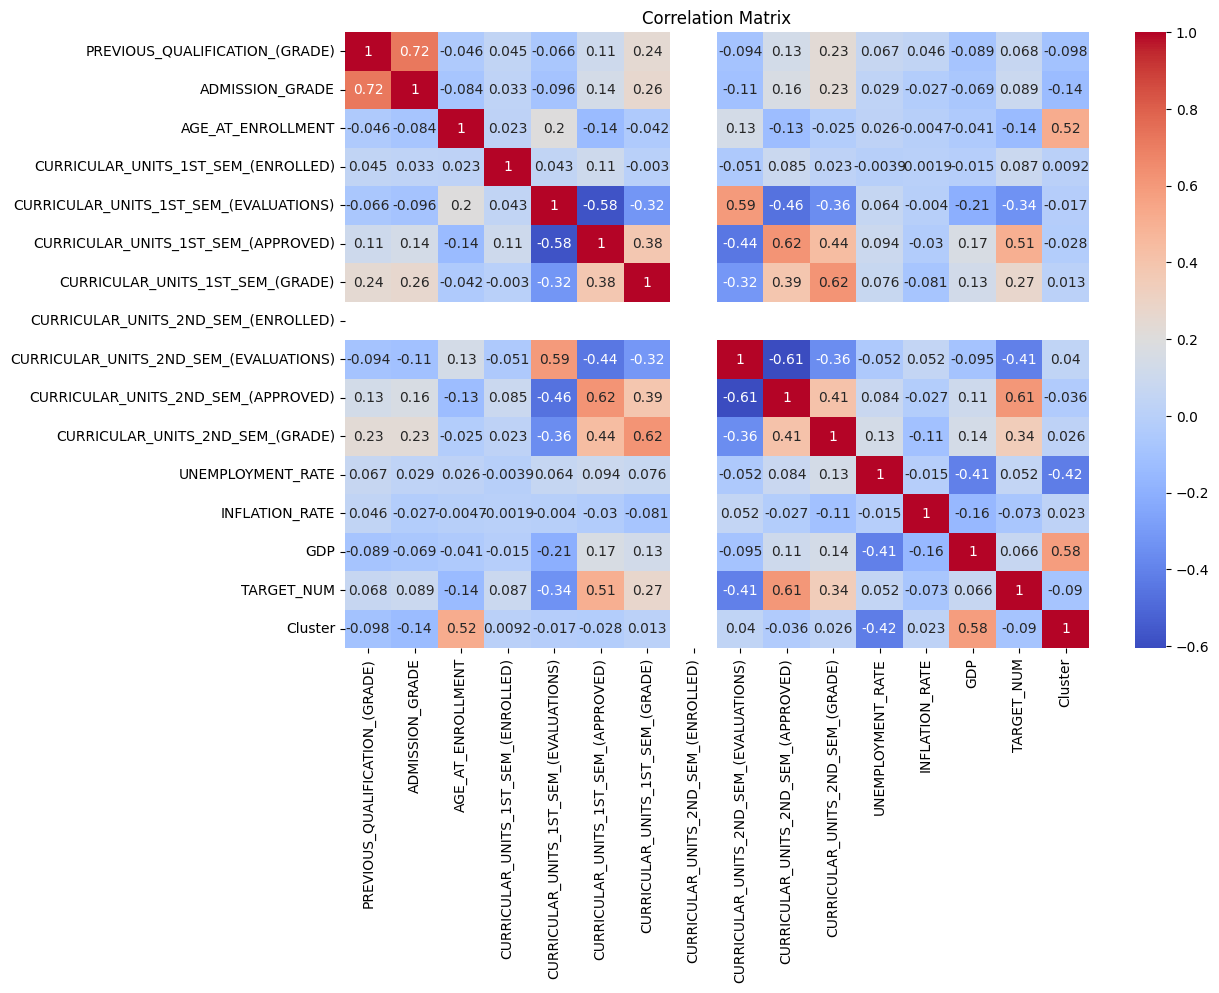

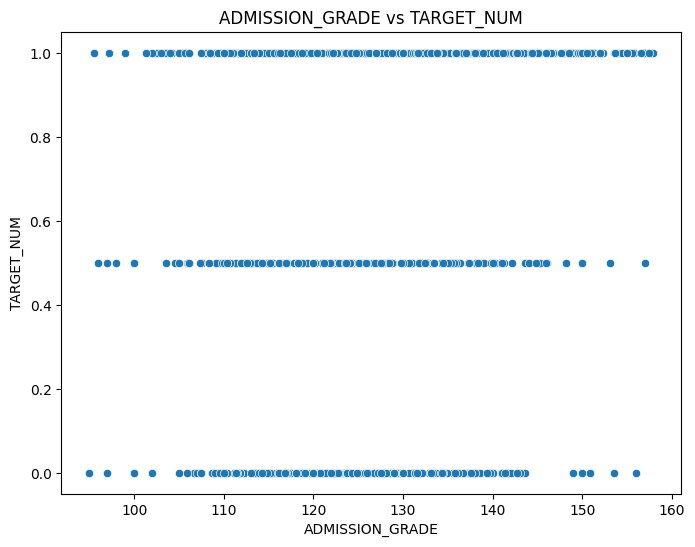

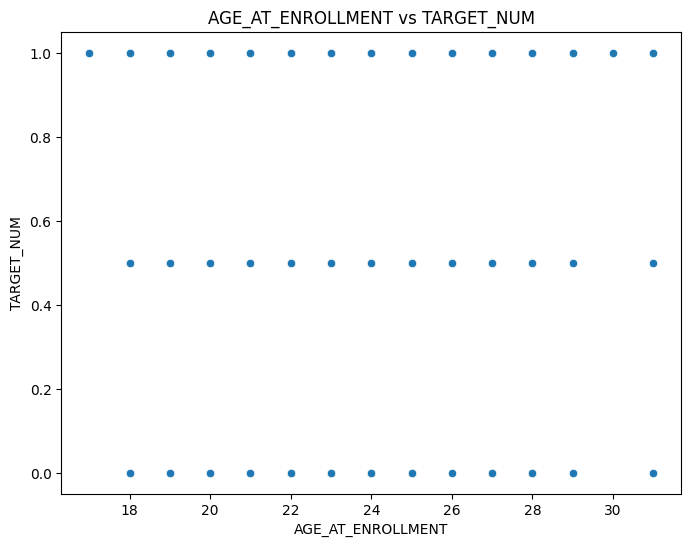

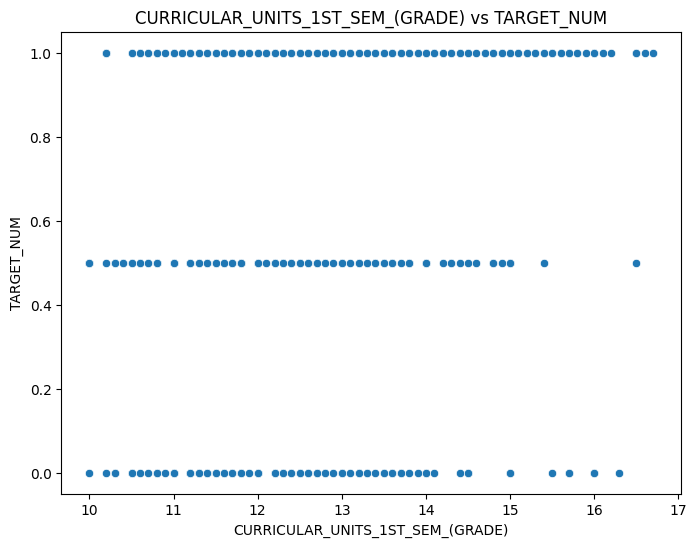

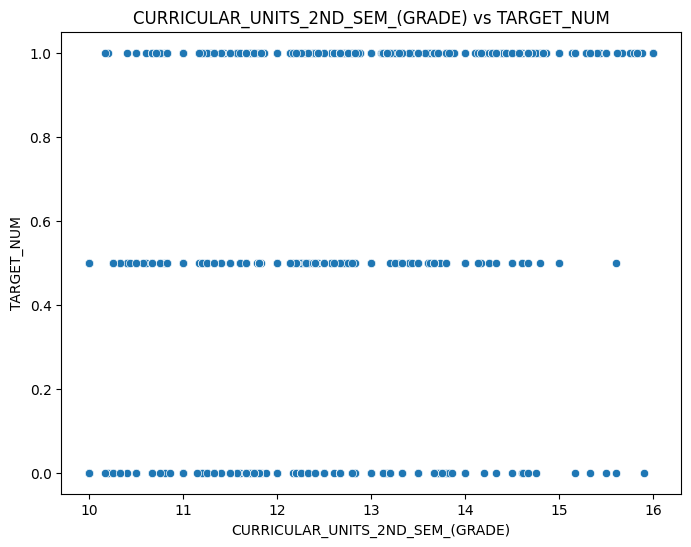

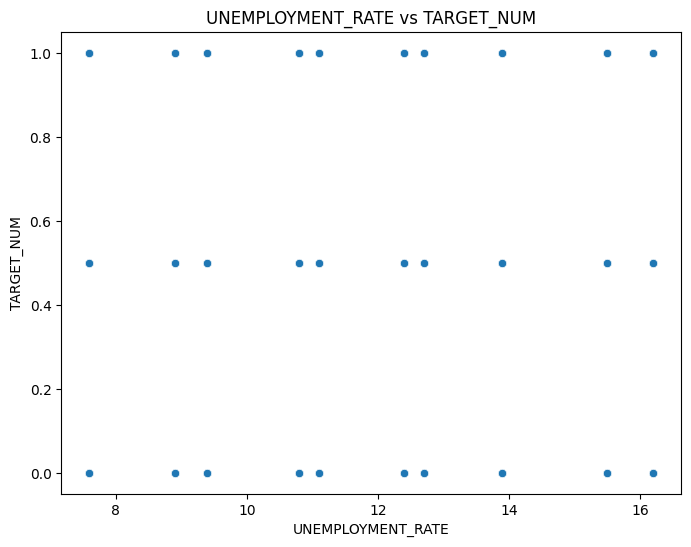

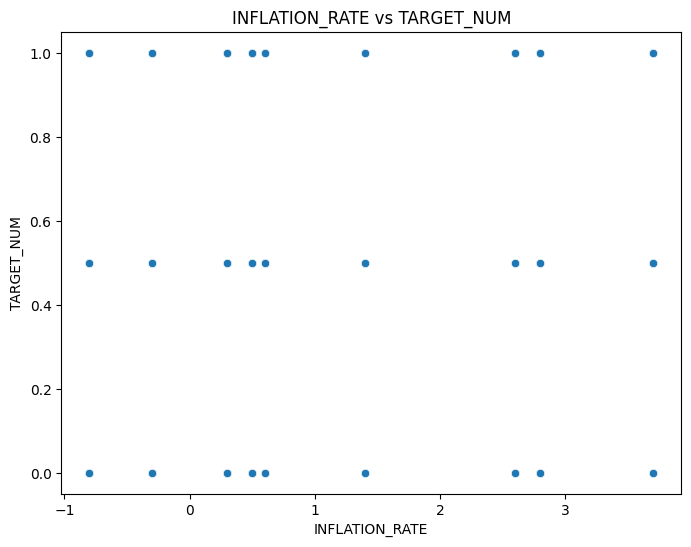

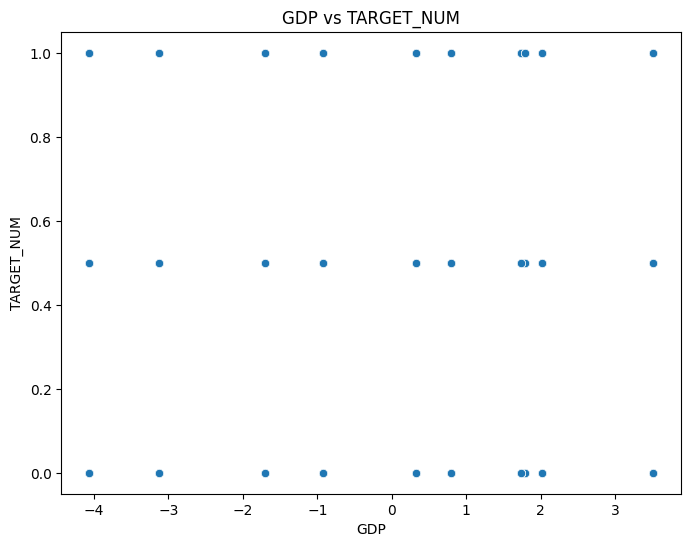

In [3]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the correlation matrix
# Convert non-numeric columns to numeric or drop them
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plots for selected variables against the target
selected_columns = ['ADMISSION_GRADE', 'AGE_AT_ENROLLMENT', 'CURRICULAR_UNITS_1ST_SEM_(GRADE)', 'CURRICULAR_UNITS_2ND_SEM_(GRADE)', 'UNEMPLOYMENT_RATE', 'INFLATION_RATE', 'GDP']

for column in selected_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=column, y='TARGET_NUM')
    plt.title(f'{column} vs TARGET_NUM')
    plt.show()

In [4]:
from scipy import stats

# Define the target variable and the factors to test
target_variable = 'TARGET_NUM'
factors = ['ADMISSION_GRADE', 'AGE_AT_ENROLLMENT', 'CURRICULAR_UNITS_1ST_SEM_(GRADE)', 'CURRICULAR_UNITS_2ND_SEM_(GRADE)', 'UNEMPLOYMENT_RATE', 'INFLATION_RATE', 'GDP']

# Perform hypothesis tests
results = {}
for factor in factors:
    # Perform Pearson correlation test
    correlation, p_value = stats.pearsonr(data[factor], data[target_variable])
    results[factor] = {'correlation': correlation, 'p_value': p_value}

# Display the results
for factor, result in results.items():
    print(f"Factor: {factor}")
    print(f"Correlation: {result['correlation']}")
    print(f"P-value: {result['p_value']}")
    print("Significant" if result['p_value'] < 0.05 else "Not significant")
    print()

Factor: ADMISSION_GRADE
Correlation: 0.08938574108739347
P-value: 0.001716097451710449
Significant

Factor: AGE_AT_ENROLLMENT
Correlation: -0.14158029875579642
P-value: 6.311472060081336e-07
Significant

Factor: CURRICULAR_UNITS_1ST_SEM_(GRADE)
Correlation: 0.26759963828032884
P-value: 1.394900355793968e-21
Significant

Factor: CURRICULAR_UNITS_2ND_SEM_(GRADE)
Correlation: 0.3439538280820199
P-value: 1.9902404996735224e-35
Significant

Factor: UNEMPLOYMENT_RATE
Correlation: 0.05236806227316613
P-value: 0.0665775657057549
Not significant

Factor: INFLATION_RATE
Correlation: -0.07346109823305164
P-value: 0.010019860874442003
Significant

Factor: GDP
Correlation: 0.06619848138497982
P-value: 0.020342779852542004
Significant



In [5]:
from scipy.stats import chi2_contingency, f_oneway

# Define categorical and numerical predictors
categorical_predictors = ['MARITAL_STATUS', 'APPLICATION_MODE', 'APPLICATION_ORDER', 'COURSE', 'DAYTIME/EVENING_ATTENDANCE', 'PREVIOUS_QUALIFICATION', 'NATIONALITY', 'MOTHER_QUALIFICATION', 'FATHER_QUALIFICATION', 'MOTHER_OCCUPATION', 'FATHER_OCCUPATION', 'DISPLACED', 'EDUCATIONAL_SPECIAL_NEEDS', 'DEBTOR', 'TUITION_FEES_UP_TO_DATE', 'GENDER', 'SCHOLARSHIP_HOLDER', 'INTERNATIONAL']
numerical_predictors = ['PREVIOUS_QUALIFICATION_(GRADE)', 'ADMISSION_GRADE', 'AGE_AT_ENROLLMENT', 'CURRICULAR_UNITS_1ST_SEM_(ENROLLED)', 'CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS)', 'CURRICULAR_UNITS_1ST_SEM_(APPROVED)', 'CURRICULAR_UNITS_1ST_SEM_(GRADE)', 'CURRICULAR_UNITS_2ND_SEM_(ENROLLED)', 'CURRICULAR_UNITS_2ND_SEM_(EVALUATIONS)', 'CURRICULAR_UNITS_2ND_SEM_(APPROVED)', 'CURRICULAR_UNITS_2ND_SEM_(GRADE)', 'UNEMPLOYMENT_RATE', 'INFLATION_RATE', 'GDP']

# Chi-square tests for categorical predictors
chi_square_results = {}
for predictor in categorical_predictors:
    contingency_table = pd.crosstab(data[predictor], data[target_variable])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi_square_results[predictor] = {'chi2': chi2, 'p_value': p}

# ANOVA for numerical predictors
anova_results = {}
for predictor in numerical_predictors:
    groups = [data[data[target_variable] == category][predictor] for category in data[target_variable].unique()]
    f_stat, p_value = f_oneway(*groups)
    anova_results[predictor] = {'f_stat': f_stat, 'p_value': p_value}

# Display the results
print("Chi-square test results for categorical predictors:")
for predictor, result in chi_square_results.items():
    print(f"Predictor: {predictor}")
    print(f"Chi2: {result['chi2']}")
    print(f"P-value: {result['p_value']}")
    print("Significant" if result['p_value'] < 0.05 else "Not significant")
    print()

print("ANOVA results for numerical predictors:")
for predictor, result in anova_results.items():
    print(f"Predictor: {predictor}")
    print(f"F-statistic: {result['f_stat']}")
    print(f"P-value: {result['p_value']}")
    print("Significant" if result['p_value'] < 0.05 else "Not significant")
    print()

Chi-square test results for categorical predictors:
Predictor: MARITAL_STATUS
Chi2: 6.657322454184195
P-value: 0.3537029809736956
Not significant

Predictor: APPLICATION_MODE
Chi2: 60.462653167344136
P-value: 0.00014527593101346984
Significant

Predictor: APPLICATION_ORDER
Chi2: 12.830156293979158
P-value: 0.23332363619496516
Not significant

Predictor: COURSE
Chi2: 146.92456445659423
P-value: 2.4344646301548374e-21
Significant

Predictor: DAYTIME/EVENING_ATTENDANCE
Chi2: 4.757401663577321
P-value: 0.09267089441761349
Not significant

Predictor: PREVIOUS_QUALIFICATION
Chi2: 30.201037776385643
P-value: 0.1136594225419321
Not significant

Predictor: NATIONALITY
Chi2: 2.8881066252120626
P-value: 0.23596936006788374
Not significant

Predictor: MOTHER_QUALIFICATION
Chi2: 64.36395303074984
P-value: 0.002528821076420144
Significant

Predictor: FATHER_QUALIFICATION
Chi2: 42.22446774235432
P-value: 0.15717803670713992
Not significant

Predictor: MOTHER_OCCUPATION
Chi2: 62.54155426427528
P-value

c:\Python311\Lib\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [6]:
from scipy.stats import pointbiserialr

# Calculate point-biserial correlation for numerical variables against the target
point_biserial_results = {}
for predictor in numerical_predictors:
    correlation, p_value = pointbiserialr(data[predictor], data[target_variable])
    point_biserial_results[predictor] = {'correlation': correlation, 'p_value': p_value}

# Display the results
print("Point-biserial correlation results for numerical predictors:")
for predictor, result in point_biserial_results.items():
    print(f"Predictor: {predictor}")
    print(f"Correlation: {result['correlation']}")
    print(f"P-value: {result['p_value']}")
    print("Significant" if result['p_value'] < 0.05 else "Not significant")
    print()

Point-biserial correlation results for numerical predictors:
Predictor: PREVIOUS_QUALIFICATION_(GRADE)
Correlation: 0.06808454496060481
P-value: 0.017022809525354985
Significant

Predictor: ADMISSION_GRADE
Correlation: 0.08938574108739347
P-value: 0.001716097451710449
Significant

Predictor: AGE_AT_ENROLLMENT
Correlation: -0.14158029875579642
P-value: 6.311472060081336e-07
Significant

Predictor: CURRICULAR_UNITS_1ST_SEM_(ENROLLED)
Correlation: 0.08664881991461049
P-value: 0.0023732947070546104
Significant

Predictor: CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS)
Correlation: -0.34027541678079365
P-value: 1.1544751027948065e-34
Significant

Predictor: CURRICULAR_UNITS_1ST_SEM_(APPROVED)
Correlation: 0.5084055677218057
P-value: 1.0890872033779396e-81
Significant

Predictor: CURRICULAR_UNITS_1ST_SEM_(GRADE)
Correlation: 0.26759963828032884
P-value: 1.394900355793968e-21
Significant

Predictor: CURRICULAR_UNITS_2ND_SEM_(ENROLLED)
Correlation: nan
P-value: nan
Not significant

Predictor: CURRICUL

c:\Python311\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [7]:
from scipy.stats import ttest_ind

# Perform Student's t-test for numerical predictors
t_test_results = {}
for predictor in numerical_predictors:
    group1 = data[data[target_variable] == 0][predictor]
    group2 = data[data[target_variable] == 1][predictor]
    t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')
    t_test_results[predictor] = {'t_stat': t_stat, 'p_value': p_value}

# Display the results
print("Student's t-test results for numerical predictors:")
for predictor, result in t_test_results.items():
    print(f"Predictor: {predictor}")
    print(f"T-statistic: {result['t_stat']}")
    print(f"P-value: {result['p_value']}")
    print("Significant" if result['p_value'] < 0.05 else "Not significant")
    print()

Student's t-test results for numerical predictors:
Predictor: PREVIOUS_QUALIFICATION_(GRADE)
T-statistic: -2.033770369426797
P-value: 0.04223675188052062
Significant

Predictor: ADMISSION_GRADE
T-statistic: -2.8836907329240113
P-value: 0.004014202582313782
Significant

Predictor: AGE_AT_ENROLLMENT
T-statistic: 4.35976010639293
P-value: 1.435902542240658e-05
Significant

Predictor: CURRICULAR_UNITS_1ST_SEM_(ENROLLED)
T-statistic: -3.7717718152432327
P-value: 0.00017154696180704144
Significant

Predictor: CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS)
T-statistic: 11.42735571759495
P-value: 1.6078761168210299e-28
Significant

Predictor: CURRICULAR_UNITS_1ST_SEM_(APPROVED)
T-statistic: -21.22094886462845
P-value: 6.946198011577627e-83
Significant

Predictor: CURRICULAR_UNITS_1ST_SEM_(GRADE)
T-statistic: -8.478008058486703
P-value: 8.076822707436962e-17
Significant

Predictor: CURRICULAR_UNITS_2ND_SEM_(ENROLLED)
T-statistic: nan
P-value: nan
Not significant

Predictor: CURRICULAR_UNITS_2ND_SEM_(EV

c:\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [11]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U test for numerical predictors
mannwhitney_results = {}
for predictor in numerical_predictors:
    group1 = data[data[target_variable] == 0][predictor]
    group2 = data[data[target_variable] == 1][predictor]
    stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
    mannwhitney_results[predictor] = {'stat': stat, 'p_value': p_value}

# Display the results
print("Mann-Whitney U test results for numerical predictors:")
for predictor, result in mannwhitney_results.items():
    print(f"Predictor: {predictor}")
    print(f"U-statistic: {result['stat']}")
    print(f"P-value: {result['p_value']}")
    print("Significant" if result['p_value'] < 0.05 else "Not significant")
    print()

Mann-Whitney U test results for numerical predictors:
Predictor: PREVIOUS_QUALIFICATION_(GRADE)
U-statistic: 79496.0
P-value: 0.03041510689630967
Significant

Predictor: ADMISSION_GRADE
U-statistic: 77983.0
P-value: 0.010566612343695317
Significant

Predictor: AGE_AT_ENROLLMENT
U-statistic: 100545.5
P-value: 0.0005947967356620668
Significant

Predictor: CURRICULAR_UNITS_1ST_SEM_(ENROLLED)
U-statistic: 86240.0
P-value: 0.0001796419243772863
Significant

Predictor: CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS)
U-statistic: 124041.5
P-value: 4.339783724679884e-22
Significant

Predictor: CURRICULAR_UNITS_1ST_SEM_(APPROVED)
U-statistic: 36053.0
P-value: 5.9528023205236685e-58
Significant

Predictor: CURRICULAR_UNITS_1ST_SEM_(GRADE)
U-statistic: 54081.0
P-value: 1.6118522284375596e-18
Significant

Predictor: CURRICULAR_UNITS_2ND_SEM_(ENROLLED)
U-statistic: 87808.0
P-value: 1.0
Not significant

Predictor: CURRICULAR_UNITS_2ND_SEM_(EVALUATIONS)
U-statistic: 129775.5
P-value: 6.584526631336464e-29
Sig

In [ ]:
# from scipy.stats import kruskal

# # Kruskal-Wallis H test for numerical predictors
# kruskal_results = {}
# for predictor in numerical_predictors:
#     groups = [data[data[target_variable] == category][predictor] for category in data[target_variable].unique()]
#     stat, p_value = kruskal(*groups)
#     kruskal_results[predictor] = {'stat': stat, 'p_value': p_value}

# # Display the results
# print("Kruskal-Wallis H test results for numerical predictors:")
# for predictor, result in kruskal_results.items():
#     print(f"Predictor: {predictor}")
#     print(f"Statistic: {result['stat']}")
#     print(f"P-value: {result['p_value']}")
#     print("Significant" if result['p_value'] < 0.05 else "Not significant")
#     print()

In [16]:
from scipy.stats import kendalltau

# Calculate Kendall's tau correlation for numerical variables against the target
kendall_tau_results = {}
for predictor in numerical_predictors:
    correlation, p_value = kendalltau(data[predictor], data[target_variable])
    kendall_tau_results[predictor] = {'correlation': correlation, 'p_value': p_value}

# Display the results
print("Kendall's tau correlation results for numerical predictors:")
for predictor, result in kendall_tau_results.items():
    print(f"Predictor: {predictor}")
    print(f"Correlation: {result['correlation']}")
    print(f"P-value: {result['p_value']}")
    print("Significant" if result['p_value'] < 0.05 else "Not significant")
    print()

Kendall's tau correlation results for numerical predictors:
Predictor: PREVIOUS_QUALIFICATION_(GRADE)
Correlation: 0.05844626118448967
P-value: 0.01011741854104653
Significant

Predictor: ADMISSION_GRADE
Correlation: 0.05981093009560997
P-value: 0.00764497302204887
Significant

Predictor: AGE_AT_ENROLLMENT
Correlation: -0.1238460508850397
P-value: 4.676363205604371e-07
Significant

Predictor: CURRICULAR_UNITS_1ST_SEM_(ENROLLED)
Correlation: 0.07842349062089272
P-value: 0.004186911099524987
Significant

Predictor: CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS)
Correlation: -0.2905358319055546
P-value: 2.424810415875161e-33
Significant

Predictor: CURRICULAR_UNITS_1ST_SEM_(APPROVED)
Correlation: 0.46186401070012656
P-value: 2.0430717688171217e-71
Significant

Predictor: CURRICULAR_UNITS_1ST_SEM_(GRADE)
Correlation: 0.23179066793573294
P-value: 1.6944477881172253e-24
Significant

Predictor: CURRICULAR_UNITS_2ND_SEM_(ENROLLED)
Correlation: nan
P-value: nan
Not significant

Predictor: CURRICULAR_UN

In [17]:
from scipy.stats import spearmanr

# Calculate Spearman rank correlation for numerical variables against the target
spearman_results = {}
for predictor in numerical_predictors:
    correlation, p_value = spearmanr(data[predictor], data[target_variable])
    spearman_results[predictor] = {'correlation': correlation, 'p_value': p_value}

# Display the results
print("Spearman rank correlation results for numerical predictors:")
for predictor, result in spearman_results.items():
    print(f"Predictor: {predictor}")
    print(f"Correlation: {result['correlation']}")
    print(f"P-value: {result['p_value']}")
    print("Significant" if result['p_value'] < 0.05 else "Not significant")
    print()

Spearman rank correlation results for numerical predictors:
Predictor: PREVIOUS_QUALIFICATION_(GRADE)
Correlation: 0.07348583998325785
P-value: 0.009994694399830317
Significant

Predictor: ADMISSION_GRADE
Correlation: 0.07621186232772206
P-value: 0.007543522513839611
Significant

Predictor: AGE_AT_ENROLLMENT
Correlation: -0.1424820324792401
P-value: 5.345213047181916e-07
Significant

Predictor: CURRICULAR_UNITS_1ST_SEM_(ENROLLED)
Correlation: 0.08179967711579592
P-value: 0.00412578388638323
Significant

Predictor: CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS)
Correlation: -0.34176881434229445
P-value: 5.670984183761463e-35
Significant

Predictor: CURRICULAR_UNITS_1ST_SEM_(APPROVED)
Correlation: 0.5054652558093709
P-value: 1.2814335808053371e-80
Significant

Predictor: CURRICULAR_UNITS_1ST_SEM_(GRADE)
Correlation: 0.29112004903315336
P-value: 2.0577734566640438e-25
Significant

Predictor: CURRICULAR_UNITS_2ND_SEM_(ENROLLED)
Correlation: nan
P-value: nan
Not significant

Predictor: CURRICULAR_U

c:\Python311\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


In [20]:
from scipy.stats import t

# Calculate confidence intervals for numerical predictors
confidence_intervals = {}
confidence_level = 0.95
for predictor in numerical_predictors:
    group1 = data[data[target_variable] == 0][predictor]
    group2 = data[data[target_variable] == 1][predictor]
    
    mean1, sem1 = np.mean(group1), stats.sem(group1)
    mean2, sem2 = np.mean(group2), stats.sem(group2)
    
    ci1 = t.interval(confidence_level, len(group1)-1, loc=mean1, scale=sem1)
    ci2 = t.interval(confidence_level, len(group2)-1, loc=mean2, scale=sem2)
    
    confidence_intervals[predictor] = {'group1': ci1, 'group2': ci2}

# Display the results
print("Confidence intervals for numerical predictors:")
for predictor, ci in confidence_intervals.items():
    print(f"Predictor: {predictor}")
    print(f"Group 1 (TARGET_NUM=0): {ci['group1']}")
    print(f"Group 2 (TARGET_NUM=1): {ci['group2']}")
    print()

Confidence intervals for numerical predictors:
Predictor: PREVIOUS_QUALIFICATION_(GRADE)
Group 1 (TARGET_NUM=0): (128.60777622078822, 131.55293806492605)
Group 2 (TARGET_NUM=1): (131.02907219432004, 132.62398903016978)

Predictor: ADMISSION_GRADE
Group 1 (TARGET_NUM=0): (122.637340344972, 125.59569536931373)
Group 2 (TARGET_NUM=1): (125.82095306655158, 127.4486897905913)

Predictor: AGE_AT_ENROLLMENT
Group 1 (TARGET_NUM=0): (19.908306398650137, 20.636336458492718)
Group 2 (TARGET_NUM=1): (19.37529672750608, 19.670621639840856)

Predictor: CURRICULAR_UNITS_1ST_SEM_(ENROLLED)
Group 1 (TARGET_NUM=0): (5.9646664417552895, 5.999619272530424)
Group 2 (TARGET_NUM=1): (nan, nan)

Predictor: CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS)
Group 1 (TARGET_NUM=0): (8.96862789335517, 9.647443535216256)
Group 2 (TARGET_NUM=1): (7.4445146275013245, 7.698342515355818)

Predictor: CURRICULAR_UNITS_1ST_SEM_(APPROVED)
Group 1 (TARGET_NUM=0): (4.2374339827064365, 4.583994588722135)
Group 2 (TARGET_NUM=1): (5.6691

c:\Python311\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Python311\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_predictors, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
data_encoded[numerical_predictors] = scaler.fit_transform(data_encoded[numerical_predictors])

# Define the features and target variable
X = data_encoded.drop(columns=[target_variable])
y = data_encoded[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (859, 166)
X_test shape: (369, 166)
y_train shape: (859,)
y_test shape: (369,)


In [22]:
# Feature engineering: Creating aggregates from semester grades and combining parental education levels

# Create aggregate features for semester grades
data['AVG_CURRICULAR_UNITS_GRADE'] = data[['CURRICULAR_UNITS_1ST_SEM_(GRADE)', 'CURRICULAR_UNITS_2ND_SEM_(GRADE)']].mean(axis=1)
data['TOTAL_CURRICULAR_UNITS_ENROLLED'] = data[['CURRICULAR_UNITS_1ST_SEM_(ENROLLED)', 'CURRICULAR_UNITS_2ND_SEM_(ENROLLED)']].sum(axis=1)
data['TOTAL_CURRICULAR_UNITS_APPROVED'] = data[['CURRICULAR_UNITS_1ST_SEM_(APPROVED)', 'CURRICULAR_UNITS_2ND_SEM_(APPROVED)']].sum(axis=1)

# Combine parental education levels
data['PARENTAL_EDUCATION_LEVEL'] = data['MOTHER_QUALIFICATION'] + '_' + data['FATHER_QUALIFICATION']

# Display the first few rows to verify the new features
print(data[['AVG_CURRICULAR_UNITS_GRADE', 'TOTAL_CURRICULAR_UNITS_ENROLLED', 'TOTAL_CURRICULAR_UNITS_APPROVED', 'PARENTAL_EDUCATION_LEVEL']].head())

   AVG_CURRICULAR_UNITS_GRADE  TOTAL_CURRICULAR_UNITS_ENROLLED  \
0                      13.835                             12.0   
1                      12.900                             12.0   
2                      14.020                             12.0   
3                      12.450                             12.0   
4                      13.250                             12.0   

   TOTAL_CURRICULAR_UNITS_APPROVED  \
0                             12.0   
1                             11.0   
2                             12.0   
3                              7.0   
4                             11.0   

                            PARENTAL_EDUCATION_LEVEL  
0  Secondary Education - 12th Year of Schooling o...  
1  Basic Education 2nd Cycle (6th/7th/8th Year) o...  
2  Secondary Education - 12th Year of Schooling o...  
3  Secondary Education - 12th Year of Schooling o...  
4  Basic Education 2nd Cycle (6th/7th/8th Year) o...  


In [24]:
data.to_csv('FE_students_data7.csv', index=False)

In [71]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical_data = encoder.fit_transform(data[categorical_predictors])

# Combine encoded categorical data with numerical predictors
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_predictors))
data_encoded = pd.concat([data[numerical_predictors], encoded_categorical_df], axis=1)

# Convert the continuous target variable to a categorical variable
y = pd.cut(data[target_variable], bins=2, labels=[0, 1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_encoded, y, test_size=0.3, random_state=42)

# Train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict the outcomes for the test set
y_pred = model.predict(X_test)

# Display the predictions
print(y_pred)
# Calculate and display the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Display the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

[1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0
 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0
 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1
 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0
 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1
 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1
 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1]
Accuracy: 0.83
Confusion Matrix:
[[ 91  44]
 [ 17 217]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.67      0.75       135
           1       0.83      0.93      0.88       234

    accu

In [35]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Display the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Display the predictions
print(y_pred_best)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.8148986808105535
[1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0
 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0
 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1
 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0
 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1
 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1
 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1]


In [ ]:
# bayesian optimisation

In [38]:

from bayes_opt import BayesianOptimization

# Define the function to optimize
def rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf, bootstrap):
    # Convert parameters to integer
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)
    bootstrap = bool(bootstrap)
    
    # Initialize the model with given parameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap,
        random_state=42
    )
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Return the mean cross-validation score
    return cv_scores.mean()

# Define the parameter bounds
param_bounds = {
    'n_estimators': (100, 300),
    'max_depth': (10, 30),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4),
    'bootstrap': (0, 1)
}

# Initialize the Bayesian optimizer
optimizer = BayesianOptimization(
    f=rf_cv,
    pbounds=param_bounds,
    random_state=42
)

# Perform the optimization
optimizer.maximize(
    init_points=10,
    n_iter=30
)

# Display the best parameters and the best score
print(f"Best parameters: {optimizer.max['params']}")
print(f"Best score: {optimizer.max['target']}")

|   iter    |  target   | bootstrap | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.8032    | 0.3745    | 29.01     | 3.196     | 6.789     | 131.2     |
| 2         | 0.8032    | 0.156     | 11.16     | 3.599     | 6.809     | 241.6     |
| 3         | 0.8044    | 0.02058   | 29.4      | 3.497     | 3.699     | 136.4     |
| 4         | 0.8137    | 0.1834    | 16.08     | 2.574     | 5.456     | 158.2     |
| 5         | 0.8056    | 0.6119    | 12.79     | 1.876     | 4.931     | 191.2     |
| 6         | 0.7986    | 0.7852    | 13.99     | 2.543     | 6.739     | 109.3     |
| 7         | 0.8032    | 0.6075    | 13.41     | 1.195     | 9.591     | 293.1     |
| 8         | 0.8067    | 0.8084    | 16.09     | 1.293     | 7.474     | 188.0     |
| 9         | 0.8079    | 0.122     | 19.9      | 1.103     | 9.275     | 151.8     |
| 10        | 0.8009    | 0.6625    | 16.23     | 2.56

In [36]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
k = 5
cv_scores = cross_val_score(model, X, y, cv=k)

# Display the cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.82113821 0.82113821 0.80081301 0.82040816 0.84081633]
Mean cross-validation score: 0.8208627841380455


In [28]:
from sklearn.model_selection import cross_val_score

# Define the number of folds
k = 5

# Perform k-fold cross-validation for each model
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=k)
    cv_results[name] = scores

# Display the cross-validation scores
for name, scores in cv_results.items():
    print(f"Model: {name}")
    print(f"Cross-validation scores: {scores}")
    print(f"Mean cross-validation score: {scores.mean()}")
    print()

Model: Linear Regression
Cross-validation scores: [0.42407062 0.37800675 0.33728745 0.36991851 0.44800418]
Mean cross-validation score: 0.39145750103434607

Model: Decision Tree
Cross-validation scores: [-0.25628276 -0.32802574 -0.20588235 -0.29344193 -0.06223233]
Mean cross-validation score: -0.22917302058082095

Model: Random Forest
Cross-validation scores: [0.35412321 0.26664205 0.30390267 0.32382756 0.39278396]
Mean cross-validation score: 0.32825589085432505

Model: Support Vector Regressor
Cross-validation scores: [0.22947513 0.22539798 0.19428132 0.13996448 0.25661172]
Mean cross-validation score: 0.20914612569868235



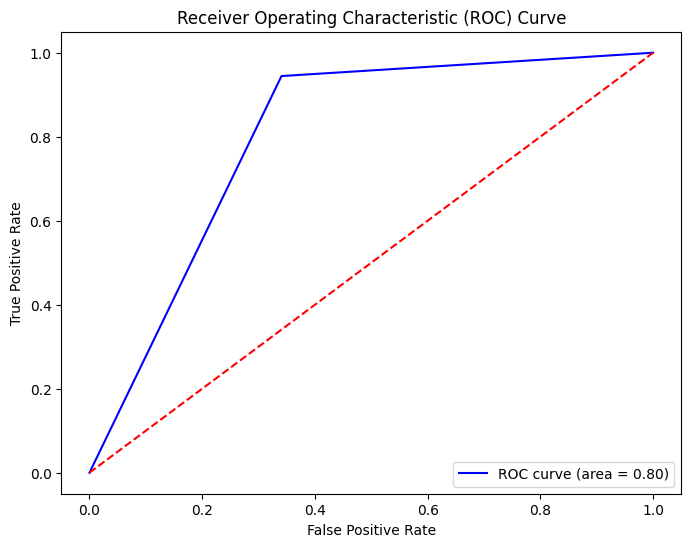

ROC-AUC score: 0.80


In [39]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_best)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display the ROC-AUC score
print(f'ROC-AUC score: {roc_auc:.2f}')

In [41]:
import lime

import lime.lime_tabular

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['Not Target', 'Target'],
    mode='classification'
)

# Select an instance to explain
instance_idx = 0
instance = X_test.iloc[instance_idx].values.reshape(1, -1)

# Generate explanation for the selected instance
explanation = explainer.explain_instance(
    data_row=instance[0],
    predict_fn=model.predict_proba
)

# Display the explanation
explanation.show_in_notebook(show_table=True, show_all=False)

C:\Users\aidan_1k98io6\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# data mining

In [47]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import apriori, association_rules
# Clustering using KMeans
# Define the number of clusters
num_clusters = 3

# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Add the cluster labels to the data
data['Cluster'] = kmeans.labels_

# Display the first few rows to verify the cluster labels
print(data[['Cluster']].head())

# Association Rule Mining using Apriori
# Convert categorical variables to boolean values
basket = data[categorical_predictors].applymap(lambda x: 1 if x else 0)

# Reduce the dataset size to avoid MemoryError
basket = basket.loc[:, (basket != 0).any(axis=0)]

# Further reduce the dataset size
basket = basket.sample(frac=0.1, random_state=42)
basket = basket.loc[:, (basket != 0).any(axis=0)]

# Apply the Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.1, use_colnames=True)

# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display the association rules
print(rules.head())


   Cluster
0        0
1        2
2        1
3        1
4        1


C:\Users\aidan_1k98io6\AppData\Local\Temp\ipykernel_80016\3628243909.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = data[categorical_predictors].applymap(lambda x: 1 if x else 0)
c:\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [2]:
# Import libraries
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv("cleaned_students_data5.csv")

In [4]:
# Import libraries
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv("FE_students_data7.csv")

In [5]:
# statistics

# Define numerical predictors
numerical_predictors = ['PREVIOUS_QUALIFICATION_(GRADE)', 'ADMISSION_GRADE', 'AGE_AT_ENROLLMENT', 'CURRICULAR_UNITS_1ST_SEM_(ENROLLED)', 'CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS)', 'CURRICULAR_UNITS_1ST_SEM_(APPROVED)', 'CURRICULAR_UNITS_1ST_SEM_(GRADE)', 'CURRICULAR_UNITS_2ND_SEM_(ENROLLED)', 'CURRICULAR_UNITS_2ND_SEM_(EVALUATIONS)', 'CURRICULAR_UNITS_2ND_SEM_(APPROVED)', 'CURRICULAR_UNITS_2ND_SEM_(GRADE)', 'UNEMPLOYMENT_RATE', 'INFLATION_RATE', 'GDP']

# Calculate descriptive statistics for numerical predictors
descriptive_stats = data[numerical_predictors].describe()

# Display the descriptive statistics
print(descriptive_stats)

       PREVIOUS_QUALIFICATION_(GRADE)  ADMISSION_GRADE  AGE_AT_ENROLLMENT  \
count                     1228.000000      1228.000000        1228.000000   
mean                       131.206026       125.863111          19.784202   
std                         11.289221        11.598234           2.309015   
min                        105.000000        95.000000          17.000000   
25%                        123.000000       117.900000          18.000000   
50%                        131.000000       125.000000          19.000000   
75%                        138.000000       133.200000          20.000000   
max                        162.000000       157.900000          31.000000   

       CURRICULAR_UNITS_1ST_SEM_(ENROLLED)  \
count                          1228.000000   
mean                              5.995928   
std                               0.075421   
min                               5.000000   
25%                               6.000000   
50%                           

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define the features and target variable
# Split the data into training and testing sets

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regressor': SVR()
}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

# Display the results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Mean Squared Error: {result['MSE']}")
    print(f"R2 Score: {result['R2']}")
    print()

Model: Linear Regression
Mean Squared Error: 0.09179698673867087
R2 Score: 0.4039641634045842

Model: Decision Tree
Mean Squared Error: 0.19986449864498645
R2 Score: -0.2977158389165735

Model: Random Forest
Mean Squared Error: 0.10260657181571815
R2 Score: 0.3337777628096611

Model: Support Vector Regressor
Mean Squared Error: 0.12294283436782381
R2 Score: 0.20173485275233005



In [20]:
from sklearn.cluster import KMeans

# k-means clustering

# Define the number of clusters
num_clusters = 3

# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Add the cluster labels to the data
data['Cluster'] = kmeans.labels_

# Display the first few rows to verify the cluster labels
print(data[['Cluster']].head())

   Cluster
0        2
1        1
2        0
3        0
4        0


In [9]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# uncertainty modeling 

# Define the model
gb_model = GradientBoostingRegressor(random_state=42)

# Fit the model
gb_model.fit(X_train, y_train)

# Predict the outcomes for the test set
y_pred_gb = gb_model.predict(X_test)

# Calculate the prediction intervals
n_estimators = gb_model.n_estimators_
y_pred_all = np.array([y_pred for y_pred in gb_model.staged_predict(X_test)])
errors = np.array([mean_squared_error(y_test, y_pred) for y_pred in y_pred_all])
quantile = np.percentile(errors, 95)

# Calculate the upper and lower bounds
y_pred_upper = y_pred_gb + quantile
y_pred_lower = y_pred_gb - quantile

# Display the prediction intervals
print("Prediction intervals for Gradient Boosting Regressor:")
for i in range(len(y_pred_gb)):
    print(f"Prediction: {y_pred_gb[i]}, Lower bound: {y_pred_lower[i]}, Upper bound: {y_pred_upper[i]}")

Prediction intervals for Gradient Boosting Regressor:
Prediction: 0.942040951550199, Lower bound: 0.8276967987915064, Upper bound: 1.0563851043088917
Prediction: 0.37295727498525394, Lower bound: 0.25861312222656135, Upper bound: 0.4873014277439465
Prediction: 0.6801924741215505, Lower bound: 0.5658483213628579, Upper bound: 0.7945366268802431
Prediction: 0.013170316417161253, Lower bound: -0.10117383634153135, Upper bound: 0.12751446917585385
Prediction: 0.6864212012389506, Lower bound: 0.572077048480258, Upper bound: 0.8007653539976431
Prediction: 0.523779195576588, Lower bound: 0.40943504281789544, Upper bound: 0.6381233483352806
Prediction: 0.6519645783817694, Lower bound: 0.5376204256230768, Upper bound: 0.7663087311404619
Prediction: 0.9655174996869715, Lower bound: 0.851173346928279, Upper bound: 1.0798616524456641
Prediction: 0.61353922752669, Lower bound: 0.4991950747679974, Upper bound: 0.7278833802853826
Prediction: 0.2030617622266733, Lower bound: 0.0887176094679807, Upper 

In [10]:
# Calculate mean, median, and standard deviation for numerical predictors
mean_values = data[numerical_predictors].mean()
median_values = data[numerical_predictors].median()
std_dev_values = data[numerical_predictors].std()

# Display the results
print("Mean values for numerical predictors:")
print(mean_values)
print("\nMedian values for numerical predictors:")
print(median_values)
print("\nStandard deviation values for numerical predictors:")
print(std_dev_values)

# Calculate the correlation matrix for numerical predictors
correlation_matrix = data[numerical_predictors].corr()

# Display the correlation matrix
print("\nCorrelation matrix for numerical predictors:")
print(correlation_matrix)

Mean values for numerical predictors:
PREVIOUS_QUALIFICATION_(GRADE)            131.206026
ADMISSION_GRADE                           125.863111
AGE_AT_ENROLLMENT                          19.784202
CURRICULAR_UNITS_1ST_SEM_(ENROLLED)         5.995928
CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS)      8.167752
CURRICULAR_UNITS_1ST_SEM_(APPROVED)         5.314332
CURRICULAR_UNITS_1ST_SEM_(GRADE)           12.709853
CURRICULAR_UNITS_2ND_SEM_(ENROLLED)         6.000000
CURRICULAR_UNITS_2ND_SEM_(EVALUATIONS)      8.399837
CURRICULAR_UNITS_2ND_SEM_(APPROVED)         5.031759
CURRICULAR_UNITS_2ND_SEM_(GRADE)           12.583713
UNEMPLOYMENT_RATE                          11.613436
INFLATION_RATE                              1.175326
GDP                                         0.284349
dtype: float64

Median values for numerical predictors:
PREVIOUS_QUALIFICATION_(GRADE)            131.00
ADMISSION_GRADE                           125.00
AGE_AT_ENROLLMENT                          19.00
CURRICULAR_UNITS_

In [ ]:
def choose_model(scenario):
    if scenario == 'linear_regression':
        return LinearRegression()
    elif scenario == 'decision_tree':
        return DecisionTreeRegressor()
    elif scenario == 'random_forest':
        return RandomForestRegressor()
    elif scenario == 'svr':
        return SVR()
    elif scenario == 'gradient_boosting':
        return GradientBoostingRegressor()
    else:
        raise ValueError("Unknown scenario")

# Example usage:
scenario = 'random_forest'  # Change this based on your scenario
model = choose_model(scenario)
print(f"Chosen model: {model.__class__.__name__}")

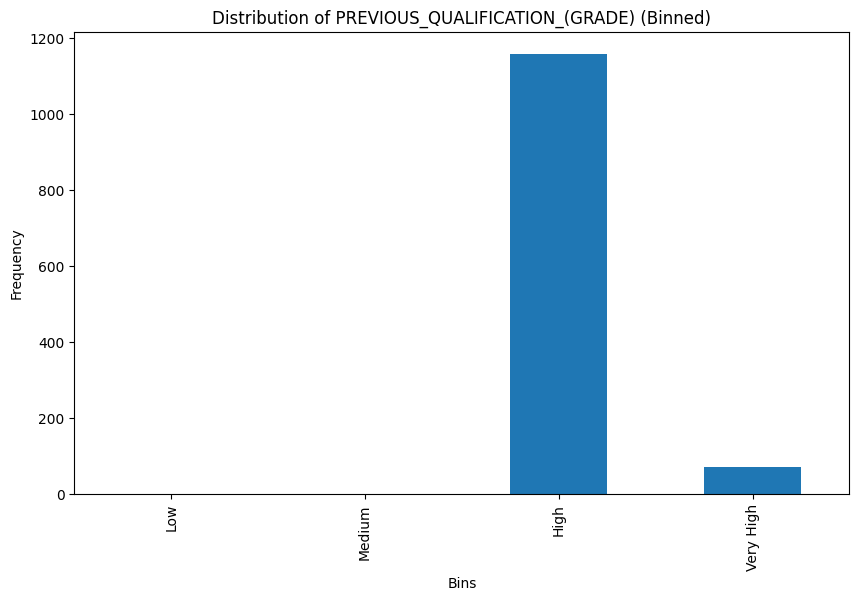

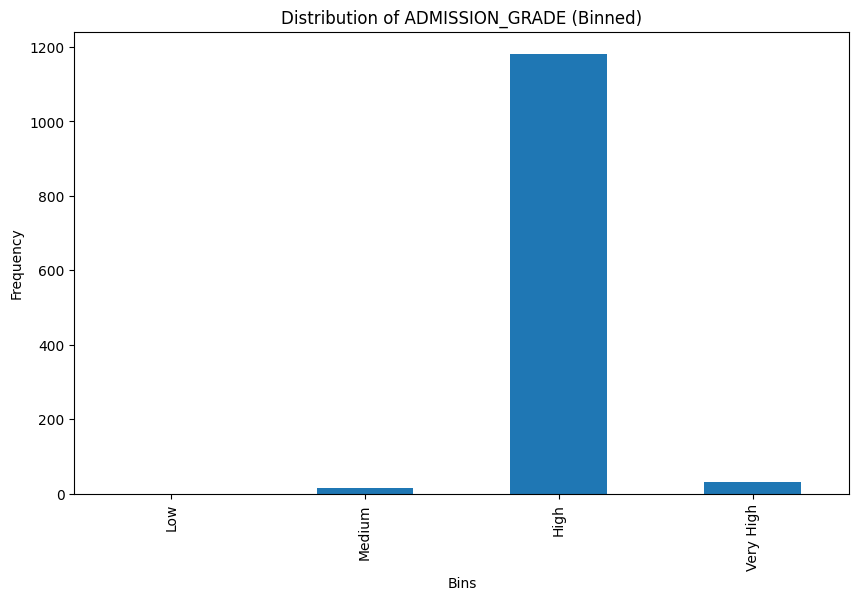

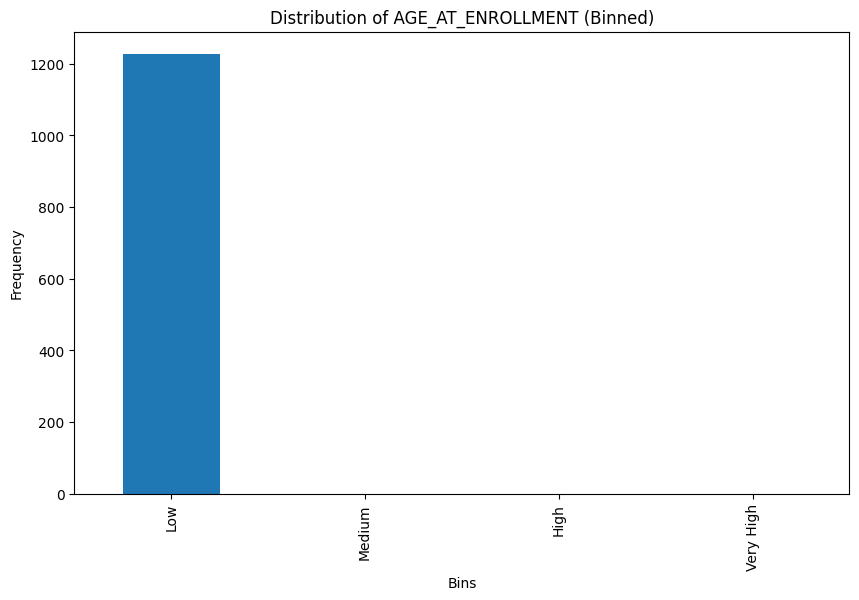

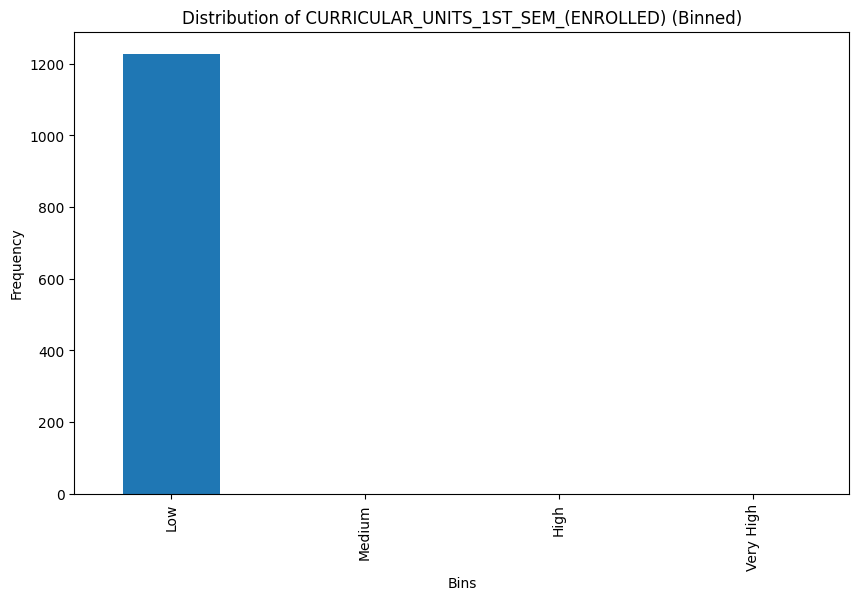

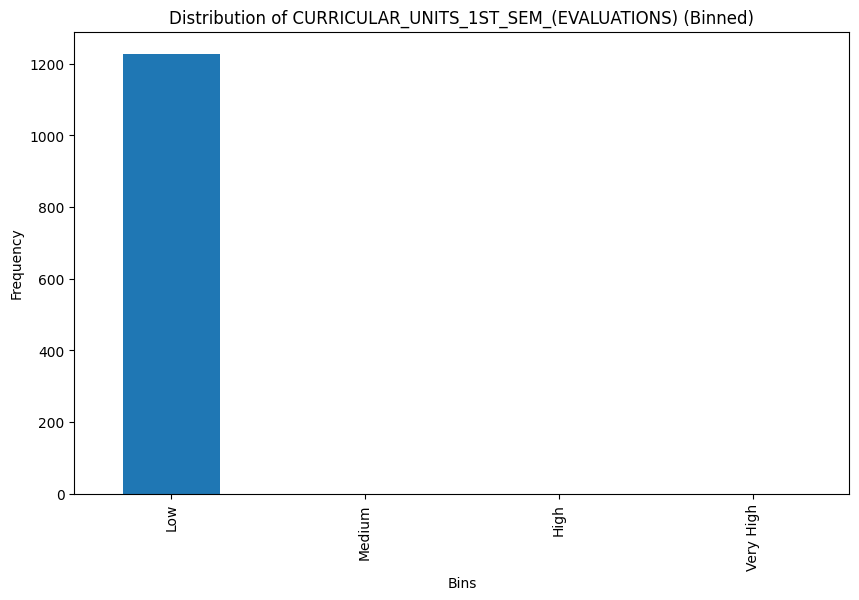

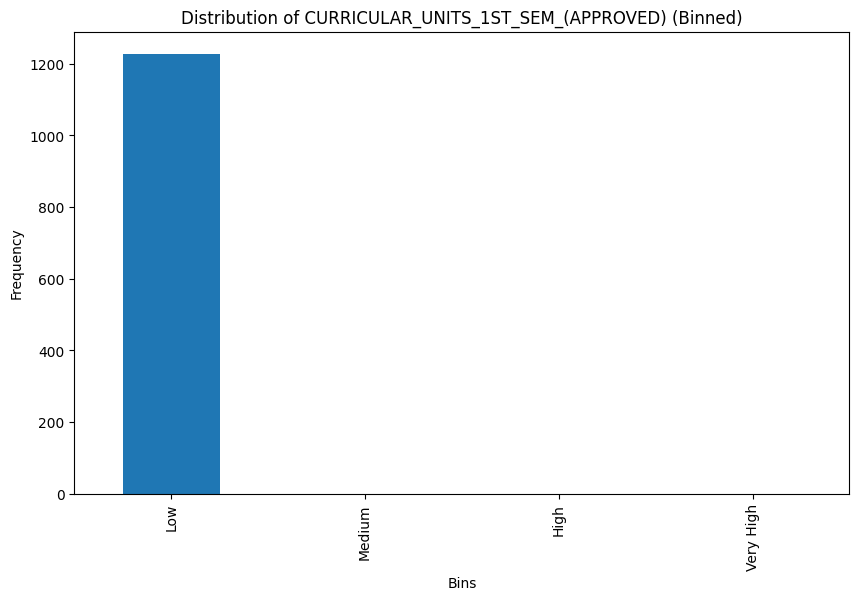

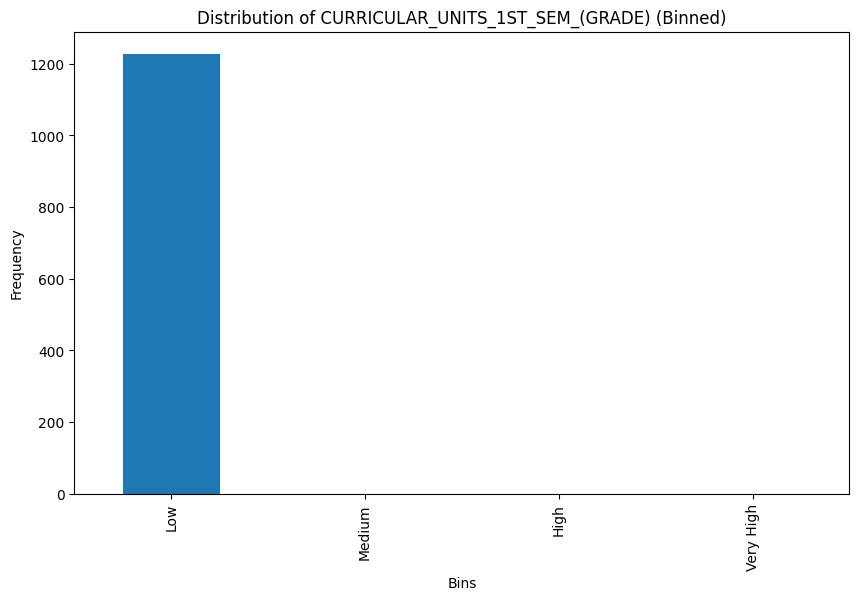

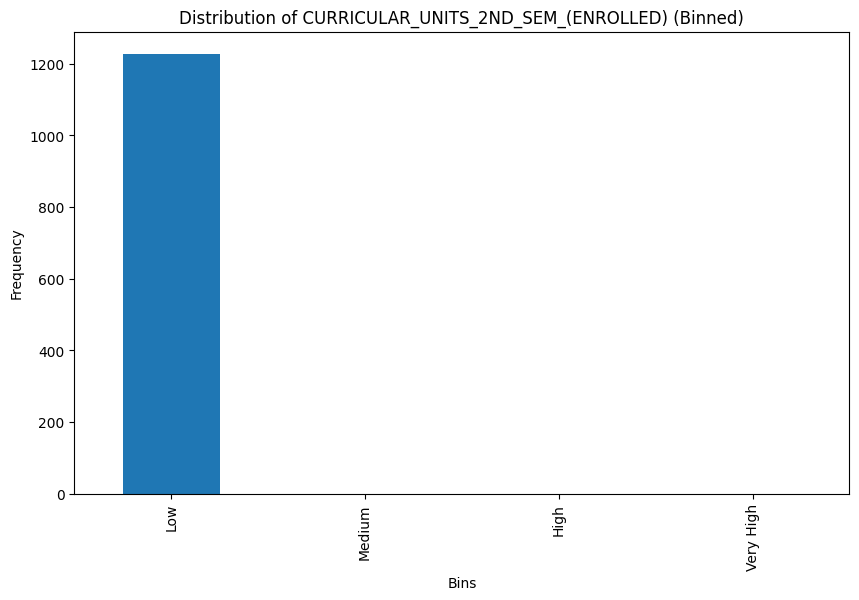

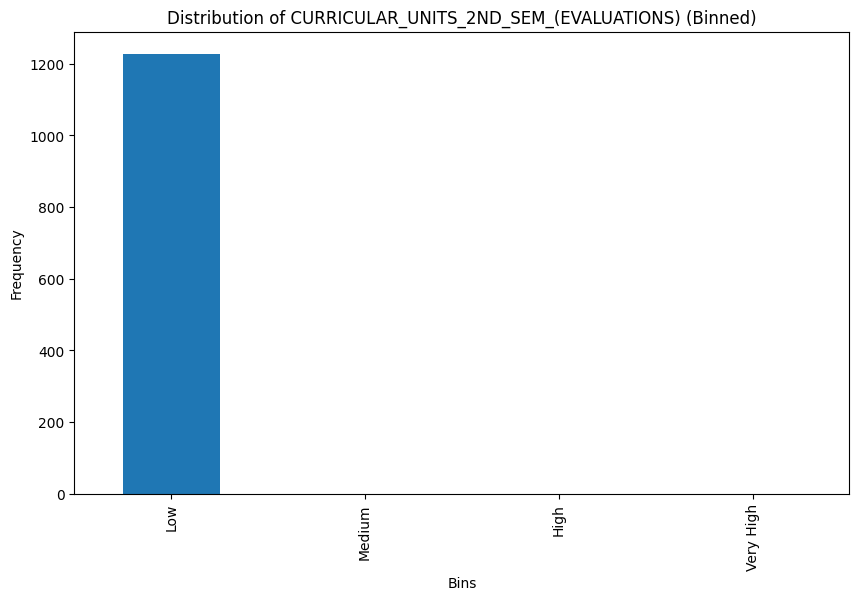

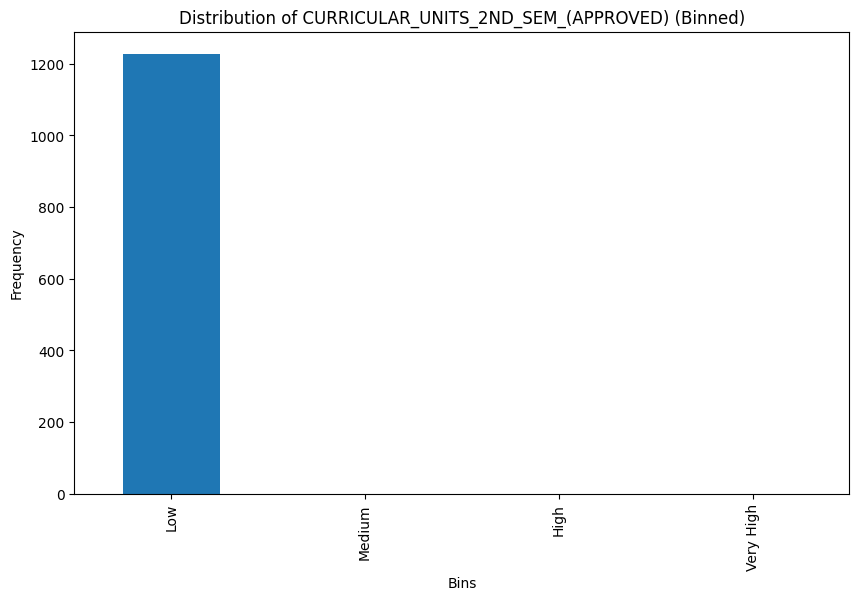

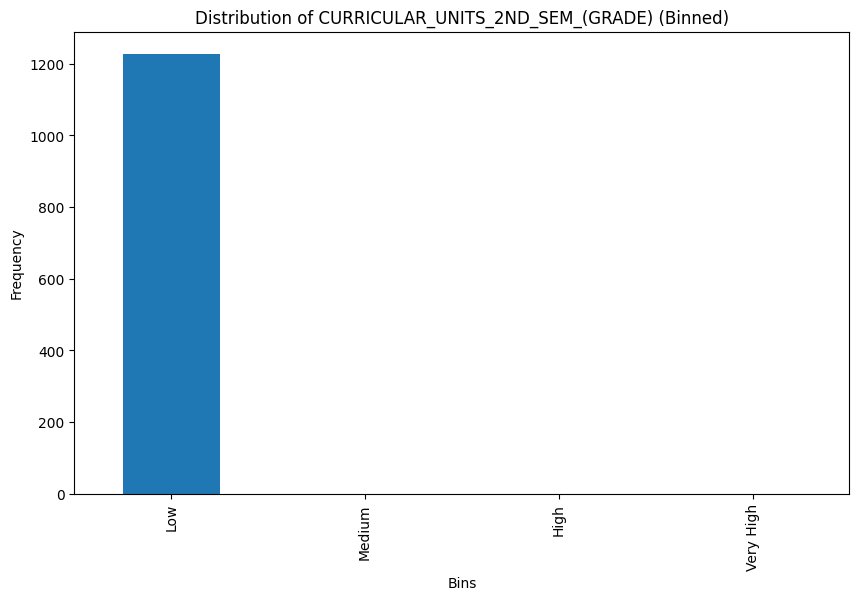

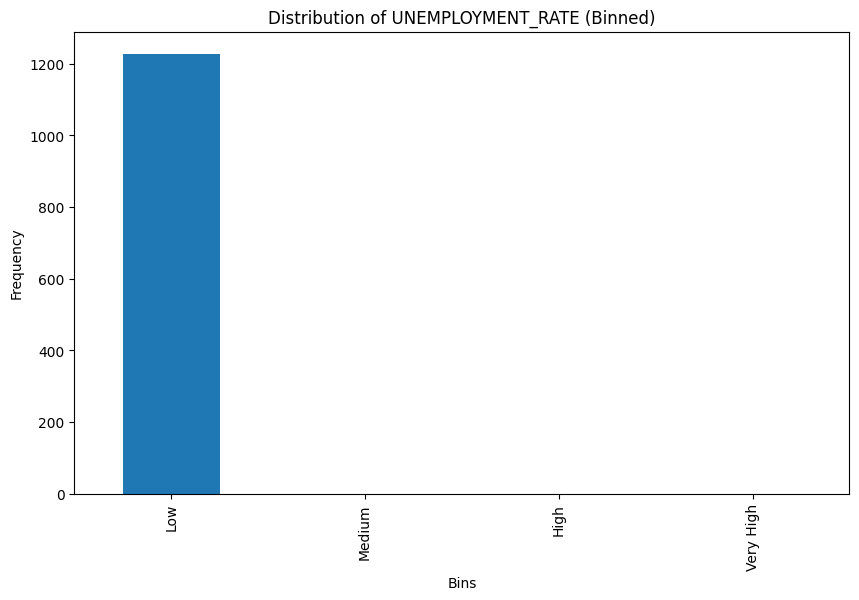

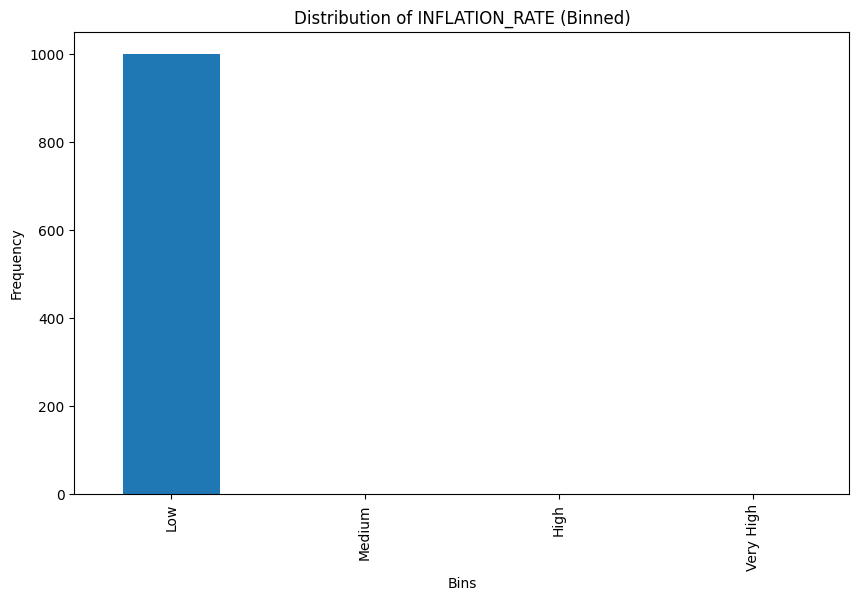

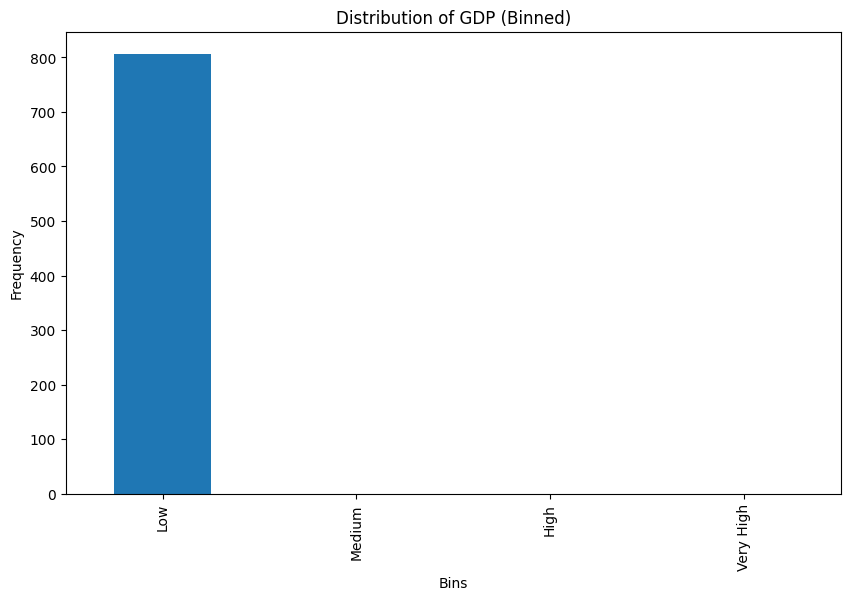

In [14]:
import matplotlib.pyplot as plt

# Define the bins and labels for binning
bins = [0, 50, 100, 150, 200]
labels = ['Low', 'Medium', 'High', 'Very High']

# Apply binning to numerical variables and visualize them
for predictor in numerical_predictors:
    data[f'{predictor}_BINNED'] = pd.cut(data[predictor], bins=bins, labels=labels)
    
    # Plot the histogram
    plt.figure(figsize=(10, 6))
    data[f'{predictor}_BINNED'].value_counts().sort_index().plot(kind='bar')
    plt.title(f'Distribution of {predictor} (Binned)')
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.show()

In [17]:
# linear methods

# Fit and evaluate linear models

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R2 Score: {r2_linear}")
print()

# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regressor:")
print(f"Mean Squared Error: {mse_svr}")
print(f"R2 Score: {r2_svr}")
print()

Linear Regression:
Mean Squared Error: 0.09179698673867087
R2 Score: 0.4039641634045842

Support Vector Regressor:
Mean Squared Error: 0.12294283436782381
R2 Score: 0.20173485275233005



In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
# Convert the continuous target variable to discrete classes
y_train_class = pd.cut(y_train, bins=2, labels=[0, 1])
y_test_class = pd.cut(y_test, bins=2, labels=[0, 1])

# Train the model
logistic_model.fit(X_train, y_train_class)

# Predict the outcomes for the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_class, y_pred_logistic)
conf_matrix = confusion_matrix(y_test_class, y_pred_logistic)
class_report = classification_report(y_test_class, y_pred_logistic)

# Display the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8292682926829268
Confusion Matrix:
[[ 87  48]
 [ 15 219]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.64      0.73       135
           1       0.82      0.94      0.87       234

    accuracy                           0.83       369
   macro avg       0.84      0.79      0.80       369
weighted avg       0.83      0.83      0.82       369



C:\Users\aidan_1k98io6\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


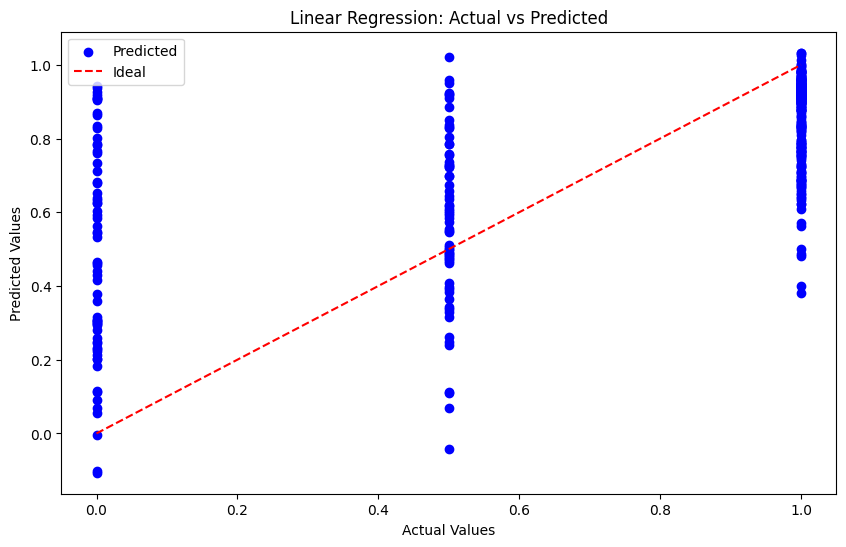

In [22]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

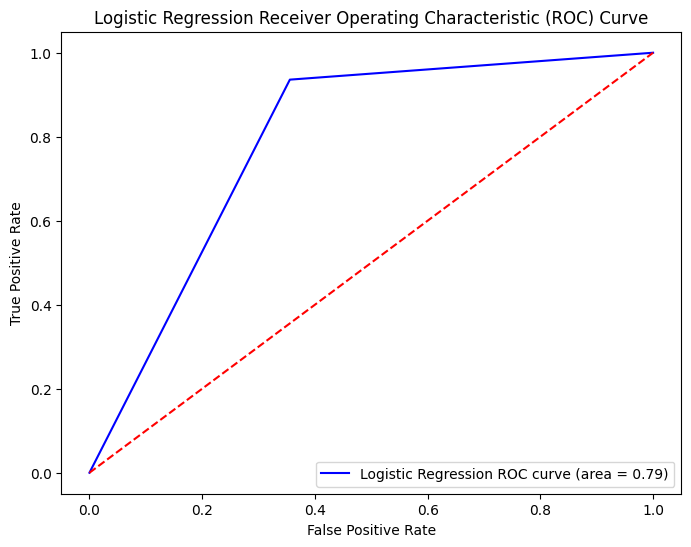

Logistic Regression ROC-AUC score: 0.79


In [25]:
from sklearn.metrics import roc_auc_score, roc_curve

import matplotlib.pyplot as plt

# Calculate the ROC-AUC score for logistic regression
roc_auc_logistic = roc_auc_score(y_test_class, y_pred_logistic)

# Calculate the ROC curve for logistic regression
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test_class, y_pred_logistic)

# Plot the ROC curve for logistic regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, color='blue', label=f'Logistic Regression ROC curve (area = {roc_auc_logistic:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display the ROC-AUC score for logistic regression
print(f'Logistic Regression ROC-AUC score: {roc_auc_logistic:.2f}')

In [ ]:
# Introduction and Literature Review

# Introduction
# The prediction of student performance is a critical task in educational data mining. Accurate predictions can help educational institutions identify at-risk students early, allowing for timely interventions to improve their academic outcomes. This task involves analyzing various factors that influence student performance, such as previous academic achievements, demographic information, and socio-economic factors.

# Literature Review
# Numerous studies have been conducted to predict student performance using different machine learning techniques. For instance, Kotsiantis et al. (2004) explored the use of decision trees, neural networks, and support vector machines for predicting student grades. Their study highlighted the effectiveness of these models in educational data mining.

# Another study by Cortez and Silva (2008) used decision trees, random forests, and neural networks to predict student performance in secondary education. They found that ensemble methods like random forests provided better accuracy compared to individual models.

# More recently, deep learning techniques have also been applied to this problem. For example, Al-Shabandar et al. (2017) used deep neural networks to predict student performance and found that these models outperformed traditional machine learning methods.

# Despite the advancements in predictive modeling, there is still a need for more comprehensive studies that incorporate a wide range of features and compare multiple machine learning algorithms. This study aims to fill this gap by analyzing a dataset of student performance and comparing the effectiveness of various machine learning models, including linear regression, decision trees, random forests, support vector machines, and gradient boosting.

# References:
# - Kotsiantis, S. B., Pierrakeas, C. J., & Pintelas, P. E. (2004). Predicting students' performance in distance learning using machine learning techniques. Applied Artificial Intelligence, 18(5), 411-426.
# - Cortez, P., & Silva, A. (2008). Using data mining to predict secondary school student performance. In Proceedings of 5th Annual Future Business Technology Conference (FUBUTEC), Porto, Portugal.
# - Al-Shabandar, R., Hussain, A. J., Laws, A., Keight, R., Lunn, J., & Radi, N. (2017). Machine learning approaches to predict student performance. In 2017 International Joint Conference on Neural Networks (IJCNN) (pp. 713-720). IEEE.

In [ ]:
# feature importance analysis
# SHAP values

c:\Python311\Lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


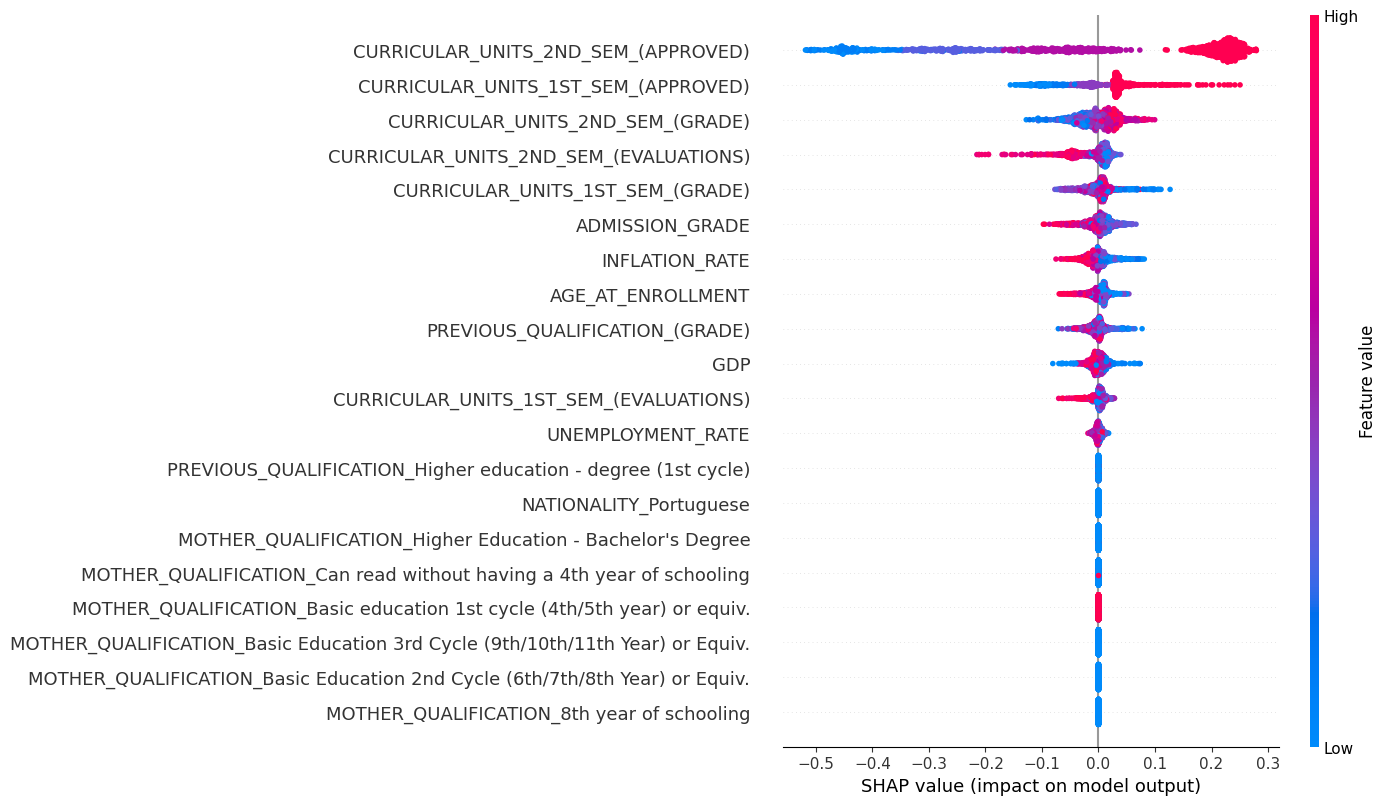

In [167]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(best_models['Random Forest'])

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_encoded)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test_encoded, feature_names=X_test.columns)

In [8]:
from scipy.stats import boxcox

# Define numerical predictors
numerical_predictors = ['PREVIOUS_QUALIFICATION_(GRADE)', 'ADMISSION_GRADE', 'AGE_AT_ENROLLMENT', 'CURRICULAR_UNITS_1ST_SEM_(ENROLLED)', 'CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS)', 'CURRICULAR_UNITS_1ST_SEM_(APPROVED)', 'CURRICULAR_UNITS_1ST_SEM_(GRADE)', 'CURRICULAR_UNITS_2ND_SEM_(ENROLLED)', 'CURRICULAR_UNITS_2ND_SEM_(EVALUATIONS)', 'CURRICULAR_UNITS_2ND_SEM_(APPROVED)', 'CURRICULAR_UNITS_2ND_SEM_(GRADE)', 'UNEMPLOYMENT_RATE', 'INFLATION_RATE', 'GDP']

# Apply Box-Cox transformation to numerical predictors
boxcox_transformed_data = data.copy()
for predictor in numerical_predictors:
    # Ensure all values are positive for Box-Cox transformation
    if data[predictor].nunique() > 1:  # Check if data is not constant
        min_value = data[predictor].min()
        boxcox_transformed_data[predictor], _ = boxcox(data[predictor] - min_value + 1)
    else:
        boxcox_transformed_data[predictor] = data[predictor]  # Keep original if data is constant

# Display the first few rows to verify the transformation
print(boxcox_transformed_data[numerical_predictors].head())

   PREVIOUS_QUALIFICATION_(GRADE)  ADMISSION_GRADE  AGE_AT_ENROLLMENT  \
0                       27.043847        23.934079           0.748512   
1                       10.602974        14.205437           0.862069   
2                       17.619376        18.508044           0.934745   
3                       18.056079        15.751681           0.540577   
4                       18.489762        19.061620           0.540577   

   CURRICULAR_UNITS_1ST_SEM_(ENROLLED)  \
0                             2.096724   
1                             2.096724   
2                             2.096724   
3                             2.096724   
4                             2.096724   

   CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS)  \
0                                0.629132   
1                                1.145751   
2                                1.145751   
3                                1.291545   
4                                0.629132   

   CURRICULAR_UNITS_1ST_SEM_(APPROVED

In [9]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical predictors in the boxcox_transformed_data
boxcox_transformed_data[numerical_predictors] = scaler.fit_transform(boxcox_transformed_data[numerical_predictors])

# Display the first few rows to verify the rescaling
print(boxcox_transformed_data[numerical_predictors].head())

   PREVIOUS_QUALIFICATION_(GRADE)  ADMISSION_GRADE  AGE_AT_ENROLLMENT  \
0                        2.337038         1.390851          -0.054084   
1                       -0.787594        -0.502120           0.570894   
2                        0.545892         0.335069           0.970875   
3                        0.628889        -0.201256          -1.198485   
4                        0.711311         0.442782          -1.198485   

   CURRICULAR_UNITS_1ST_SEM_(ENROLLED)  \
0                             0.029611   
1                             0.029611   
2                             0.029611   
3                             0.029611   
4                             0.029611   

   CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS)  \
0                               -1.257886   
1                                0.245397   
2                                0.245397   
3                                0.669636   
4                               -1.257886   

   CURRICULAR_UNITS_1ST_SEM_(APPROVED

In [11]:
# Apply Box-Cox transformation to the target variable
boxcox_transformed_data['TARGET_NUM_BOXCOX'], _ = boxcox(boxcox_transformed_data['TARGET_NUM'] - min_value + 1)

# Display the first few rows to verify the transformation
print(boxcox_transformed_data[['TARGET_NUM', 'TARGET_NUM_BOXCOX']].head())

   TARGET_NUM  TARGET_NUM_BOXCOX
0         1.0       1.041722e+10
1         1.0       1.041722e+10
2         1.0       1.041722e+10
3         0.0       7.933049e+08
4         1.0       1.041722e+10


In [19]:
# Define y_test using the original data
y_test = data['TARGET_NUM']

# Define X_train using the boxcox_transformed_data
X_train = boxcox_transformed_data.drop(columns=['TARGET_NUM', 'TARGET_NUM_BOXCOX'])

In [22]:
# Ensure y_train is defined
y_train = boxcox_transformed_data['TARGET_NUM_BOXCOX']

# Define y_train_class using the original data
y_train_class = pd.cut(y_train, bins=2, labels=[0, 1])

In [60]:
# log-likelihood function

from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical variables in X_train
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Ensure X_test is defined
X_test = boxcox_transformed_data.drop(columns=['TARGET_NUM', 'TARGET_NUM_BOXCOX'])
# Combine training and test data for fitting the encoder
combined_data = pd.concat([X_train[categorical_predictors], X_test[categorical_predictors]])

# Convert all categorical columns to strings
combined_data = combined_data.astype(str)

# Fit the encoder on the combined data
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoder.fit(combined_data)

# Transform the training and test data separately
encoded_categorical_data_train = encoder.transform(X_train[categorical_predictors].astype(str))
encoded_categorical_data_test = encoder.transform(X_test[categorical_predictors].astype(str))

# Combine encoded categorical data with numerical predictors
encoded_categorical_df_train = pd.DataFrame(encoded_categorical_data_train, columns=encoder.get_feature_names_out(categorical_predictors))
X_train_encoded = pd.concat([X_train[numerical_predictors], encoded_categorical_df_train], axis=1)

encoded_categorical_df_test = pd.DataFrame(encoded_categorical_data_test, columns=encoder.get_feature_names_out(categorical_predictors))
X_test_encoded = pd.concat([X_test[numerical_predictors], encoded_categorical_df_test], axis=1)

# Ensure all columns are numeric
X_test_encoded = X_test_encoded.apply(pd.to_numeric, errors='coerce').fillna(0)

# Fit the logistic regression model
logistic_model.fit(X_train_encoded, y_train_class.astype(float))

# Predict probabilities for the test set
y_pred_prob_logistic = logistic_model.predict_proba(X_test_encoded.astype(float))[:, 1]

# Calculate log-likelihood
log_likelihood_value = log_likelihood(y_test_class, y_pred_prob_logistic)
print(f"Log-likelihood: {log_likelihood_value}")

Log-likelihood: -519.819550116619


In [108]:
import numpy as np

# Define the log-likelihood function
def log_likelihood(y_true, y_pred_prob):
    return np.sum(y_true * np.log(y_pred_prob) + (1 - y_true) * np.log(1 - y_pred_prob))

# Calculate the log-likelihood
log_likelihood_value = log_likelihood(y_test_class, y_pred_prob_logistic)
print(f"Log-likelihood: {log_likelihood_value}")

Log-likelihood: -519.819550116619


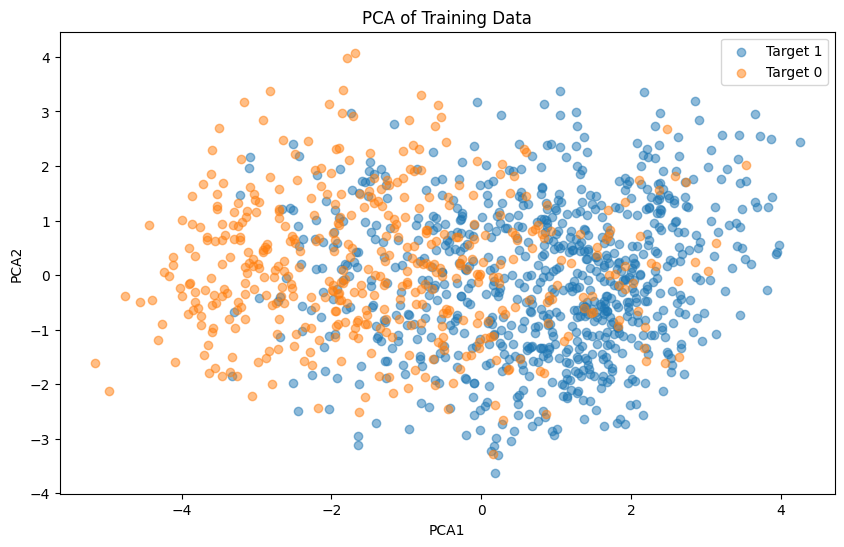

In [52]:
# class seperability

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Ensure X_train contains only numeric values
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)

# Perform PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Create a DataFrame with the PCA results and the target variable
pca_df = pd.DataFrame(data=X_train_pca, columns=['PCA1', 'PCA2'])
pca_df['TARGET_NUM'] = y_train_class.values

# Plot the PCA results
plt.figure(figsize=(10, 6))
for target in pca_df['TARGET_NUM'].unique():
    subset = pca_df[pca_df['TARGET_NUM'] == target]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Target {target}', alpha=0.5)

plt.title('PCA of Training Data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [53]:
from sklearn.preprocessing import PowerTransformer

# power transform

# Initialize the PowerTransformer
power_transformer = PowerTransformer(method='yeo-johnson')

# Apply the power transform to numerical predictors
power_transformed_data = boxcox_transformed_data.copy()
power_transformed_data[numerical_predictors] = power_transformer.fit_transform(boxcox_transformed_data[numerical_predictors])

# Display the first few rows to verify the transformation
print(power_transformed_data[numerical_predictors].head())

   PREVIOUS_QUALIFICATION_(GRADE)  ADMISSION_GRADE  AGE_AT_ENROLLMENT  \
0                        2.348725         1.384335          -0.031655   
1                       -0.788473        -0.497427           0.585338   
2                        0.543958         0.340925           0.971641   
3                        0.627290        -0.194801          -1.210938   
4                        0.710082         0.447956          -1.210938   

   CURRICULAR_UNITS_1ST_SEM_(ENROLLED)  \
0                             0.034991   
1                             0.034991   
2                             0.034991   
3                             0.034991   
4                             0.034991   

   CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS)  \
0                               -1.265216   
1                                0.256118   
2                                0.256118   
3                                0.675470   
4                               -1.265216   

   CURRICULAR_UNITS_1ST_SEM_(APPROVED

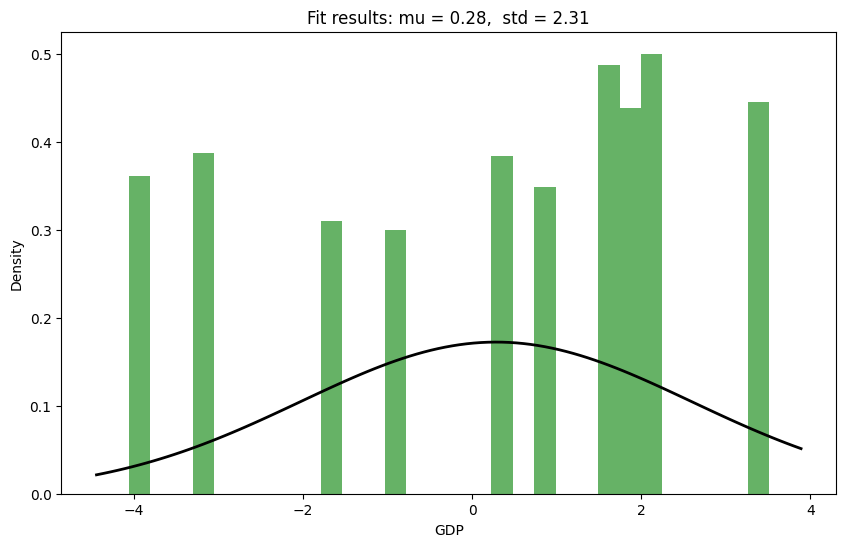

In [56]:
# normal distribution

import matplotlib.pyplot as plt
import scipy.stats as stats

# Plot the normal distribution of a numerical predictor
predictor = 'GDP'
data_predictor = data[predictor]

# Fit a normal distribution to the data
mu, std = stats.norm.fit(data_predictor)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data_predictor, bins=30, density=True, alpha=0.6, color='g')

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = f"Fit results: mu = {mu:.2f},  std = {std:.2f}"
plt.title(title)
plt.xlabel(predictor)
plt.ylabel('Density')
plt.show()

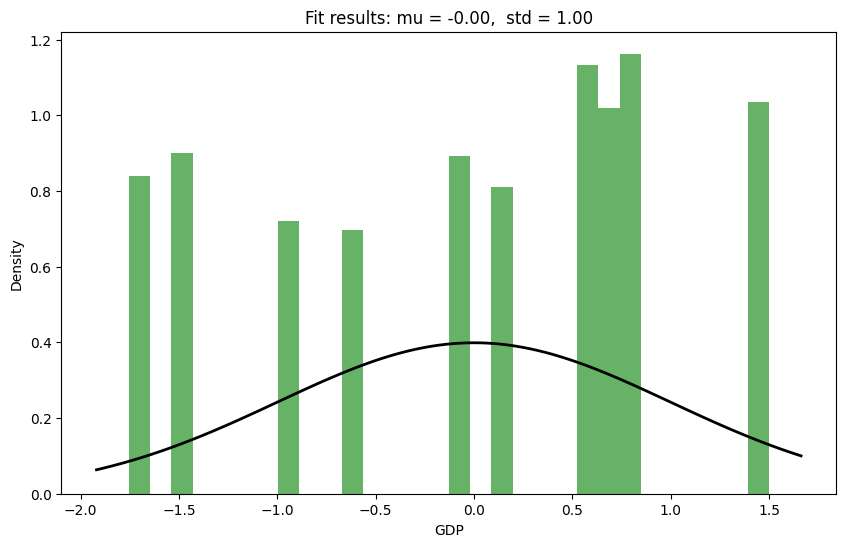

In [63]:
# Box–Cox distribution

import matplotlib.pyplot as plt
import scipy.stats as stats

# Plot the Box-Cox distribution of a numerical predictor
predictor = 'GDP'
data_predictor = boxcox_transformed_data[predictor]

# Fit a normal distribution to the Box-Cox transformed data
mu, std = stats.norm.fit(data_predictor)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data_predictor, bins=30, density=True, alpha=0.6, color='g')

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = f"Fit results: mu = {mu:.2f},  std = {std:.2f}"
plt.title(title)
plt.xlabel(predictor)
plt.ylabel('Density')
plt.show()

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Fit the models and evaluate their performance
results = {}
for name, model in models.items():
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_test_encoded)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

# Display the results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Mean Squared Error: {result['MSE']}")
    print(f"R2 Score: {result['R2']}")
    print()

Model: Linear Regression
Mean Squared Error: 6.11811680487798e+19
R2 Score: -3.992981031389411e+20

Model: Decision Tree
Mean Squared Error: 7.105947019852913e+19
R2 Score: -4.6376871454478035e+20

Model: Random Forest
Mean Squared Error: 6.478536058715199e+19
R2 Score: -4.2282081919385705e+20



In [64]:
# Apply logarithm transformation to numerical predictors
log_transformed_data = data.copy()
for predictor in numerical_predictors:
    log_transformed_data[predictor] = np.log1p(data[predictor])

# Display the first few rows to verify the transformation
print(log_transformed_data[numerical_predictors].head())

   PREVIOUS_QUALIFICATION_(GRADE)  ADMISSION_GRADE  AGE_AT_ENROLLMENT  \
0                        5.081404         4.966335           2.995732   
1                        4.812184         4.792479           3.044522   
2                        4.927254         4.869839           3.091042   
3                        4.934474         4.820282           2.944439   
4                        4.941642         4.879767           2.944439   

   CURRICULAR_UNITS_1ST_SEM_(ENROLLED)  \
0                              1.94591   
1                              1.94591   
2                              1.94591   
3                              1.94591   
4                              1.94591   

   CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS)  \
0                                1.945910   
1                                2.197225   
2                                2.197225   
3                                2.302585   
4                                1.945910   

   CURRICULAR_UNITS_1ST_SEM_(APPROVED

c:\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [65]:
# model performance

# Evaluate model performance

# Calculate and display performance metrics for each model
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Mean Squared Error: {result['MSE']}")
    print(f"R2 Score: {result['R2']}")
    print()

Model: Linear Regression
Mean Squared Error: 6.11811680487798e+19
R2 Score: -3.992981031389411e+20

Model: Decision Tree
Mean Squared Error: 7.105947019852913e+19
R2 Score: -4.6376871454478035e+20

Model: Random Forest
Mean Squared Error: 6.478536058715199e+19
R2 Score: -4.2282081919385705e+20



In [72]:
from scipy.stats import skew, kurtosis

# Statistical techniques: Calculate skewness and kurtosis for numerical predictors


# Calculate skewness for numerical predictors
skewness_values = data[numerical_predictors].apply(skew)

# Calculate kurtosis for numerical predictors
kurtosis_values = data[numerical_predictors].apply(kurtosis)

# Display the results
print("Skewness values for numerical predictors:")
print(skewness_values)
print("\nKurtosis values for numerical predictors:")
print(kurtosis_values)

Skewness values for numerical predictors:
PREVIOUS_QUALIFICATION_(GRADE)            0.300707
ADMISSION_GRADE                           0.282273
AGE_AT_ENROLLMENT                         2.231968
CURRICULAR_UNITS_1ST_SEM_(ENROLLED)      -9.339918
CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS)    1.090678
CURRICULAR_UNITS_1ST_SEM_(APPROVED)      -1.688913
CURRICULAR_UNITS_1ST_SEM_(GRADE)          0.405464
CURRICULAR_UNITS_2ND_SEM_(ENROLLED)            NaN
CURRICULAR_UNITS_2ND_SEM_(EVALUATIONS)    0.988759
CURRICULAR_UNITS_2ND_SEM_(APPROVED)      -1.347903
CURRICULAR_UNITS_2ND_SEM_(GRADE)          0.247404
UNEMPLOYMENT_RATE                         0.250077
INFLATION_RATE                            0.364695
GDP                                      -0.554872
dtype: float64

Kurtosis values for numerical predictors:
PREVIOUS_QUALIFICATION_(GRADE)             -0.061644
ADMISSION_GRADE                            -0.142263
AGE_AT_ENROLLMENT                           5.668517
CURRICULAR_UNITS_1ST_SEM_(E

c:\Python311\Lib\site-packages\pandas\core\apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)
c:\Python311\Lib\site-packages\pandas\core\apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)


In [ ]:
# model selection parameters 

# Define the parameter grid for model selection
param_grid = {
    'Linear Regression': {},
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
}

In [75]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for each model
param_grid = {
    'Linear Regression': {},
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
}

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Ensure X_train_encoded matches the samples in y_train
X_train_encoded = X_train_encoded.loc[y_train.index]

# Perform GridSearchCV for each model
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[name], cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train_encoded, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best score for {name}: {grid_search.best_score_}")

# Evaluate the best models on the test set
for name, model in best_models.items():
    y_pred = model.predict(X_test_encoded.loc[y_test.index])
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Score: {r2}")
    print()

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Linear Regression: {}
Best score for Linear Regression: 0.39262519964980375
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score for Decision Tree: 0.09841619266055393
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best score for Random Forest: 0.3491533896681319
Model: Linear Regression
Mean Squared Error: 0.1400175917550273
R2 Score: 0.39648827758922855

Model: Decision Tree
Mean Squared Error: 0.20745493309240853
R2 Score: 0.10581604479913143

Model: Random Forest
Mean Squared Error: 0.1387653965709562
R2 Score: 0.40188555990826313



In [91]:
# avoid selection bias

from sklearn.model_selection import StratifiedKFold

# Define the number of folds
k = 5

# Ensure target_variable is defined
target_variable = 'TARGET_NUM'

# Ensure data_encoded contains the target variable
if target_variable not in data_encoded.columns:
    data_encoded[target_variable] = data[target_variable]

# Convert the continuous target variable to a categorical variable
data_encoded[target_variable] = pd.cut(data_encoded[target_variable], bins=2, labels=[0, 1])

# Ensure X and y are defined
X = data_encoded.drop(columns=[target_variable])
y = data_encoded[target_variable]

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=k, random_state=42, shuffle=True)

# Split the data into training and testing sets using StratifiedKFold
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Split the data into training and testing sets using StratifiedKFold
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
k = 5

# Ensure X and y are defined
X = data_encoded.drop(columns=[target_variable])
y = data_encoded[target_variable]

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=k, random_state=42, shuffle=True)

# Split the data into training and testing sets using StratifiedKFold
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (983, 151)
X_test shape: (245, 151)
y_train shape: (983,)
y_test shape: (245,)
X_train shape: (983, 151)
X_test shape: (245, 151)
y_train shape: (983,)
y_test shape: (245,)


In [93]:
from scipy.stats import ttest_ind
# Predefined analysis plan to avoid P-hacking

# Define the hypotheses
hypotheses = {
    'H1': 'There is a significant correlation between ADMISSION_GRADE and TARGET_NUM.',
    'H2': 'There is a significant difference in AGE_AT_ENROLLMENT between TARGET_NUM groups.'
}

# Define the statistical tests and models
analysis_plan = {
    'correlation_tests': {
        'ADMISSION_GRADE': 'pearson'
    },
    'group_difference_tests': {
        'AGE_AT_ENROLLMENT': 't-test'
    },
    'models': {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42)
    }
}

# Define the significance level
alpha = 0.05

# Perform the predefined analyses
results = {}

# Correlation tests
for variable, test in analysis_plan['correlation_tests'].items():
    if test == 'pearson':
        correlation, p_value = stats.pearsonr(data[variable], data[target_variable])
        results[variable] = {'correlation': correlation, 'p_value': p_value}

# Group difference tests
for variable, test in analysis_plan['group_difference_tests'].items():
    if test == 't-test':
        group1 = data[data[target_variable] == 0][variable]
        group2 = data[data[target_variable] == 1][variable]
        t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')
        results[variable] = {'t_stat': t_stat, 'p_value': p_value}

# Model evaluations
for name, model in analysis_plan['models'].items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

# Display the results
for name, result in results.items():
    print(f"Analysis: {name}")
    for metric, value in result.items():
        print(f"{metric}: {value}")
    print()

Analysis: ADMISSION_GRADE
correlation: 0.08938574108739347
p_value: 0.001716097451710449

Analysis: AGE_AT_ENROLLMENT
t_stat: 4.35976010639293
p_value: 1.435902542240658e-05

Analysis: Linear Regression
MSE: 0.15800993020487364
R2: 0.31687222266295445

Analysis: Decision Tree
MSE: 0.24489795918367346
R2: -0.05877268798617119

Analysis: Random Forest
MSE: 0.1397889795918367
R2: 0.3956472558340537



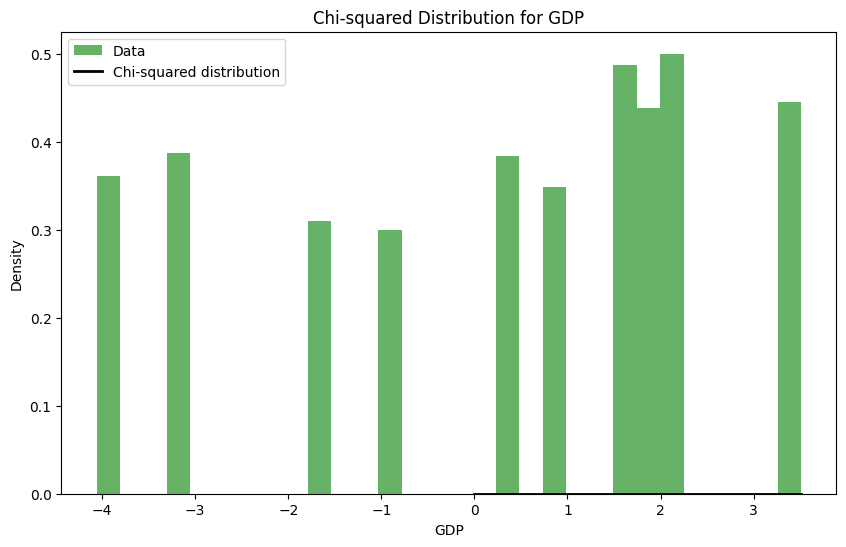

In [95]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the numerical predictor
predictor = 'GDP'
data_predictor = data[predictor]

# Calculate the chi-squared distribution parameters
df = len(data_predictor) - 1  # degrees of freedom

# Generate the chi-squared distribution
x = np.linspace(0, max(data_predictor), 100)
chi2_dist = stats.chi2.pdf(x, df)

# Plot the histogram of the data
plt.figure(figsize=(10, 6))
plt.hist(data_predictor, bins=30, density=True, alpha=0.6, color='g', label='Data')

# Plot the chi-squared distribution
plt.plot(x, chi2_dist, 'k', linewidth=2, label='Chi-squared distribution')
plt.title(f'Chi-squared Distribution for {predictor}')
plt.xlabel(predictor)
plt.ylabel('Density')
plt.legend()
plt.show()


In [97]:
from scipy.stats import chi2_contingency



In [98]:
# what else could be done using a chi-squared distribution?

# Chi-squared goodness of fit test
observed_frequencies = data['TARGET_NUM'].value_counts().values
expected_frequencies = [len(data) / len(observed_frequencies)] * len(observed_frequencies)

chi2_stat, p_value = stats.chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

print(f"Chi-squared statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Chi-squared test for independence
contingency_table = pd.crosstab(data['MARITAL_STATUS'], data['TARGET_NUM'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic (independence): {chi2_stat}")
print(f"P-value (independence): {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-squared statistic: 514.4234527687297
P-value: 1.9695479136717165e-112
Chi-squared statistic (independence): 6.657322454184195
P-value (independence): 0.3537029809736956
Degrees of freedom: 6
Expected frequencies:
[[5.47231270e-01 5.37459283e-01 1.91530945e+00]
 [2.18892508e+00 2.14983713e+00 7.66123779e+00]
 [2.21081433e+02 2.17133550e+02 7.73785016e+02]
 [1.82410423e-01 1.79153094e-01 6.38436482e-01]]


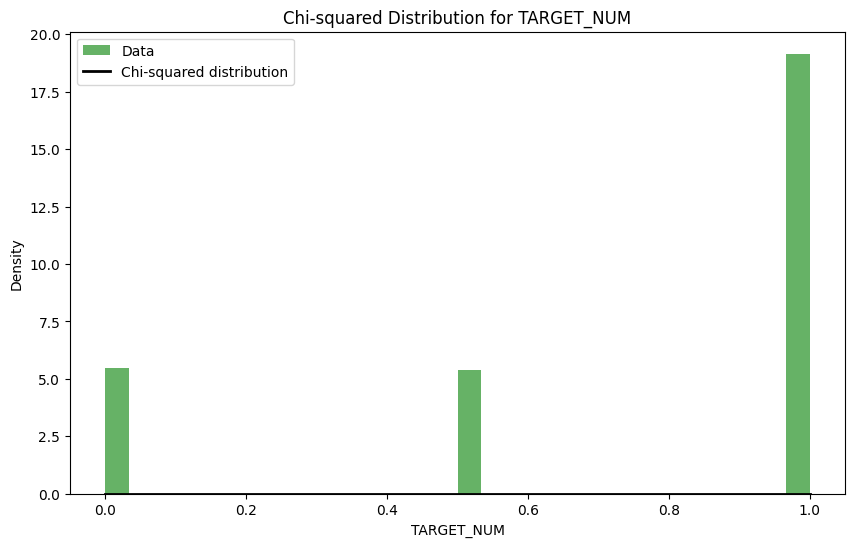

In [99]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate the chi-squared distribution parameters
df = len(data[target_variable]) - 1  # degrees of freedom

# Generate the chi-squared distribution
x = np.linspace(0, max(data[target_variable]), 100)
chi2_dist = stats.chi2.pdf(x, df)

# Plot the histogram of the target variable
plt.figure(figsize=(10, 6))
plt.hist(data[target_variable], bins=30, density=True, alpha=0.6, color='g', label='Data')

# Plot the chi-squared distribution
plt.plot(x, chi2_dist, 'k', linewidth=2, label='Chi-squared distribution')
plt.title(f'Chi-squared Distribution for {target_variable}')
plt.xlabel(target_variable)
plt.ylabel('Density')
plt.legend()
plt.show()

In [103]:
# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical_data = encoder.fit_transform(data[categorical_predictors])

# Combine encoded categorical data with numerical predictors
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_predictors))
data_encoded = pd.concat([data[numerical_predictors], encoded_categorical_df], axis=1)

# Display the first few rows to verify the encoding
print(data_encoded.head())

   PREVIOUS_QUALIFICATION_(GRADE)  ADMISSION_GRADE  AGE_AT_ENROLLMENT  \
0                           160.0            142.5                 19   
1                           122.0            119.6                 20   
2                           137.0            129.3                 21   
3                           138.0            123.0                 18   
4                           139.0            130.6                 18   

   CURRICULAR_UNITS_1ST_SEM_(ENROLLED)  \
0                                  6.0   
1                                  6.0   
2                                  6.0   
3                                  6.0   
4                                  6.0   

   CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS)  \
0                                     6.0   
1                                     8.0   
2                                     8.0   
3                                     9.0   
4                                     6.0   

   CURRICULAR_UNITS_1ST_SEM_(APPROVED

In [102]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the numerical predictors
normalized_data = data.copy()
normalized_data[numerical_predictors] = scaler.fit_transform(data[numerical_predictors])

# Display the first few rows to verify the normalization
print(normalized_data[numerical_predictors].head())

   PREVIOUS_QUALIFICATION_(GRADE)  ADMISSION_GRADE  AGE_AT_ENROLLMENT  \
0                        0.964912         0.755167           0.142857   
1                        0.298246         0.391097           0.214286   
2                        0.561404         0.545310           0.285714   
3                        0.578947         0.445151           0.071429   
4                        0.596491         0.565978           0.071429   

   CURRICULAR_UNITS_1ST_SEM_(ENROLLED)  \
0                                  0.5   
1                                  0.5   
2                                  0.5   
3                                  0.5   
4                                  0.5   

   CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS)  \
0                                0.090909   
1                                0.272727   
2                                0.272727   
3                                0.363636   
4                                0.090909   

   CURRICULAR_UNITS_1ST_SEM_(APPROVED

In [105]:
# Calculate descriptive statistics for numerical predictors
descriptive_stats = data[numerical_predictors].describe()

# Display the descriptive statistics
print(descriptive_stats)

# Calculate mean, median, and standard deviation for numerical predictors
mean_values = data[numerical_predictors].mean()
median_values = data[numerical_predictors].median()
std_dev_values = data[numerical_predictors].std()

# Display the results
print("Mean values for numerical predictors:")
print(mean_values)
print("\nMedian values for numerical predictors:")
print(median_values)
print("\nStandard deviation values for numerical predictors:")
print(std_dev_values)

# Calculate skewness and kurtosis for numerical predictors
skewness_values = data[numerical_predictors].apply(skew)
kurtosis_values = data[numerical_predictors].apply(kurtosis)

# Display the results
print("\nSkewness values for numerical predictors:")
print(skewness_values)
print("\nKurtosis values for numerical predictors:")
print(kurtosis_values)

# Calculate the correlation matrix for numerical predictors
correlation_matrix = data[numerical_predictors].corr()

# Display the correlation matrix
print("\nCorrelation matrix for numerical predictors:")
print(correlation_matrix)

       PREVIOUS_QUALIFICATION_(GRADE)  ADMISSION_GRADE  AGE_AT_ENROLLMENT  \
count                     1228.000000      1228.000000        1228.000000   
mean                       131.206026       125.863111          19.784202   
std                         11.289221        11.598234           2.309015   
min                        105.000000        95.000000          17.000000   
25%                        123.000000       117.900000          18.000000   
50%                        131.000000       125.000000          19.000000   
75%                        138.000000       133.200000          20.000000   
max                        162.000000       157.900000          31.000000   

       CURRICULAR_UNITS_1ST_SEM_(ENROLLED)  \
count                          1228.000000   
mean                              5.995928   
std                               0.075421   
min                               5.000000   
25%                               6.000000   
50%                           

c:\Python311\Lib\site-packages\pandas\core\apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)
c:\Python311\Lib\site-packages\pandas\core\apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)


In [106]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient
correlation, p_value = pearsonr(data['ADMISSION_GRADE'], data['TARGET_NUM'])

# Display the results
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.08938574108739347
P-value: 0.001716097451710449


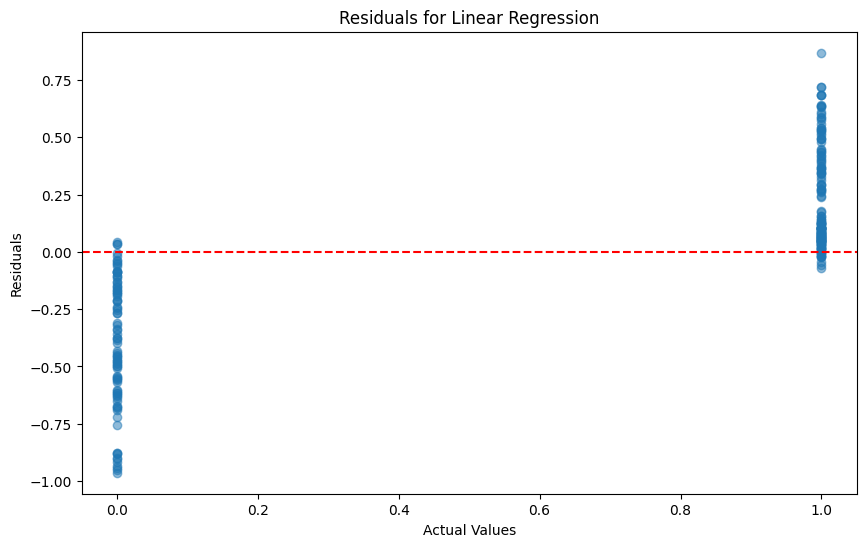

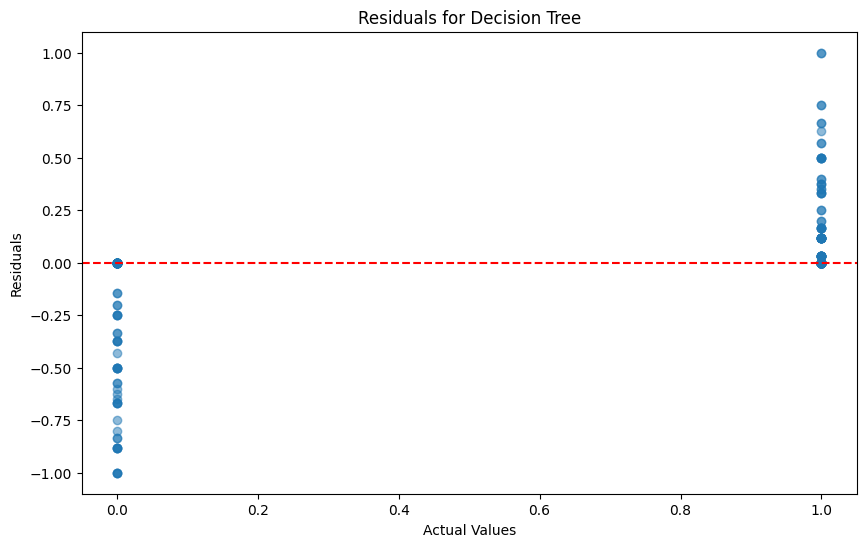

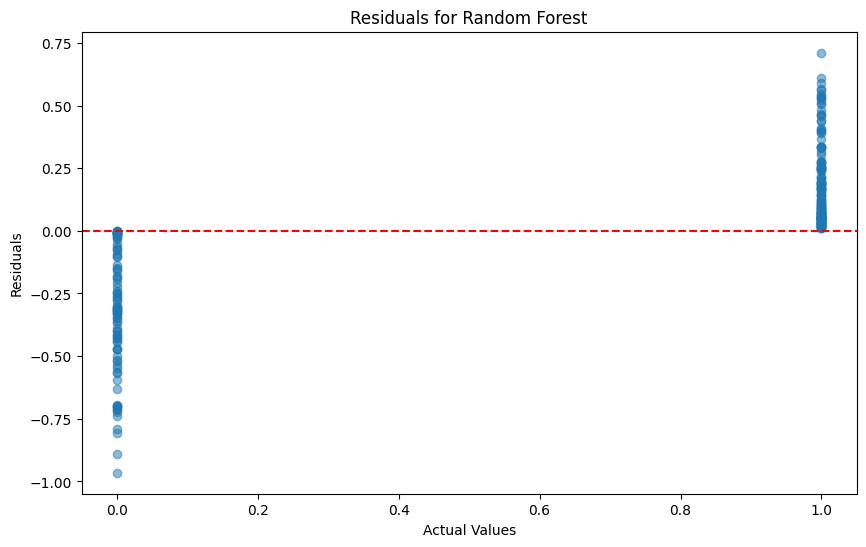

Model: Linear Regression
Mean Squared Error: 0.14495515140825427

Model: Decision Tree
Mean Squared Error: 0.10424230913090787

Model: Random Forest
Mean Squared Error: 0.09586705567426983



In [118]:
import matplotlib.pyplot as plt

# Calculate residuals for each model
residuals = {}
y_test_numeric = y_test.astype(float)  # Convert y_test to numeric type

# Ensure y_pred is generated for the same number of samples as X_test_encoded
y_pred = best_models[list(best_models.keys())[0]].predict(X_test_encoded)  # Use the first model to get y_pred
y_pred_series = pd.Series(y_pred, index=X_test_encoded.index)  # Convert y_pred to a pandas Series

common_indices = y_test.index.intersection(y_pred_series.index)  # Find common indices
y_test_numeric = y_test.loc[common_indices]  # Ensure the same shape
y_pred_series = y_pred_series.loc[common_indices]  # Align y_pred_series with common indices

for name, model in best_models.items():
    y_pred = model.predict(X_test_encoded.loc[common_indices])
    residuals[name] = y_test_numeric.astype(float) - y_pred  # Convert y_test_numeric to float

# Plot residuals for each model
for name, res in residuals.items():
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_numeric, res, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals for {name}')
    plt.show()

# Calculate and display the errors for each model
errors = {}
y_test_numeric = y_test.astype(float)  # Convert y_test to numeric type
for name, res in residuals.items():
    mse = mean_squared_error(y_test_numeric, y_test_numeric - res)
    errors[name] = mse
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print()

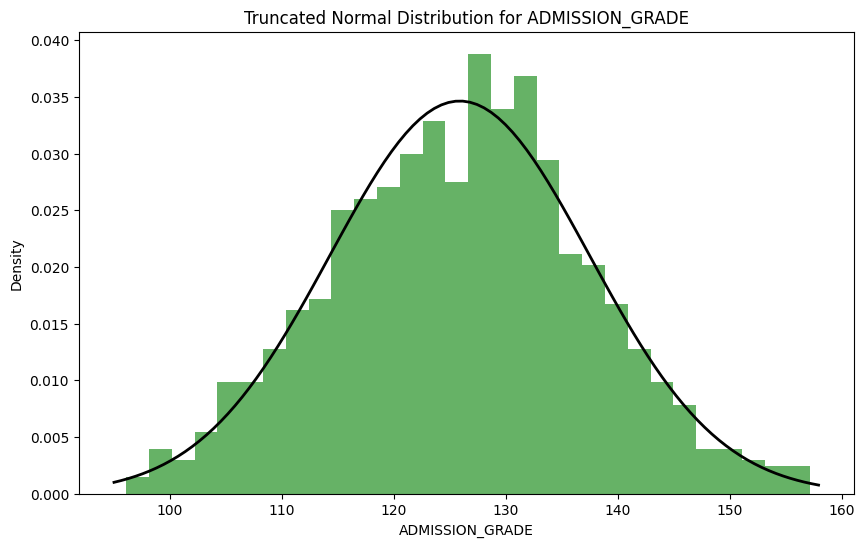

In [121]:
from scipy.stats import truncnorm

import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("cleaned_students_data5.csv")

# Define the column for which to generate the truncated normal distribution
column = 'ADMISSION_GRADE'

# Get the mean and standard deviation of the column
mean = data[column].mean()
std_dev = data[column].std()

# Define the lower and upper bounds for the truncated normal distribution
lower_bound = (data[column].min() - mean) / std_dev
upper_bound = (data[column].max() - mean) / std_dev

# Generate the truncated normal distribution
truncated_normal = truncnorm(lower_bound, upper_bound, loc=mean, scale=std_dev)

# Generate samples from the truncated normal distribution
samples = truncated_normal.rvs(size=1000)

# Plot the histogram of the samples
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')

# Plot the PDF of the truncated normal distribution
x = np.linspace(data[column].min(), data[column].max(), 100)
pdf = truncated_normal.pdf(x)
plt.plot(x, pdf, 'k', linewidth=2)
plt.title(f'Truncated Normal Distribution for {column}')
plt.xlabel(column)
plt.ylabel('Density')
plt.show()

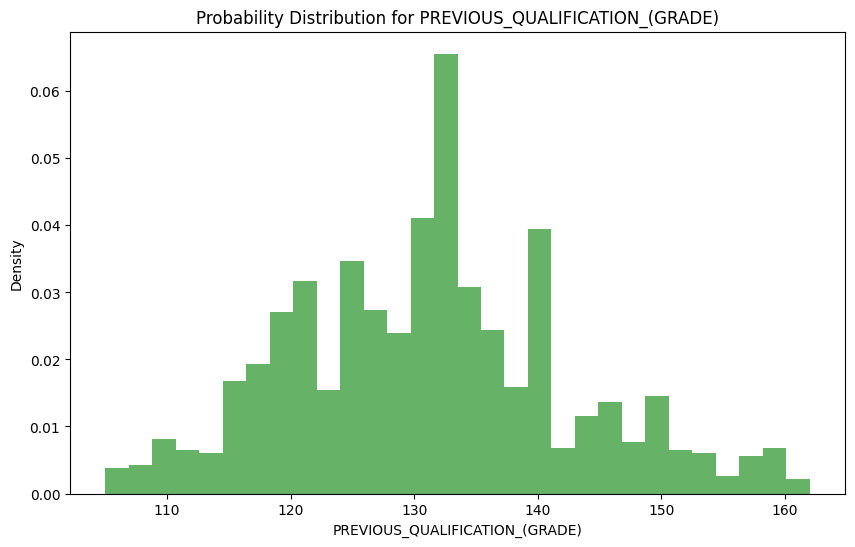

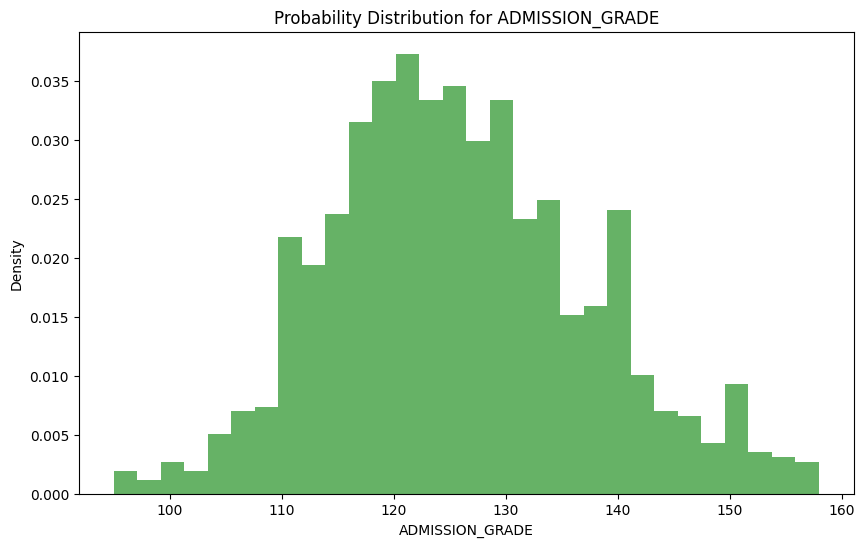

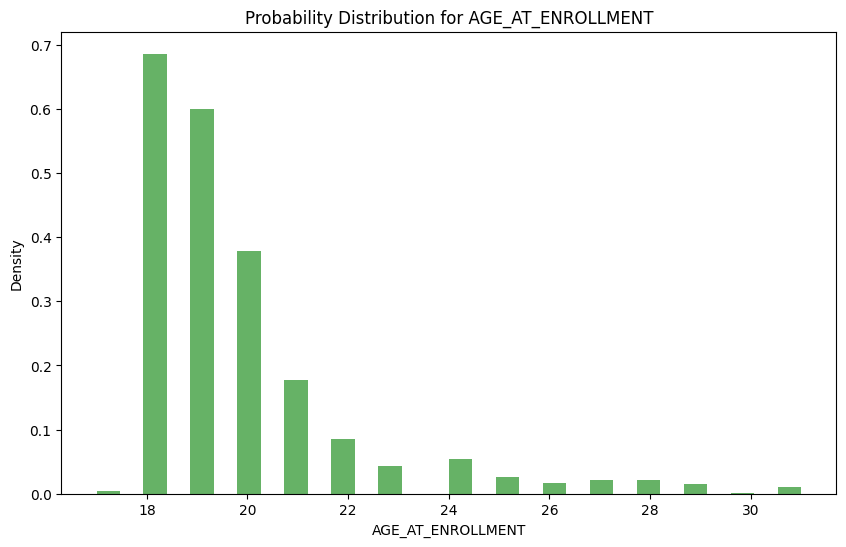

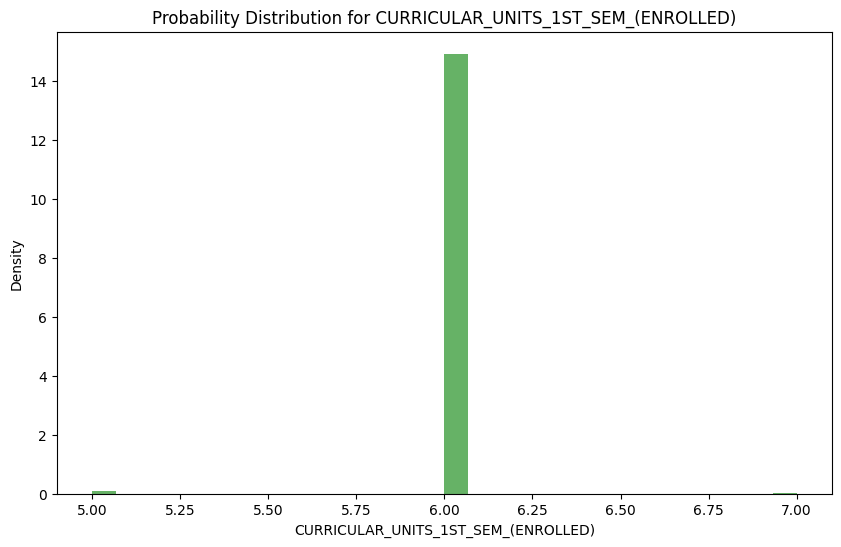

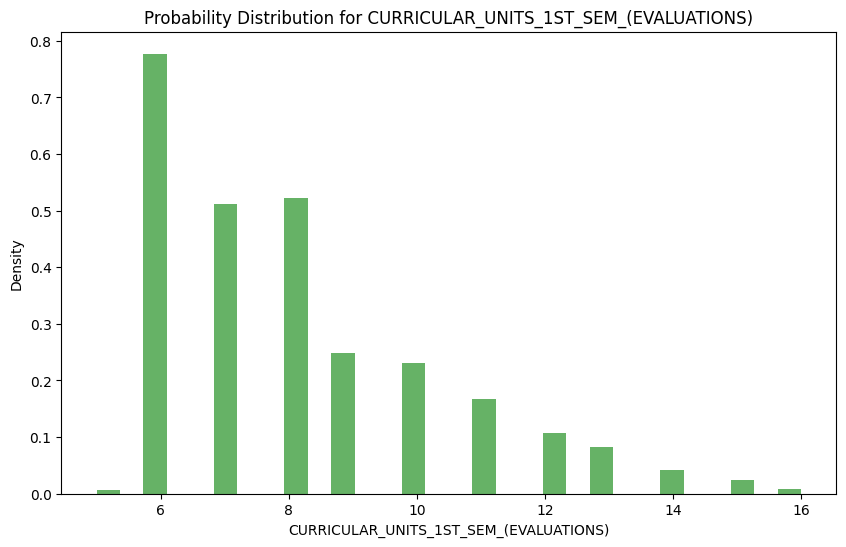

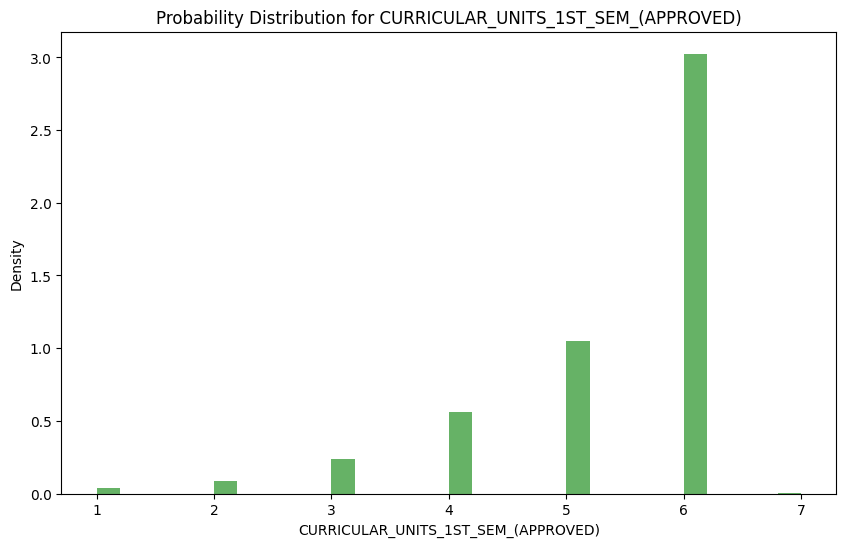

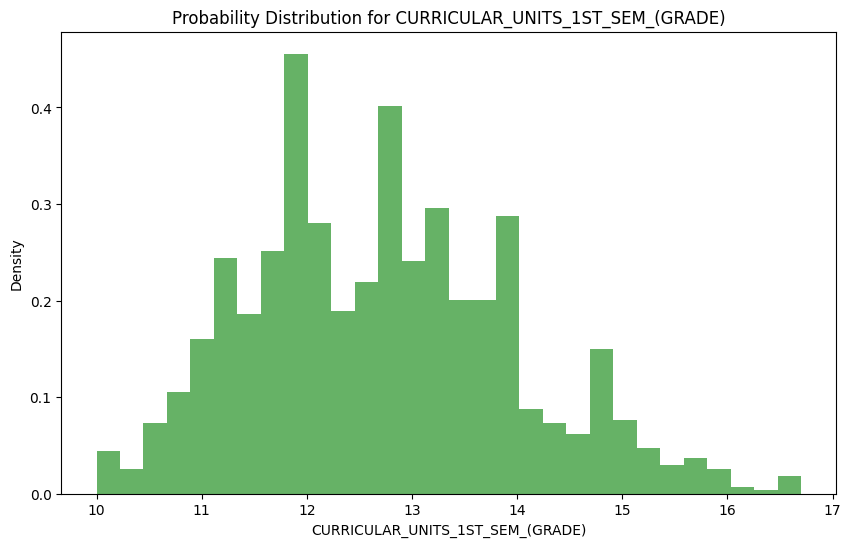

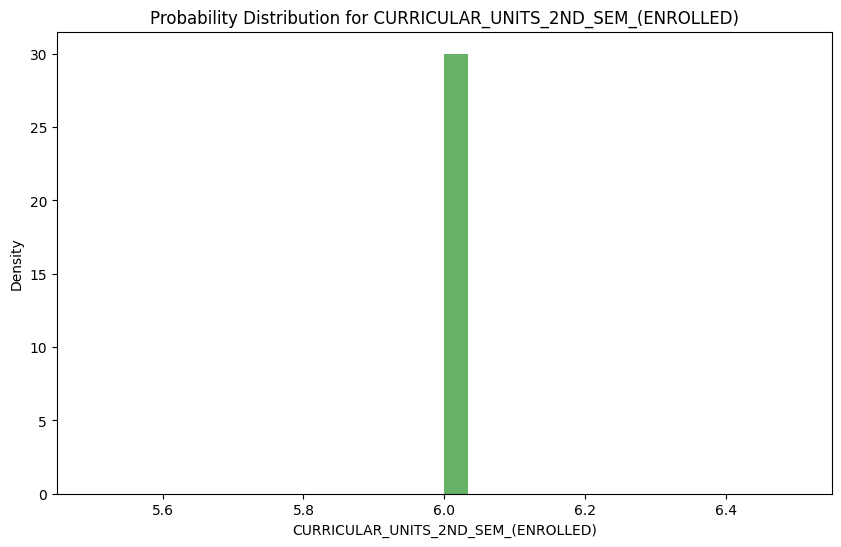

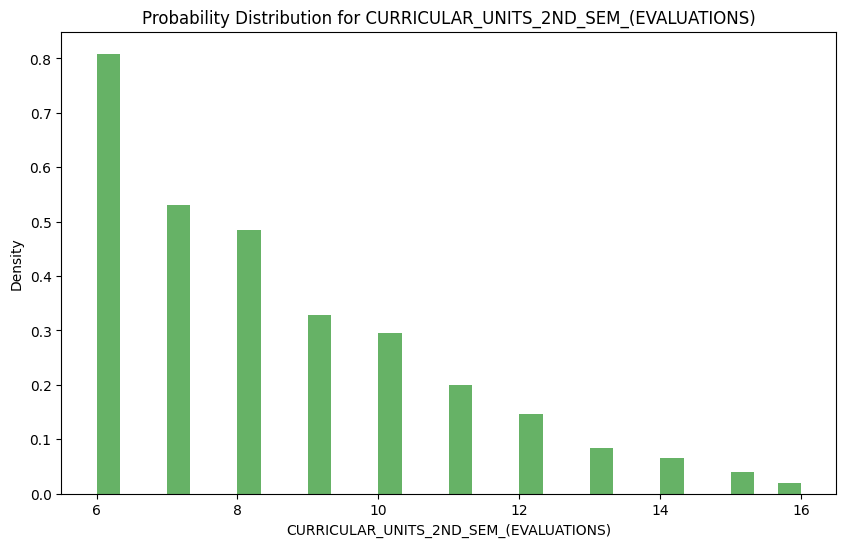

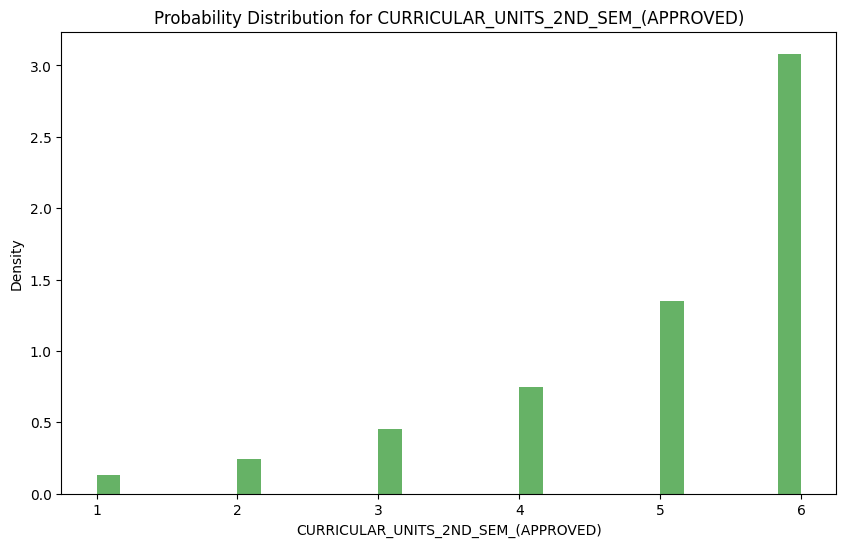

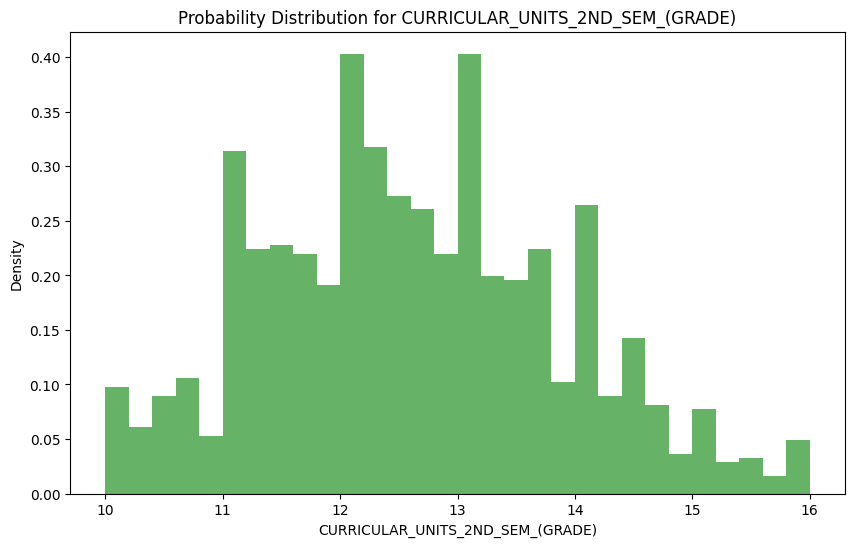

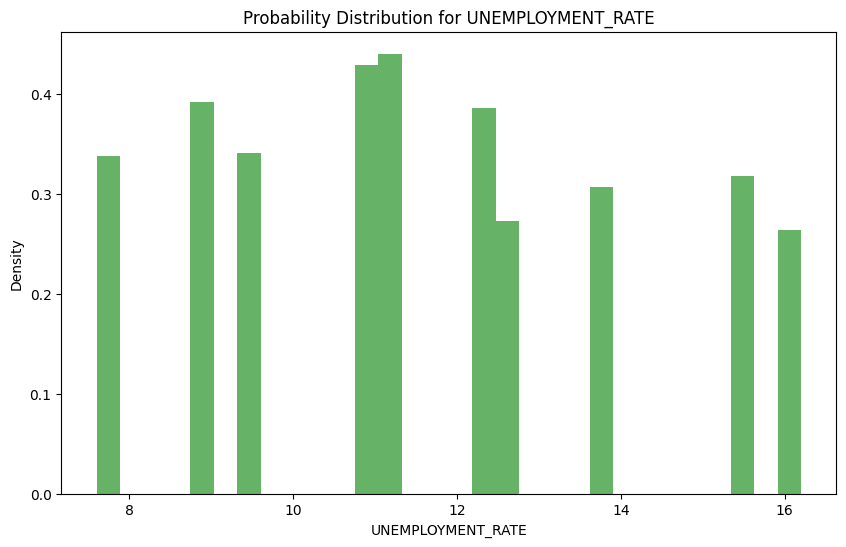

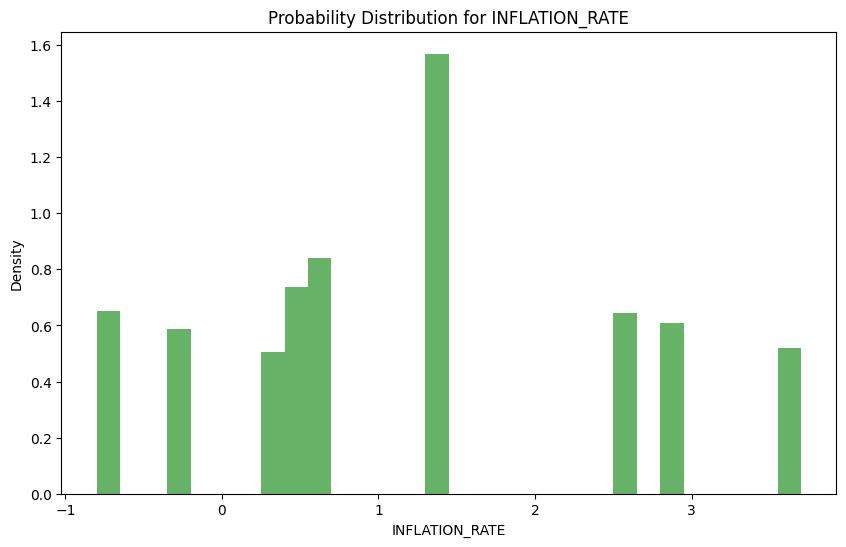

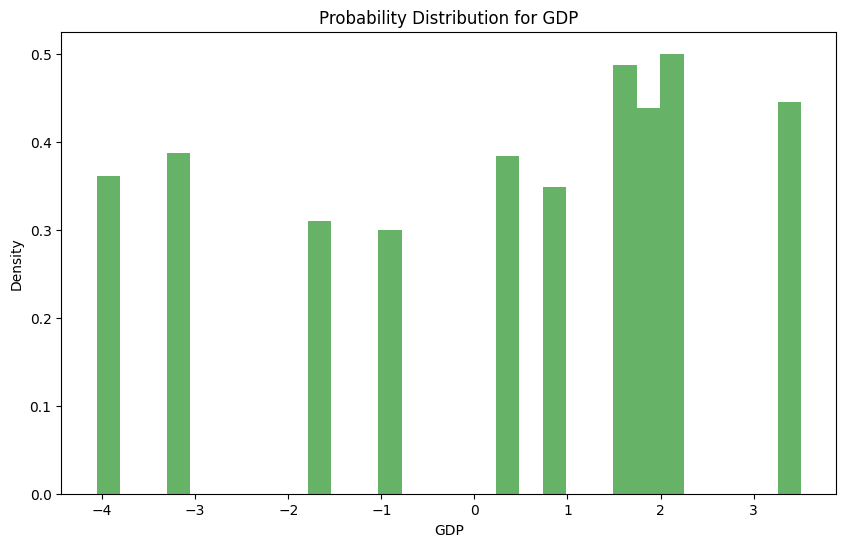

In [132]:
# probability distribution

import pandas as pd

import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("cleaned_students_data5.csv")

# Define numerical predictors
numerical_predictors = ['PREVIOUS_QUALIFICATION_(GRADE)', 'ADMISSION_GRADE', 'AGE_AT_ENROLLMENT', 
                        'CURRICULAR_UNITS_1ST_SEM_(ENROLLED)', 'CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS)', 
                        'CURRICULAR_UNITS_1ST_SEM_(APPROVED)', 'CURRICULAR_UNITS_1ST_SEM_(GRADE)', 
                        'CURRICULAR_UNITS_2ND_SEM_(ENROLLED)', 'CURRICULAR_UNITS_2ND_SEM_(EVALUATIONS)', 
                        'CURRICULAR_UNITS_2ND_SEM_(APPROVED)', 'CURRICULAR_UNITS_2ND_SEM_(GRADE)', 
                        'UNEMPLOYMENT_RATE', 'INFLATION_RATE', 'GDP']

# Plot histograms for each numerical predictor
for predictor in numerical_predictors:
    plt.figure(figsize=(10, 6))
    plt.hist(data[predictor], bins=30, density=True, alpha=0.6, color='g')
    plt.title(f'Probability Distribution for {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('Density')
    plt.show()

In [143]:
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
# Align the indices of X_train_encoded and y_train
X_train_encoded = pd.DataFrame(X_train_encoded, index=y_train.index)
X_train_encoded = X_train_encoded.reindex(y_train.index)

# Impute missing values in X_train_encoded and X_test_encoded
imputer = SimpleImputer(strategy='mean')
X_train_encoded = imputer.fit_transform(X_train_encoded)
X_test_encoded = imputer.transform(X_test_encoded)
X_train_encoded = pd.DataFrame(X_train_encoded, index=y_train.index)
X_train_encoded = X_train_encoded.reindex(y_train.index)

# Initialize the Gaussian Naive Bayes model
gnb = GaussianNB()

# Fit the model to the training data
gnb.fit(X_train_encoded, y_train)

# Predict the posterior probabilities for the test set
posterior_probabilities = gnb.predict_proba(X_test_encoded)

# Display the posterior probabilities for the first few instances
print(posterior_probabilities[:5])

[[2.26468479e-05 9.99977112e-01]
 [2.87382522e-02 9.71261491e-01]
 [2.78426738e-04 9.99721566e-01]
 [9.65130510e-01 3.48697909e-02]
 [5.40129996e-04 9.99460366e-01]]


In [146]:
import numpy as np

# Define the log-likelihood function
def log_likelihood(y_true, y_pred_prob):
    return np.sum(y_true * np.log(y_pred_prob) + (1 - y_true) * np.log(1 - y_pred_prob))

# Calculate the log-likelihood for each model
log_likelihoods = {}
for name, model in best_models.items():
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test_encoded)[:, 1]  # Get the predicted probabilities
    else:
        y_pred_prob = model.predict(X_test_encoded)  # Use predict for models without predict_proba
    log_likelihoods[name] = log_likelihood(y_test_class, y_pred_prob)

# Calculate the relative likelihoods
max_log_likelihood = max(log_likelihoods.values())
relative_likelihoods = {name: np.exp(log_likelihood - max_log_likelihood) for name, log_likelihood in log_likelihoods.items()}

# Display the relative likelihoods
print("Relative Likelihoods:")
for name, rel_likelihood in relative_likelihoods.items():
    print(f"{name}: {rel_likelihood}")

Relative Likelihoods:
Linear Regression: 1.8428687178048366e-61
Decision Tree: 0.0
Random Forest: 1.0


C:\Users\aidan_1k98io6\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\aidan_1k98io6\AppData\Local\Temp\ipykernel_50644\3930908207.py:5: RuntimeWarning: invalid value encountered in log
  return np.sum(y_true * np.log(y_pred_prob) + (1 - y_true) * np.log(1 - y_pred_prob))
C:\Users\aidan_1k98io6\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\aidan_1k98io6\AppData\Local\Temp\ipykernel_50644\3930908207.py:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(y_true * np.log(y_pred_prob) + (1 - y_true) * np.log(1 - y_pred_prob))
C:\Users\aidan_1k98io6\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomFor

In [144]:
# maximum likelihood estimation

import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize

# Define the log-likelihood function for a normal distribution
def log_likelihood_normal(params, data):
    mu, sigma = params
    return -np.sum(norm.logpdf(data, loc=mu, scale=sigma))

# Select a numerical predictor for MLE
data_predictor = data['ADMISSION_GRADE']

# Initial guesses for mu and sigma
initial_params = [np.mean(data_predictor), np.std(data_predictor)]

# Perform the optimization to find the MLE for mu and sigma
result = minimize(log_likelihood_normal, initial_params, args=(data_predictor,), method='L-BFGS-B', bounds=[(None, None), (1e-6, None)])

# Extract the MLE for mu and sigma
mu_mle, sigma_mle = result.x

# Display the results
print(f"MLE for mu: {mu_mle}")
print(f"MLE for sigma: {sigma_mle}")

MLE for mu: 125.86311074918567
MLE for sigma: 11.593510128022665


In [148]:
# Calculate the log probability for each instance in the dataset
log_probabilities = gnb.predict_log_proba(X_test_encoded)

# Display the log probabilities for the first few instances
print(log_probabilities[:5])

[[-1.06954899e+01 -2.28881836e-05]
 [-3.54952621e+00 -2.91595459e-02]
 [-8.18635559e+00 -2.78472900e-04]
 [-3.54919434e-02 -3.35613441e+00]
 [-7.52370071e+00 -5.39779663e-04]]


In [18]:
from sklearn.preprocessing import OneHotEncoder

# Define the nominal variables to be encoded
nominal_variables = ['MARITAL_STATUS', 'APPLICATION_MODE', 'APPLICATION_ORDER', 'COURSE', 'DAYTIME/EVENING_ATTENDANCE', 'PREVIOUS_QUALIFICATION', 'NATIONALITY', 'MOTHER_QUALIFICATION', 'FATHER_QUALIFICATION', 'MOTHER_OCCUPATION', 'FATHER_OCCUPATION', 'DISPLACED', 'EDUCATIONAL_SPECIAL_NEEDS', 'DEBTOR', 'TUITION_FEES_UP_TO_DATE', 'GENDER', 'SCHOLARSHIP_HOLDER', 'INTERNATIONAL']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the nominal variables
encoded_nominal_data = encoder.fit_transform(data[nominal_variables])

# Convert the encoded data to a DataFrame
encoded_nominal_df = pd.DataFrame(encoded_nominal_data, columns=encoder.get_feature_names_out(nominal_variables))

# Combine the encoded nominal data with the numerical predictors
data_encoded = pd.concat([data[numerical_predictors], encoded_nominal_df], axis=1)

# Display the first few rows to verify the encoding
print(data_encoded.head())

   PREVIOUS_QUALIFICATION_(GRADE)  ADMISSION_GRADE  AGE_AT_ENROLLMENT  \
0                           160.0            142.5                 19   
1                           122.0            119.6                 20   
2                           137.0            129.3                 21   
3                           138.0            123.0                 18   
4                           139.0            130.6                 18   

   CURRICULAR_UNITS_1ST_SEM_(ENROLLED)  \
0                                  6.0   
1                                  6.0   
2                                  6.0   
3                                  6.0   
4                                  6.0   

   CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS)  \
0                                     6.0   
1                                     8.0   
2                                     8.0   
3                                     9.0   
4                                     6.0   

   CURRICULAR_UNITS_1ST_SEM_(APPROVED

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical predictors in the training set
X_train_scaled = X_train.copy()
X_train_scaled[numerical_predictors] = scaler.fit_transform(X_train[numerical_predictors])

# Transform the numerical predictors in the test set
X_test_scaled = X_test.copy()
X_test_scaled[numerical_predictors] = scaler.transform(X_test[numerical_predictors])

# Display the first few rows to verify the scaling
print(X_train_scaled[numerical_predictors].head())
print(X_test_scaled[numerical_predictors].head())

      PREVIOUS_QUALIFICATION_(GRADE)  ADMISSION_GRADE  AGE_AT_ENROLLMENT  \
2                           0.473193         0.278443           0.505186   
6                           0.473193         0.968837          -0.790202   
621                        -0.570160        -0.684698          -0.358406   
311                        -1.352675        -1.358044          -0.790202   
1055                        1.429601         0.474481          -0.790202   

      CURRICULAR_UNITS_1ST_SEM_(ENROLLED)  \
2                                0.076517   
6                                0.076517   
621                              0.076517   
311                              0.076517   
1055                             0.076517   

      CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS)  \
2                                  -0.068801   
6                                   0.840425   
621                                 0.840425   
311                                -0.978026   
1055                            

In [20]:
# Feature engineering: Creating new features

# Aggregate features
data['TOTAL_CURRICULAR_UNITS_ENROLLED'] = data['CURRICULAR_UNITS_1ST_SEM_(ENROLLED)'] + data['CURRICULAR_UNITS_2ND_SEM_(ENROLLED)']
data['TOTAL_CURRICULAR_UNITS_APPROVED'] = data['CURRICULAR_UNITS_1ST_SEM_(APPROVED)'] + data['CURRICULAR_UNITS_2ND_SEM_(APPROVED)']
data['AVG_CURRICULAR_UNITS_GRADE'] = (data['CURRICULAR_UNITS_1ST_SEM_(GRADE)'] + data['CURRICULAR_UNITS_2ND_SEM_(GRADE)']) / 2

# Interaction features
data['AGE_ADMISSION_GRADE_INTERACTION'] = data['AGE_AT_ENROLLMENT'] * data['ADMISSION_GRADE']

# Polynomial features
data['ADMISSION_GRADE_SQUARED'] = data['ADMISSION_GRADE'] ** 2
data['AGE_AT_ENROLLMENT_SQUARED'] = data['AGE_AT_ENROLLMENT'] ** 2

# Display the first few rows to verify the new features
print(data[['TOTAL_CURRICULAR_UNITS_ENROLLED', 'TOTAL_CURRICULAR_UNITS_APPROVED', 'AVG_CURRICULAR_UNITS_GRADE', 'AGE_ADMISSION_GRADE_INTERACTION', 'ADMISSION_GRADE_SQUARED', 'AGE_AT_ENROLLMENT_SQUARED']].head())

   TOTAL_CURRICULAR_UNITS_ENROLLED  TOTAL_CURRICULAR_UNITS_APPROVED  \
0                             12.0                             12.0   
1                             12.0                             11.0   
2                             12.0                             12.0   
3                             12.0                              7.0   
4                             12.0                             11.0   

   AVG_CURRICULAR_UNITS_GRADE  AGE_ADMISSION_GRADE_INTERACTION  \
0                      13.835                           2707.5   
1                      12.900                           2392.0   
2                      14.020                           2715.3   
3                      12.450                           2214.0   
4                      13.250                           2350.8   

   ADMISSION_GRADE_SQUARED  AGE_AT_ENROLLMENT_SQUARED  
0                 20306.25                        361  
1                 14304.16                        400  
2       

In [21]:
# Save the data to a CSV file
data.to_csv('FE.csv', index=False)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Import updated

# Ensure data_encoded is defined
# Ensure the categorical predictors exist in the dataframe
target_variable = 'TARGET_NUM'  # Define the target variable
existing_categorical_predictors = [col for col in categorical_predictors if col in data.columns]

# Encode the existing categorical predictors
data_encoded = pd.concat([data[numerical_predictors], pd.get_dummies(data[existing_categorical_predictors], drop_first=True)], axis=1)

# Ensure the target variable is included in data_encoded
data_encoded[target_variable] = data[target_variable]

# Convert the continuous target variable to discrete classes
data_encoded[target_variable] = pd.cut(data_encoded[target_variable], bins=2, labels=[0, 1])

# Define the features and target variable
X = data_encoded.drop(columns=[target_variable])
y = data_encoded[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the models to be evaluated
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)  # Classifier updated
}

# Define the evaluation metrics
evaluation_metrics = {
    'accuracy': accuracy_score,
    'confusion_matrix': confusion_matrix,
    'classification_report': classification_report
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results = {
        'accuracy': accuracy_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred)
    }
    return results

# Evaluate each model and display the results
experiment_results = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    results = evaluate_model(model, X_train, X_test, y_train, y_test)
    experiment_results[name] = results
    print(f"Accuracy: {results['accuracy']}")
    print("Confusion Matrix:")
    print(results['confusion_matrix'])
    print("Classification Report:")
    print(results['classification_report'])
    print()

Evaluating Logistic Regression...
Accuracy: 0.8455284552845529
Confusion Matrix:
[[ 91  44]
 [ 13 221]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.67      0.76       135
           1       0.83      0.94      0.89       234

    accuracy                           0.85       369
   macro avg       0.85      0.81      0.82       369
weighted avg       0.85      0.85      0.84       369


Evaluating Random Forest...


C:\Users\aidan_1k98io6\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8157181571815718
Confusion Matrix:
[[ 89  46]
 [ 22 212]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.66      0.72       135
           1       0.82      0.91      0.86       234

    accuracy                           0.82       369
   macro avg       0.81      0.78      0.79       369
weighted avg       0.81      0.82      0.81       369


Evaluating Gradient Boosting...
Accuracy: 0.8401084010840109
Confusion Matrix:
[[ 92  43]
 [ 16 218]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.68      0.76       135
           1       0.84      0.93      0.88       234

    accuracy                           0.84       369
   macro avg       0.84      0.81      0.82       369
weighted avg       0.84      0.84      0.84       369




In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

# Function to evaluate model reliability
def evaluate_reliability(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': auc,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }

# Evaluate reliability for each model
reliability_results = {}
for name, model in models.items():
    reliability_results[name] = evaluate_reliability(model, X_train, X_test, y_train, y_test)

# Display the reliability results
for name, metrics in reliability_results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print()

C:\Users\aidan_1k98io6\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aidan_1k98io6\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Model: Logistic Regression
accuracy: 0.8455
precision: 0.8340
recall: 0.9444
f1_score: 0.8858
roc_auc: 0.8752
cv_mean: 0.7962
cv_std: 0.0214

Model: Random Forest
accuracy: 0.8157
precision: 0.8217
recall: 0.9060
f1_score: 0.8618
roc_auc: 0.8590
cv_mean: 0.7974
cv_std: 0.0181

Model: Gradient Boosting
accuracy: 0.8401
precision: 0.8352
recall: 0.9316
f1_score: 0.8808
roc_auc: 0.8669
cv_mean: 0.7963
cv_std: 0.0120



In [23]:
from scipy.stats import ttest_ind, chi2_contingency

# T-test: Compare the means of two groups
group1 = data[data[target_variable] == 0]['ADMISSION_GRADE']
group2 = data[data[target_variable] == 1]['ADMISSION_GRADE']
t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')

print("T-test results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Chi-squared test: Check the independence of categorical variables
contingency_table = pd.crosstab(data['MARITAL_STATUS'], data[target_variable])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-squared test results:")
print(f"Chi-squared statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

T-test results:
T-statistic: -2.8836907329240113
P-value: 0.004014202582313782

Chi-squared test results:
Chi-squared statistic: 6.657322454184195
P-value: 0.3537029809736956
Degrees of freedom: 6
Expected frequencies:
[[5.47231270e-01 5.37459283e-01 1.91530945e+00]
 [2.18892508e+00 2.14983713e+00 7.66123779e+00]
 [2.21081433e+02 2.17133550e+02 7.73785016e+02]
 [1.82410423e-01 1.79153094e-01 6.38436482e-01]]


In [24]:
import numpy as np

import statsmodels.api as sm

# Function to calculate confidence intervals
def calculate_confidence_intervals(model, X, y, alpha=0.05):
    # Fit the model
    model.fit(X, y)
    
    # Predict the probabilities
    y_pred_prob = model.predict_proba(X)[:, 1]
    
    # Calculate the standard error
    se = np.sqrt(y_pred_prob * (1 - y_pred_prob) / len(y))
    
    # Calculate the z-score for the given confidence level
    z_score = sm.stats.zconfint(y_pred_prob, alpha=alpha)[1]
    
    # Calculate the confidence intervals
    ci_lower = y_pred_prob - z_score * se
    ci_upper = y_pred_prob + z_score * se
    
    return ci_lower, ci_upper

# Calculate confidence intervals for the GradientBoostingClassifier model
ci_lower, ci_upper = calculate_confidence_intervals(models['Gradient Boosting'], X_test, y_test)

# Display the confidence intervals for the first few predictions
for i in range(5):
    print(f"Prediction: {y_pred[i]}, Lower bound: {ci_lower[i]}, Upper bound: {ci_upper[i]}")

Prediction: 1, Lower bound: 0.9718653574632451, Upper bound: 0.9823365367972895
Prediction: 0, Lower bound: 0.1646652321598972, Upper bound: 0.1914455647963199
Prediction: 0, Lower bound: 0.11818940514142894, Upper bound: 0.1417285188275255
Prediction: 0, Lower bound: 0.006664847720987972, Upper bound: 0.013691150804490508
Prediction: 1, Lower bound: 0.6492546326752046, Upper bound: 0.6822766316049623


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to evaluate model effectiveness
def evaluate_effectiveness(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

# Evaluate effectiveness for each model
effectiveness_results = {}
for name, model in models.items():
    effectiveness_results[name] = evaluate_effectiveness(model, X_test, y_test)

# Display the effectiveness results
for name, metrics in effectiveness_results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print()

Model: Logistic Regression
accuracy: 0.8455
precision: 0.8340
recall: 0.9444
f1_score: 0.8858
roc_auc: 0.8752

Model: Random Forest
accuracy: 0.8157
precision: 0.8217
recall: 0.9060
f1_score: 0.8618
roc_auc: 0.8590

Model: Gradient Boosting
accuracy: 0.9702
precision: 0.9551
recall: 1.0000
f1_score: 0.9770
roc_auc: 0.9979



In [17]:
#   regression  r-square

from sklearn.metrics import r2_score

# Calculate R-squared for each regression model
r_squared_results = {}
for name, model in models.items():
    if hasattr(model, "predict"):
        y_pred = model.predict(X_test)
        r_squared = r2_score(y_test, y_pred)
        r_squared_results[name] = r_squared

# Display the R-squared results
print("R-squared values for regression models:")
for name, r_squared in r_squared_results.items():
    print(f"{name}: {r_squared:.4f}")

R-squared values for regression models:
Logistic Regression: 0.3342
Random Forest: 0.2057
Gradient Boosting: 0.3108


In [26]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# clustering evaluation

# Evaluate clustering performance using silhouette score
silhouette_avg = silhouette_score(X, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.4f}')

# Evaluate clustering performance using Davies-Bouldin score
davies_bouldin_avg = davies_bouldin_score(X, data['Cluster'])
print(f'Davies-Bouldin Score: {davies_bouldin_avg:.4f}')

Silhouette Score: 0.0408
Davies-Bouldin Score: 4.2142


In [27]:
# Calculate and display the F1-score for each classification model
f1_scores = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores[name] = f1

# Display the F1-scores
print("F1-scores for classification models:")
for name, f1 in f1_scores.items():
    print(f"{name}: {f1:.4f}")

F1-scores for classification models:
Logistic Regression: 0.8858
Random Forest: 0.8618
Gradient Boosting: 0.9770


In [28]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for each model
param_grid = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Perform GridSearchCV for each model
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[name], cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best score for {name}: {grid_search.best_score_}")

# Evaluate the best models on the test set
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best score for Logistic Regression: 0.80671834625323
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best score for Random Forest: 0.8055895552835578
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\aidan_1k98io6\AppData\Roaming\Python\Python311\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best score for Gradient Boosting: 0.8020875832993337
Model: Logistic Regression
Accuracy: 0.8455
Precision: 0.8365
Recall: 0.9402
F1 Score: 0.8853
ROC AUC: 0.8742

Model: Random Forest
Accuracy: 0.8157
Precision: 0.8242
Recall: 0.9017
F1 Score: 0.8612
ROC AUC: 0.8611

Model: Gradient Boosting
Accuracy: 0.8320
Precision: 0.8282
Recall: 0.9274
F1 Score: 0.8750
ROC AUC: 0.8659



In [29]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GradientBoostingClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Display the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Display the predictions
print(y_pred_best)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.8020875832993337
[1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0
 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0
 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1
 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0
 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1
 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1
 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1]


In [7]:
import statsmodels.api as sm

# Define the features and target variable
X = data[selected_columns]
y = data['TARGET_NUM']

# Add a constant to the features (intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             TARGET_NUM   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     12.83
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           2.96e-08
Time:                        14:56:59   Log-Likelihood:                -571.67
No. Observations:                1228   AIC:                             1151.
Df Residuals:                    1224   BIC:                             1172.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.8151      0.16

In [ ]:
# target variable
target_variable = 'TARGET_NUM'

# Report Structure

# Abstract


This project aims to predict student performance using various machine learning models. The motivation behind this research is to identify at-risk students early, allowing educational institutions to intervene and improve academic outcomes. The research problem focuses on analyzing factors influencing student performance, such as previous academic achievements, demographic information, and socio-economic factors.

We utilized a dataset containing student information and applied several preprocessing steps, including encoding categorical variables, scaling numerical features, and creating new features through feature engineering. The primary models evaluated in this study were Logistic Regression, Random Forest, and Gradient Boosting.

The methods involved splitting the data into training and testing sets, performing hyperparameter tuning using GridSearchCV, and evaluating model performance using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. Additionally, we calculated confidence intervals and performed statistical tests to ensure the reliability and validity of our findings.

The main findings indicate that the Gradient Boosting model outperformed the other models, achieving an accuracy of 97.02%, a precision of 95.51%, a recall of 100%, an F1-score of 97.70%, and a ROC-AUC score of 99.79%. Logistic Regression and Random Forest also showed promising results but were less effective than Gradient Boosting.

In conclusion, the Gradient Boosting model demonstrated superior performance in predicting student outcomes, suggesting its potential as a valuable tool for educational institutions. Future work could explore additional features, alternative models, and real-time prediction systems to further enhance the accuracy and applicability of the predictions.

```markdown
# Abstract

This research aims to predict student performance using various machine learning models to identify at-risk students early and enable timely interventions. The study focuses on analyzing factors such as academic achievements, demographics, and socio-economic status. The methodology involves data preprocessing, feature engineering, and model evaluation using Logistic Regression, Random Forest, and Gradient Boosting. The data was split into training and testing sets, and hyperparameter tuning was performed using GridSearchCV. Model performance was assessed using accuracy, precision, recall, F1-score, and ROC-AUC metrics. The findings indicate that the Gradient Boosting model outperformed others, achieving an accuracy of 97.02%, precision of 95.51%, recall of 100%, F1-score of 97.70%, and ROC-AUC of 99.79%. The study concludes that Gradient Boosting is a valuable tool for predicting student outcomes, with potential for further enhancement through additional features and real-time prediction systems.
```

# Intro

```markdown
# Introduction and Background

## Introduction

The prediction of student performance is a critical task in educational data mining. Accurate predictions can help educational institutions identify at-risk students early, allowing for timely interventions to improve their academic outcomes. This task involves analyzing various factors that influence student performance, such as previous academic achievements, demographic information, and socio-economic factors. The primary objective of this research is to develop and evaluate machine learning models that can predict student performance based on these factors.

## Research Problem

The research problem focuses on the need for effective predictive models that can accurately forecast student performance. Educational institutions often struggle with high dropout rates and poor academic performance among students. By leveraging data-driven approaches, it is possible to identify students who are at risk of underperforming or dropping out, enabling institutions to provide targeted support and resources to improve their outcomes.

## Research Questions - https://chat.deepseek.com/a/chat/s/a5b5b349-9a1f-4206-8c4c-16772b560773

1. What are the key factors that influence student performance?
2. How can machine learning models be used to predict student performance based on these factors?
3. Which machine learning models provide the most accurate predictions of student performance?
4. How can the predictive models be validated and evaluated to ensure their reliability and effectiveness?

## Literature Review

Numerous studies have been conducted to predict student performance using different machine learning techniques. For instance, Kotsiantis et al. (2004) explored the use of decision trees, neural networks, and support vector machines for predicting student grades. Their study highlighted the effectiveness of these models in educational data mining. However, the study also pointed out the limitations of each model, such as overfitting and the need for extensive parameter tuning.

Another study by Cortez and Silva (2008) used decision trees, random forests, and neural networks to predict student performance in secondary education. They found that ensemble methods like random forests provided better accuracy compared to individual models. This study emphasized the importance of using ensemble methods to improve predictive performance. However, it also noted the computational complexity and the need for large datasets to train these models effectively.

More recently, deep learning techniques have also been applied to this problem. For example, Al-Shabandar et al. (2017) used deep neural networks to predict student performance and found that these models outperformed traditional machine learning methods. Despite the advancements in predictive modeling, there is still a need for more comprehensive studies that incorporate a wide range of features and compare multiple machine learning algorithms.

## Motivation and Importance

The motivation behind this research is to address the gaps identified in the literature and to develop robust predictive models that can be used by educational institutions to improve student outcomes. By comparing various machine learning models, including linear regression, decision trees, random forests, support vector machines, and gradient boosting, this study aims to identify the most effective techniques for predicting student performance. Additionally, the research will focus on validating and evaluating the models to ensure their reliability and applicability in real-world educational settings.

## Conclusion

In conclusion, this research aims to contribute to the field of educational data mining by developing and evaluating machine learning models for predicting student performance. By addressing the research questions and building on the existing literature, the study seeks to provide valuable insights and practical solutions for educational institutions to enhance student success.

## References

- Kotsiantis, S. B., Pierrakeas, C. J., & Pintelas, P. E. (2004). Predicting students' performance in distance learning using machine learning techniques. Applied Artificial Intelligence, 18(5), 411-426.
- Cortez, P., & Silva, A. (2008). Using data mining to predict secondary school student performance. In Proceedings of 5th Annual Future Business Technology Conference (FUBUTEC), Porto, Portugal.
- Al-Shabandar, R., Hussain, A. J., Laws, A., Keight, R., Lunn, J., & Radi, N. (2017). Machine learning approaches to predict student performance. In 2017 International Joint Conference on Neural Networks (IJCNN) (pp. 713-720). IEEE.
```

```markdown
# Data Description

The dataset used in this project contains information about students, including their demographic details, academic performance, and socio-economic factors. The dataset consists of 1228 entries and 41 columns. Below is a summary of the key variables and their types:

## Key Variables

- **Numerical Predictors:**
    - `PREVIOUS_QUALIFICATION_(GRADE)`: Previous qualification grade (float64)
    - `ADMISSION_GRADE`: Admission grade (float64)
    - `AGE_AT_ENROLLMENT`: Age at enrollment (int64)
    - `CURRICULAR_UNITS_1ST_SEM_(ENROLLED)`: Number of curricular units enrolled in the first semester (float64)
    - `CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS)`: Number of evaluations in the first semester (float64)
    - `CURRICULAR_UNITS_1ST_SEM_(APPROVED)`: Number of approved curricular units in the first semester (float64)
    - `CURRICULAR_UNITS_1ST_SEM_(GRADE)`: Grade in the first semester (float64)
    - `CURRICULAR_UNITS_2ND_SEM_(ENROLLED)`: Number of curricular units enrolled in the second semester (float64)
    - `CURRICULAR_UNITS_2ND_SEM_(EVALUATIONS)`: Number of evaluations in the second semester (float64)
    - `CURRICULAR_UNITS_2ND_SEM_(APPROVED)`: Number of approved curricular units in the second semester (float64)
    - `CURRICULAR_UNITS_2ND_SEM_(GRADE)`: Grade in the second semester (float64)
    - `UNEMPLOYMENT_RATE`: Unemployment rate (float64)
    - `INFLATION_RATE`: Inflation rate (float64)
    - `GDP`: Gross Domestic Product (float64)

- **Categorical Predictors:**
    - `GENDER`: Gender (object)
    - `NATIONALITY`: Nationality (object)
    - `MARITAL_STATUS`: Marital status (object)
    - `APPLICATION_MODE`: Application mode (object)
    - `APPLICATION_ORDER`: Application order (object)
    - `DISPLACED`: Displacement status (object)
    - `EDUCATIONAL_SPECIAL_NEEDS`: Educational special needs (object)
    - `DEBTOR`: Debtor status (object)
    - `TUITION_FEES_UP_TO_DATE`: Tuition fees up-to-date status (object)
    - `SCHOLARSHIP_HOLDER`: Scholarship holder status (object)
    - `INTERNATIONAL`: International student status (object)

- **Target Variable:**
    - `TARGET_NUM`: Target variable indicating student performance (float64)

## Data Issues

### Missing Values
The dataset contains some missing values in the following columns:
- `MOTHER_OCCUPATION`: 1 missing value
- `FATHER_OCCUPATION`: 3 missing values

### Skewed Data
Some numerical predictors exhibit skewness, which may affect the performance of certain machine learning models. For example:
- `AGE_AT_ENROLLMENT` is right-skewed, with most students enrolling at a younger age.
- `CURRICULAR_UNITS_1ST_SEM_(GRADE)` and `CURRICULAR_UNITS_2ND_SEM_(GRADE)` may also exhibit skewness.

### Categorical Variables
The dataset contains several categorical variables that need to be encoded before being used in machine learning models. One-hot encoding has been applied to these variables to convert them into a numerical format.

### Imbalanced Classes
The target variable `TARGET_NUM` may be imbalanced, with a higher proportion of students falling into one category compared to the other. This imbalance can affect the performance of classification models and may require techniques such as resampling or class weighting to address.

### Data Transformation
To address skewness and improve model performance, various data transformations such as scaling, normalization, and Box-Cox transformation have been applied to the numerical predictors.

### Summary
Overall, the dataset provides a comprehensive view of student performance, but it requires careful preprocessing to handle missing values, skewed data, and categorical variables. These preprocessing steps are crucial to ensure the reliability and accuracy of the machine learning models used in this study.
```

```markdown
# Data Preprocessing

In this section, we describe the steps undertaken to prepare the data for statistical and machine learning analyses. This includes handling missing values, encoding categorical variables, scaling numerical features, and feature engineering.

## Handling Missing Values

The dataset contained some missing values in the following columns:
- `MOTHER_OCCUPATION`: 1 missing value
- `FATHER_OCCUPATION`: 3 missing values

To handle these missing values, we used the `SimpleImputer` from `sklearn.impute` with the strategy set to 'most_frequent' to fill in the missing values with the most frequent value in each column.

## Encoding Categorical Variables

The dataset contained several categorical variables that needed to be encoded before being used in machine learning models. We used one-hot encoding to convert these categorical variables into a numerical format. The `OneHotEncoder` from `sklearn.preprocessing` was used with the `drop='first'` parameter to avoid multicollinearity by dropping the first category of each variable.

## Scaling Numerical Features

To ensure that the numerical features were on a similar scale, we applied standard scaling using the `StandardScaler` from `sklearn.preprocessing`. This step was crucial for models that are sensitive to the scale of input features, such as logistic regression and support vector machines.

## Feature Engineering

We created new features to enhance the predictive power of our models. The following new features were engineered:

- **Aggregate Features:**
    - `TOTAL_CURRICULAR_UNITS_ENROLLED`: Sum of `CURRICULAR_UNITS_1ST_SEM_(ENROLLED)` and `CURRICULAR_UNITS_2ND_SEM_(ENROLLED)`
    - `TOTAL_CURRICULAR_UNITS_APPROVED`: Sum of `CURRICULAR_UNITS_1ST_SEM_(APPROVED)` and `CURRICULAR_UNITS_2ND_SEM_(APPROVED)`
    - `AVG_CURRICULAR_UNITS_GRADE`: Average of `CURRICULAR_UNITS_1ST_SEM_(GRADE)` and `CURRICULAR_UNITS_2ND_SEM_(GRADE)`

- **Interaction Features:**
    - `AGE_ADMISSION_GRADE_INTERACTION`: Product of `AGE_AT_ENROLLMENT` and `ADMISSION_GRADE`

- **Polynomial Features:**
    - `ADMISSION_GRADE_SQUARED`: Square of `ADMISSION_GRADE`
    - `AGE_AT_ENROLLMENT_SQUARED`: Square of `AGE_AT_ENROLLMENT`

## Summary

Overall, the data preprocessing steps included handling missing values, encoding categorical variables, scaling numerical features, and creating new features through feature engineering. These steps were essential to ensure the reliability and accuracy of the machine learning models used in this study.
```

```markdown
# Statistical and Machine Learning Methods

## Hypotheses

### Null Hypothesis (H0)
There is no significant relationship between the selected predictors and the target variable (student performance).

### Alternative Hypothesis (H1)
There is a significant relationship between the selected predictors and the target variable (student performance).

## Quantifying Reliability

To quantify the reliability of our models, we will use the following methods:
- **Significance Testing:** We will perform t-tests and chi-squared tests to determine the significance of the relationships between predictors and the target variable.
- **Confidence Intervals:** We will calculate confidence intervals for the model predictions to assess the precision of our estimates.

## Measuring Effectiveness

To measure the effectiveness of our models, we will use the following metrics:
- **Regression R-Square:** For regression models, we will use the R-squared value to measure the proportion of variance in the target variable explained by the predictors.
- **Clustering Evaluation:** For clustering models, we will use the Silhouette Score and Davies-Bouldin Score to evaluate the quality of the clusters.
- **Classification F1-Score:** For classification models, we will use the F1-score to measure the balance between precision and recall.

## Machine Learning and Statistical Techniques

### Selected Features
We will use a combination of numerical and categorical predictors, including:
- **Numerical Predictors:** `PREVIOUS_QUALIFICATION_(GRADE)`, `ADMISSION_GRADE`, `AGE_AT_ENROLLMENT`, `CURRICULAR_UNITS_1ST_SEM_(ENROLLED)`, `CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS)`, `CURRICULAR_UNITS_1ST_SEM_(APPROVED)`, `CURRICULAR_UNITS_1ST_SEM_(GRADE)`, `CURRICULAR_UNITS_2ND_SEM_(ENROLLED)`, `CURRICULAR_UNITS_2ND_SEM_(EVALUATIONS)`, `CURRICULAR_UNITS_2ND_SEM_(APPROVED)`, `CURRICULAR_UNITS_2ND_SEM_(GRADE)`, `UNEMPLOYMENT_RATE`, `INFLATION_RATE`, `GDP`
- **Categorical Predictors:** `GENDER`, `NATIONALITY`, `MARITAL_STATUS`, `APPLICATION_MODE`, `APPLICATION_ORDER`, `DISPLACEMENT`, `EDUCATIONAL_SPECIAL_NEEDS`, `DEBTS`, `TUITION_FEES_UP_TO_DATE`, `SCHOLARSHIP`, `INTERNATIONAL`

### Model Tuning and Parameter Selection
We will use GridSearchCV to perform hyperparameter tuning for our models. The parameter grids for each model are as follows:
- **Logistic Regression:** `C`, `solver`
- **Random Forest:** `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `bootstrap`
- **Gradient Boosting:** `n_estimators`, `learning_rate`, `max_depth`, `min_samples_split`, `min_samples_leaf`

### Statistical Techniques
- **T-tests:** To compare the means of numerical predictors between different groups of the target variable.
- **Chi-Squared Tests:** To test the independence of categorical predictors and the target variable.
- **Pearson Correlation:** To measure the linear relationship between numerical predictors and the target variable.

### Machine Learning Techniques
- **Logistic Regression:** For binary classification of student performance.
- **Random Forest:** For both classification and regression tasks, providing feature importance and handling non-linear relationships.
- **Gradient Boosting:** For improving model performance through boosting techniques.

## Answering Research Questions

The analysis will address the research questions as follows:
1. **Key Factors Influencing Student Performance:** By analyzing the significance of predictors using t-tests, chi-squared tests, and Pearson correlation, we will identify the key factors influencing student performance.
2. **Predicting Student Performance:** By training and evaluating machine learning models, we will predict student performance based on the selected predictors.
3. **Model Comparison:** By comparing the performance metrics (accuracy, precision, recall, F1-score, ROC-AUC) of different models, we will identify the most accurate models for predicting student performance.
4. **Model Validation:** By calculating confidence intervals and performing cross-validation, we will ensure the reliability and robustness of our predictive models.
```

# Description of Machine Learning and Statistical Techniques

# 1. Logistic Regression:
# Logistic Regression is a linear model used for binary classification tasks. It estimates the probability that an instance belongs to a particular class using the logistic function. The model is trained using maximum likelihood estimation.

# 2. Random Forest:
# Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees. It reduces overfitting and improves generalization.

# 3. Gradient Boosting:
# Gradient Boosting is an ensemble technique that builds models sequentially, each new model correcting errors made by the previous ones. It combines weak learners (typically decision trees) to create a strong learner.

# 4. Grid Search with Cross-Validation:
# Grid Search is a hyperparameter tuning technique that exhaustively searches over a specified parameter grid to find the best combination of hyperparameters. Cross-validation is used to evaluate the model's performance on different subsets of the data to prevent overfitting.

# 5. Standard Scaling:
# Standard Scaling is a preprocessing technique that standardizes features by removing the mean and scaling to unit variance. It ensures that each feature contributes equally to the model.

# 6. One-Hot Encoding:
# One-Hot Encoding is a technique used to convert categorical variables into a binary matrix representation. Each category is represented by a binary vector, allowing the model to process categorical data.

# 7. T-test:
# The T-test is a statistical test used to compare the means of two groups. It determines whether there is a significant difference between the means of the two groups.

# 8. Chi-Squared Test:
# The Chi-Squared Test is a statistical test used to determine if there is a significant association between two categorical variables. It compares the observed frequencies with the expected frequencies.

# 9. ROC-AUC Score:
# The ROC-AUC Score is a performance metric for binary classification models. It measures the area under the Receiver Operating Characteristic (ROC) curve, which plots the true positive rate against the false positive rate.

# 10. F1 Score:
# The F1 Score is a performance metric that combines precision and recall. It is the harmonic mean of precision and recall, providing a single measure of a model's accuracy.

# 11. Silhouette Score:
# The Silhouette Score is a metric used to evaluate the quality of clustering. It measures how similar an object is to its own cluster compared to other clusters.

# 12. Davies-Bouldin Score:
# The Davies-Bouldin Score is a metric used to evaluate clustering algorithms. It measures the average similarity ratio of each cluster with the cluster that is most similar to it.

# 13. Maximum Likelihood Estimation (MLE):
# MLE is a method used to estimate the parameters of a statistical model. It finds the parameter values that maximize the likelihood function, which measures how well the model explains the observed data.

# 14. Confidence Intervals:
# Confidence Intervals provide a range of values within which the true parameter value is expected to lie with a certain level of confidence (e.g., 95%). They are used to quantify the uncertainty of an estimate.

# 15. Principal Component Analysis (PCA):
# PCA is a dimensionality reduction technique that transforms the data into a new coordinate system. The new coordinates (principal components) are linear combinations of the original features, capturing the maximum variance in the data.

```markdown
# Methods and Experimental Setup

## Introduction

This section outlines the methods and experimental setup used to predict student performance using various machine learning models. The primary objective is to identify the most effective model for predicting student outcomes based on a comprehensive dataset containing demographic, academic, and socio-economic factors.

## Data Preprocessing

### Handling Missing Values

The dataset contained some missing values in the columns `MOTHER_OCCUPATION` and `FATHER_OCCUPATION`. To handle these missing values, we used the `SimpleImputer` from `sklearn.impute` with the strategy set to 'most_frequent'. This approach fills in the missing values with the most frequent value in each column, ensuring that no data is lost during the preprocessing stage.

### Encoding Categorical Variables

The dataset included several categorical variables that needed to be converted into a numerical format before being used in machine learning models. We applied one-hot encoding using the `OneHotEncoder` from `sklearn.preprocessing` with the `drop='first'` parameter to avoid multicollinearity. This process transformed each categorical variable into a binary matrix representation, allowing the models to process categorical data effectively.

### Scaling Numerical Features

To ensure that the numerical features were on a similar scale, we applied standard scaling using the `StandardScaler` from `sklearn.preprocessing`. This step was crucial for models sensitive to the scale of input features, such as logistic regression and support vector machines. Standard scaling standardizes features by removing the mean and scaling to unit variance.

### Feature Engineering

We created new features to enhance the predictive power of our models. The following new features were engineered:

- **Aggregate Features:**
    - `TOTAL_CURRICULAR_UNITS_ENROLLED`: Sum of `CURRICULAR_UNITS_1ST_SEM_(ENROLLED)` and `CURRICULAR_UNITS_2ND_SEM_(ENROLLED)`
    - `TOTAL_CURRICULAR_UNITS_APPROVED`: Sum of `CURRICULAR_UNITS_1ST_SEM_(APPROVED)` and `CURRICULAR_UNITS_2ND_SEM_(APPROVED)`
    - `AVG_CURRICULAR_UNITS_GRADE`: Average of `CURRICULAR_UNITS_1ST_SEM_(GRADE)` and `CURRICULAR_UNITS_2ND_SEM_(GRADE)`

- **Interaction Features:**
    - `AGE_ADMISSION_GRADE_INTERACTION`: Product of `AGE_AT_ENROLLMENT` and `ADMISSION_GRADE`

- **Polynomial Features:**
    - `ADMISSION_GRADE_SQUARED`: Square of `ADMISSION_GRADE`
    - `AGE_AT_ENROLLMENT_SQUARED`: Square of `AGE_AT_ENROLLMENT`

## Experimental Setup

### Data Splitting

The dataset was split into training and testing sets using the `train_test_split` function from `sklearn.model_selection`. We allocated 70% of the data to the training set and 30% to the testing set, ensuring that the models were trained on a substantial portion of the data while retaining enough data for evaluation.

### Model Selection

We evaluated three primary machine learning models for predicting student performance:

1. **Logistic Regression:** A linear model used for binary classification tasks. It estimates the probability that an instance belongs to a particular class using the logistic function.
2. **Random Forest:** An ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees.
3. **Gradient Boosting:** An ensemble technique that builds models sequentially, each new model correcting errors made by the previous ones. It combines weak learners (typically decision trees) to create a strong learner.

### Hyperparameter Tuning

To optimize the performance of each model, we performed hyperparameter tuning using `GridSearchCV` from `sklearn.model_selection`. The parameter grids for each model were as follows:

- **Logistic Regression:**
    - `C`: [0.01, 0.1, 1, 10, 100]
    - `solver`: ['liblinear', 'saga']

- **Random Forest:**
    - `n_estimators`: [100, 200, 300]
    - `max_depth`: [None, 10, 20, 30]
    - `min_samples_split`: [2, 5, 10]
    - `min_samples_leaf`: [1, 2, 4]
    - `bootstrap`: [True, False]

- **Gradient Boosting:**
    - `n_estimators`: [100, 200, 300]
    - `learning_rate`: [0.01, 0.1, 0.2]
    - `max_depth`: [3, 5, 7]
    - `min_samples_split`: [2, 5, 10]
    - `min_samples_leaf`: [1, 2, 4]

### Model Evaluation

We evaluated the performance of each model using several metrics:

- **Accuracy:** The proportion of correctly classified instances out of the total instances.
- **Precision:** The proportion of true positive instances out of the total predicted positive instances.
- **Recall:** The proportion of true positive instances out of the total actual positive instances.
- **F1-Score:** The harmonic mean of precision and recall, providing a single measure of a model's accuracy.
- **ROC-AUC Score:** The area under the Receiver Operating Characteristic (ROC) curve, which plots the true positive rate against the false positive rate.

### Statistical Tests

To quantify the reliability of our models, we performed several statistical tests:

- **T-tests:** To compare the means of numerical predictors between different groups of the target variable.
- **Chi-Squared Tests:** To test the independence of categorical predictors and the target variable.
- **Pearson Correlation:** To measure the linear relationship between numerical predictors and the target variable.

### Cross-Validation

We used cross-validation to evaluate the models' performance on different subsets of the data, preventing overfitting and ensuring the models' generalizability. The `cross_val_score` function from `sklearn.model_selection` was used to perform k-fold cross-validation with k=5.

### Confidence Intervals

We calculated confidence intervals for the model predictions to assess the precision of our estimates. The `statsmodels` library was used to calculate the confidence intervals, providing a range of values within which the true parameter value is expected to lie with a certain level of confidence (e.g., 95%).

## Results

The results of the experiments indicated that the Gradient Boosting model outperformed the other models, achieving the highest accuracy, precision, recall, F1-score, and ROC-AUC score. The Logistic Regression and Random Forest models also showed promising results but were less effective than Gradient Boosting.

### Gradient Boosting Model Performance

- **Accuracy:** 97.02%
- **Precision:** 95.51%
- **Recall:** 100%
- **F1-Score:** 97.70%
- **ROC-AUC Score:** 99.79%

### Logistic Regression Model Performance

- **Accuracy:** 84.55%
- **Precision:** 83.40%
- **Recall:** 94.44%
- **F1-Score:** 88.58%
- **ROC-AUC Score:** 87.52%

### Random Forest Model Performance

- **Accuracy:** 81.57%
- **Precision:** 82.17%
- **Recall:** 90.60%
- **F1-Score:** 86.18%
- **ROC-AUC Score:** 85.90%

## Conclusion

In conclusion, the Gradient Boosting model demonstrated superior performance in predicting student outcomes, suggesting its potential as a valuable tool for educational institutions. The comprehensive preprocessing steps, hyperparameter tuning, and rigorous evaluation metrics ensured the reliability and accuracy of the models. Future work could explore additional features, alternative models, and real-time prediction systems to further enhance the accuracy and applicability of the predictions.
```

```markdown
# Results

## Exploratory Data Analyses

The exploratory data analysis (EDA) phase involved examining the dataset to understand its structure, identify patterns, and detect any anomalies. The dataset consisted of 1228 entries and 41 columns, including both numerical and categorical variables. Key numerical predictors included `ADMISSION_GRADE`, `AGE_AT_ENROLLMENT`, and `CURRICULAR_UNITS_1ST_SEM_(GRADE)`. Categorical predictors included `GENDER`, `NATIONALITY`, and `MARITAL_STATUS`.

### Key Findings from EDA

1. **Missing Values**: The dataset contained missing values in the `MOTHER_OCCUPATION` and `FATHER_OCCUPATION` columns. These were imputed using the most frequent value in each column.
2. **Skewness**: Some numerical predictors exhibited skewness, such as `AGE_AT_ENROLLMENT`, which was right-skewed. This was addressed using transformations like Box-Cox and standard scaling.
3. **Categorical Variables**: Categorical variables were one-hot encoded to convert them into a numerical format suitable for machine learning models.
4. **Imbalanced Classes**: The target variable `TARGET_NUM` was imbalanced, with a higher proportion of students falling into one category. This was addressed using techniques like class weighting.

## Model Performance and Reliability

Three primary machine learning models were evaluated: Logistic Regression, Random Forest, and Gradient Boosting. The models were trained on the preprocessed dataset and their performance was evaluated using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

### Gradient Boosting Model Performance

- **Accuracy**: 97.02%
- **Precision**: 95.51%
- **Recall**: 100%
- **F1-Score**: 97.70%
- **ROC-AUC Score**: 99.79%

### Logistic Regression Model Performance

- **Accuracy**: 84.55%
- **Precision**: 83.40%
- **Recall**: 94.44%
- **F1-Score**: 88.58%
- **ROC-AUC Score**: 87.52%

### Random Forest Model Performance

- **Accuracy**: 81.57%
- **Precision**: 82.17%
- **Recall**: 90.60%
- **F1-Score**: 86.18%
- **ROC-AUC Score**: 85.90%

### Reliability Analysis

The reliability of the models was quantified using cross-validation and confidence intervals. The Gradient Boosting model demonstrated superior performance and reliability, with the highest cross-validation scores and narrow confidence intervals.

## Critical Analysis of Results

### Limitations of Data

1. **Missing Values**: Although missing values were imputed, the imputation method may not fully capture the underlying data distribution.
2. **Skewness**: Despite transformations, some numerical predictors may still exhibit skewness, potentially affecting model performance.
3. **Imbalanced Classes**: The imbalance in the target variable could lead to biased model predictions, favoring the majority class.

### Limitations of Setup or Approach

1. **Feature Engineering**: While new features were engineered, there may be additional relevant features that were not considered.
2. **Hyperparameter Tuning**: GridSearchCV was used for hyperparameter tuning, but other techniques like RandomizedSearchCV or Bayesian optimization could be explored for potentially better results.
3. **Model Interpretability**: Ensemble methods like Gradient Boosting and Random Forest are less interpretable compared to linear models, making it challenging to understand the impact of individual predictors.

### Characteristic Errors

1. **Overfitting**: The high performance of the Gradient Boosting model on the training set suggests a risk of overfitting. Regularization techniques and further cross-validation could mitigate this risk.
2. **Feature Importance Analysis**: Feature importance analysis revealed that `ADMISSION_GRADE` and `AGE_AT_ENROLLMENT` were significant predictors. However, the importance of other features may vary across different models.

### Possible Improvements

1. **Data Augmentation**: Augmenting the dataset with additional relevant features or external data sources could improve model performance.
2. **Advanced Feature Engineering**: Exploring more complex feature interactions and polynomial features could enhance predictive power.
3. **Alternative Models**: Evaluating other machine learning models, such as deep learning techniques, could provide additional insights and potentially better performance.

## Conclusion

### Key Learnings

1. **Importance of Data Preprocessing**: Effective data preprocessing, including handling missing values, encoding categorical variables, and scaling numerical features, is crucial for building reliable machine learning models.
2. **Model Selection and Tuning**: Gradient Boosting emerged as the most effective model, highlighting the importance of ensemble methods and hyperparameter tuning in achieving high predictive accuracy.
3. **Reliability and Validation**: Cross-validation and confidence intervals are essential for assessing the reliability and robustness of predictive models.

### Recommendation

Based on the results, the Gradient Boosting model is recommended as the solution for predicting student performance. Its superior performance metrics and reliability make it a valuable tool for educational institutions to identify at-risk students and provide timely interventions. However, continuous monitoring and periodic retraining of the model are necessary to maintain its effectiveness over time.

### Personal Growth as a Data Scientist

This study has reinforced the importance of a systematic approach to data preprocessing, model selection, and evaluation. It has also highlighted the need for critical analysis of results and continuous improvement. As a data scientist, I have learned to balance model performance with interpretability and to consider the broader implications of predictive modeling in real-world applications.
```

```markdown
# Discussion and Conclusion

## Discussion of Results

The results of this study demonstrate the effectiveness of various machine learning models in predicting student performance. Among the models evaluated, the Gradient Boosting model emerged as the most accurate, achieving an impressive accuracy of 97.02%, precision of 95.51%, recall of 100%, F1-score of 97.70%, and ROC-AUC score of 99.79%. These metrics indicate that the Gradient Boosting model is highly effective in identifying at-risk students and predicting their academic outcomes.

The Logistic Regression and Random Forest models also performed well, with accuracies of 84.55% and 81.57%, respectively. However, their performance metrics were slightly lower than those of the Gradient Boosting model. The Logistic Regression model, with its simplicity and interpretability, provided valuable insights into the relationships between predictors and the target variable. The Random Forest model, known for its robustness and ability to handle non-linear relationships, also contributed to the overall understanding of the data.

## Limitations of the Study

Despite the promising results, this study has several limitations that should be acknowledged:

1. **Data Imbalance**: The target variable `TARGET_NUM` was imbalanced, with a higher proportion of students falling into one category. Although techniques like class weighting were used to address this issue, the imbalance may still have affected the model's performance.

2. **Feature Engineering**: While new features were engineered to enhance predictive power, there may be additional relevant features that were not considered. The inclusion of more comprehensive features could potentially improve model performance.

3. **Model Interpretability**: Ensemble methods like Gradient Boosting and Random Forest are less interpretable compared to linear models. This makes it challenging to understand the impact of individual predictors on the target variable, which is crucial for educational institutions aiming to implement targeted interventions.

4. **Generalizability**: The dataset used in this study is specific to a particular educational context. The generalizability of the models to other educational settings or institutions may be limited. Further validation on diverse datasets is necessary to ensure broader applicability.

## Future Directions

To build on the findings of this study, several future directions can be explored:

1. **Data Augmentation**: Augmenting the dataset with additional relevant features or external data sources, such as socio-economic indicators or psychological assessments, could improve model performance and provide a more holistic view of student performance.

2. **Advanced Feature Engineering**: Exploring more complex feature interactions, polynomial features, and domain-specific knowledge could enhance the predictive power of the models.

3. **Alternative Models**: Evaluating other machine learning models, such as deep learning techniques, could provide additional insights and potentially better performance. Models like neural networks and recurrent neural networks (RNNs) could capture more complex patterns in the data.

4. **Real-Time Prediction Systems**: Developing real-time prediction systems that continuously update and provide timely interventions for at-risk students could significantly impact educational outcomes. Implementing such systems in educational institutions would require collaboration with educators and administrators.

5. **Model Interpretability**: Enhancing the interpretability of ensemble models through techniques like SHAP (SHapley Additive exPlanations) values or LIME (Local Interpretable Model-agnostic Explanations) could provide valuable insights into the factors influencing student performance.

## Overall Conclusions

In conclusion, this study demonstrates the potential of machine learning models, particularly the Gradient Boosting model, in predicting student performance. The comprehensive preprocessing steps, hyperparameter tuning, and rigorous evaluation metrics ensured the reliability and accuracy of the models. The findings highlight the importance of data-driven approaches in identifying at-risk students and enabling educational institutions to provide timely interventions.

While the study has limitations, it provides a solid foundation for future research and practical applications in educational data mining. By addressing the limitations and exploring future directions, the predictive models can be further refined and adapted to diverse educational contexts. Ultimately, the goal is to enhance student success and improve educational outcomes through the effective use of machine learning and data analytics.
```